In [1]:
%matplotlib inline
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils import data as torchData
import torch.nn.functional as F
import os
import csv
import pickle
import numpy as np
import time
import util
import gc
import librosa
import librosa.display
import soundfile as sf
import matplotlib
import matplotlib.pyplot as plt
sequence_len = 101
input_size = 10
hidden_size = 257
num_layers = 3
batch_size = 1
num_classes = 257
# [-1,1] -> [0,1]
def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1)
def griffinLim(spectro, iterN = 50):
	# reference : https://github.com/andabi/deep-voice-conversion/blob/master/tools/audio_utils.py
	phase = np.pi * np.random.rand(*spectro.shape)
	spec = spectro * np.exp(1.0j * phase)
	for i in range(int(iterN)):
		audio = librosa.istft(spec, hop_length = 80, win_length = 400)
		if i < iterN - 1:
			spec = librosa.stft(audio, n_fft = 512, hop_length = 80, win_length = 400)
			_, phase = librosa.magphase(spec)
			spec = spectro * np.exp(1.0j * np.angle(phase))
	return audio


In [2]:
class Haptic2AudioRNN(nn.Module):
    def __init__(self):
        super(Haptic2AudioRNN,self).__init__()
        self.model = nn.RNN(input_size =input_size, hidden_size = hidden_size,
                             num_layers = num_layers, batch_first = True)#, nonlinearity='relu'

    def forward(self, x, hidden):       
        
        x = x.view(batch_size, sequence_len, input_size)
        out, hidden = self.model(x, hidden)
        #hidden = hidden.detach()
        return hidden, out.view(-1, num_classes)

    def init_hidden(self):
        # Set initial states 
        return Variable(torch.zeros(num_layers,batch_size, hidden_size).type(torch.DoubleTensor))

    
def save(outPath, model, prefix = ''):

    timeText = util.getTime()

    if not prefix == '':

        prefix = prefix + '_'

    try:
        torch.save(model.cpu(), os.path.join(outPath, timeText + prefix+'rnn.model'))
        
    except:
        print('error : can\'t save model')

    else:
        print('successfully saved model - ', timeText + prefix)
        
model = Haptic2AudioRNN()
model.double()


Haptic2AudioRNN (
  (model): RNN(10, 257, num_layers=3, batch_first=True)
)

In [3]:
def load(inPath, time = '', num = 1):

    try:
        #load the model files which are created lastly
        files = os.listdir(inPath)
        files = [f for f in files if os.path.splitext(f)[-1] == '.model']
        #files.sort(reverse = True)
        files.sort(reverse = True)
        #timeText = files[0][:10] + '_'
        #self.model = torch.load(os.path.join(inPath, timeText + prefix + 'rnn.model'))
        model.load_state_dict(torch.load(os.path.join(inPath, files[num])))
        #if torch.cuda.is_available():
        #    self.model.cuda()

    except:
        print('error : can\'t load model')

    else:
        #print('successfully loaded all model - ',timeText + prefix)
        print('successfully loaded all model - ',files[num])

Test Strat...


C:\Users\Chang Minwook\Anaconda3\lib\site-packages\librosa\util\utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
C:\Users\Chang Minwook\Anaconda3\lib\site-packages\librosa\util\utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
C:\Users\Chang Minwook\Anaconda3\lib\site-packages\librosa\display.py:656: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(data.dtype, np.complex):


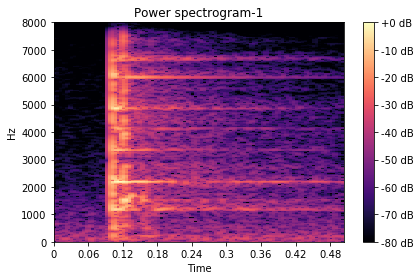

label
successfully loaded all model -  1804181630_epoch47_rnn.model
mean:  0.02595830589020927 ,var: 0.003775741471234273 ,max: 0.9617196905506754 ,min: 3.487504810495423e-07
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


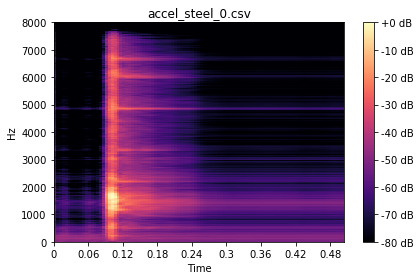

successfully loaded all model -  1804181629_epoch46_rnn.model
mean:  0.02623367845168962 ,var: 0.0038053782594338614 ,max: 0.9611888140941334 ,min: 3.792386793488589e-07
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


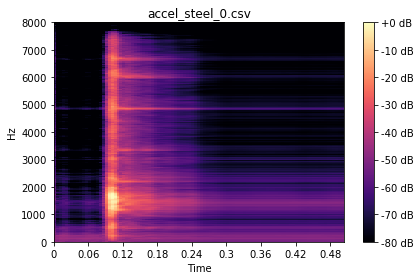

successfully loaded all model -  1804181628_epoch45_rnn.model
mean:  0.02619789325563962 ,var: 0.0037057826304218887 ,max: 0.9593408990018393 ,min: 4.120386804529197e-07
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


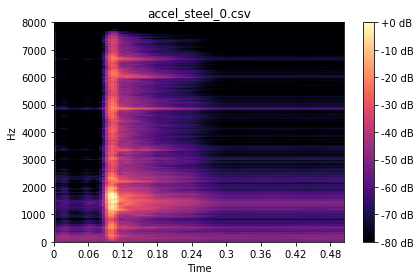

successfully loaded all model -  1804181627_epoch44_rnn.model
mean:  0.02615455784536635 ,var: 0.0037508968654497055 ,max: 0.9592032006808264 ,min: 4.5021296823932744e-07
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


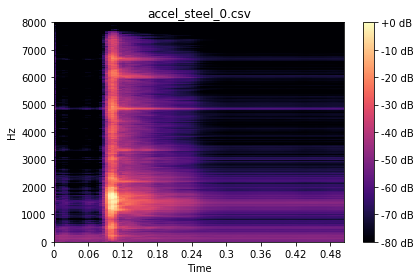

successfully loaded all model -  1804181626_epoch43_rnn.model
mean:  0.026162400461115773 ,var: 0.0037202667272656772 ,max: 0.958755147075827 ,min: 4.913214803892174e-07
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


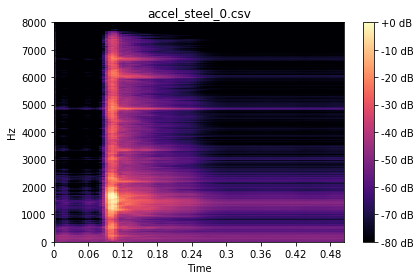

successfully loaded all model -  1804181625_epoch42_rnn.model
mean:  0.02606318602285209 ,var: 0.003777881908573407 ,max: 0.9596593959349663 ,min: 5.359597747833789e-07
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


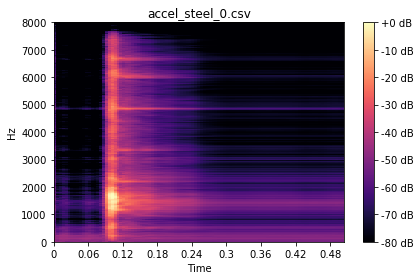

successfully loaded all model -  1804181624_epoch41_rnn.model
mean:  0.02633133117799871 ,var: 0.003752123322788393 ,max: 0.9582227700071209 ,min: 5.87609352509233e-07
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


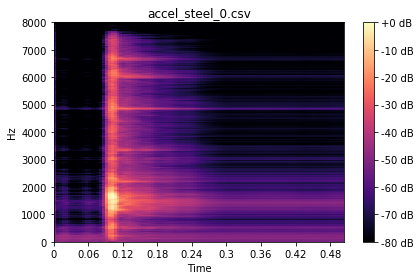

successfully loaded all model -  1804181623_epoch40_rnn.model
mean:  0.02577460234941303 ,var: 0.0037808660511614964 ,max: 0.9586761162073749 ,min: 6.43115231346858e-07
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


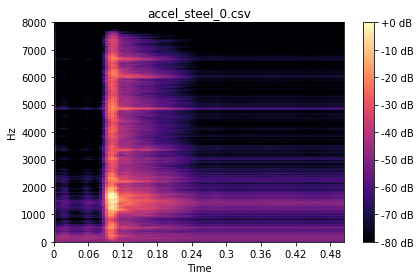

successfully loaded all model -  1804181622_epoch39_rnn.model
mean:  0.02686909878305141 ,var: 0.0037794200763774043 ,max: 0.9576068283664875 ,min: 7.048509095830546e-07
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


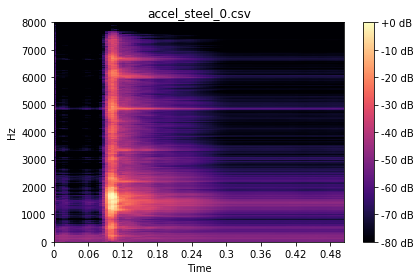

successfully loaded all model -  1804181621_epoch38_rnn.model
mean:  0.02589633563315459 ,var: 0.0038094123332356746 ,max: 0.9579792443562523 ,min: 7.778421903803512e-07
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


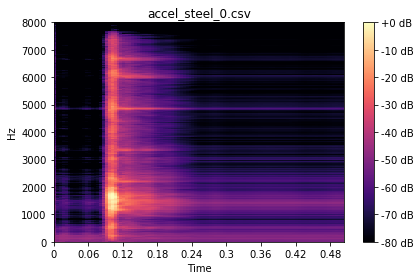

successfully loaded all model -  1804181620_epoch37_rnn.model
mean:  0.02605280131523381 ,var: 0.003815826314837215 ,max: 0.9580565567138268 ,min: 8.543363869684129e-07
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


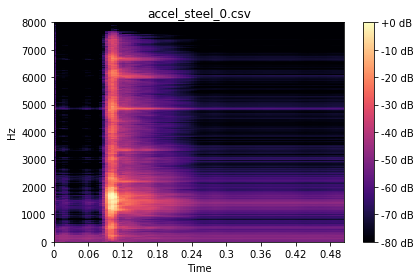

successfully loaded all model -  1804181620_epoch36_rnn.model
mean:  0.02608982803148001 ,var: 0.003802735915098224 ,max: 0.9579395680389505 ,min: 9.388616148964246e-07
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


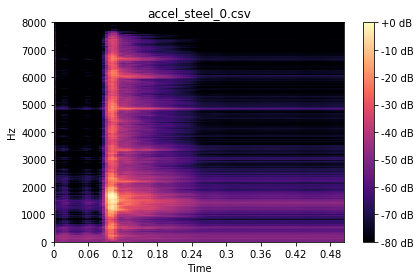

successfully loaded all model -  1804181619_epoch35_rnn.model
mean:  0.026166750347960985 ,var: 0.003782355964288939 ,max: 0.95793861236725 ,min: 1.034329630833497e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


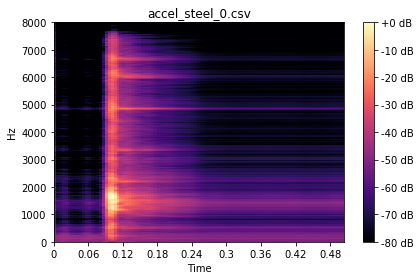

successfully loaded all model -  1804181618_epoch34_rnn.model
mean:  0.026226581433985895 ,var: 0.0037668856761756716 ,max: 0.9580782712677467 ,min: 1.1454327094595484e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


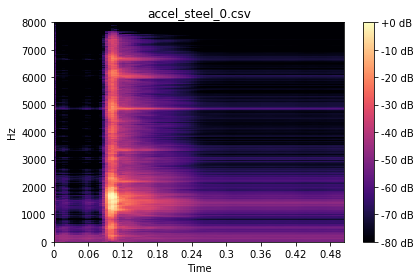

successfully loaded all model -  1804181617_epoch33_rnn.model
mean:  0.026660865140919907 ,var: 0.0037447141223606976 ,max: 0.9567335275942008 ,min: 1.260671335989727e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


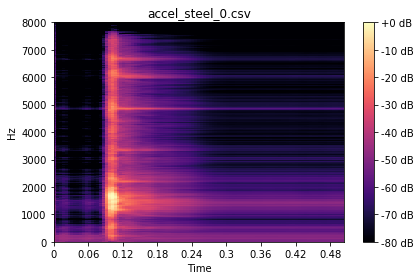

successfully loaded all model -  1804181616_epoch32_rnn.model
mean:  0.027920949375970155 ,var: 0.0037265437637658337 ,max: 0.9572129945187862 ,min: 1.3875013006314774e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


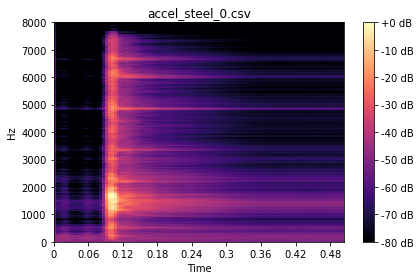

successfully loaded all model -  1804181615_epoch31_rnn.model
mean:  0.028287827475189098 ,var: 0.0037031459512284733 ,max: 0.9566246139567893 ,min: 1.5344209394752006e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


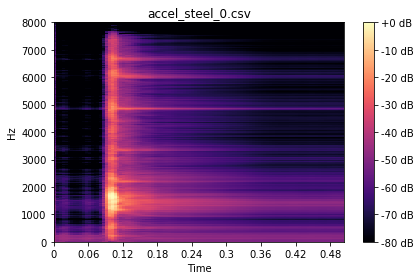

successfully loaded all model -  1804181614_epoch30_rnn.model
mean:  0.028620719630579564 ,var: 0.0036531767817896505 ,max: 0.9547777657025818 ,min: 1.6951790260399946e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


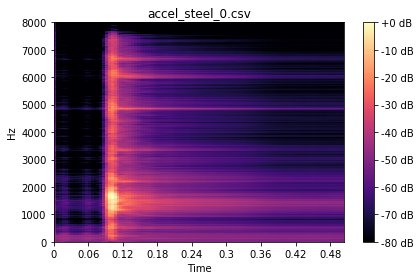

successfully loaded all model -  1804181613_epoch29_rnn.model
mean:  0.0288401048507921 ,var: 0.003644888233696713 ,max: 0.9546193240546595 ,min: 1.8752699030288866e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


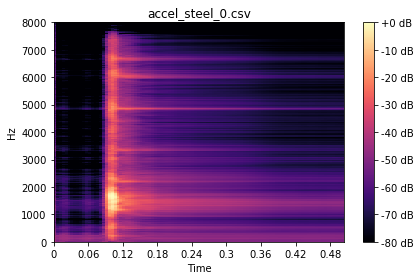

successfully loaded all model -  1804181612_epoch28_rnn.model
mean:  0.029067909194653005 ,var: 0.003650523717569679 ,max: 0.9547334113633992 ,min: 2.075562614389792e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


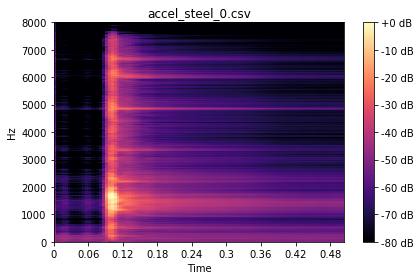

successfully loaded all model -  1804181611_epoch27_rnn.model
mean:  0.02908943957656927 ,var: 0.003597191873722703 ,max: 0.9524415344816414 ,min: 2.3080543508635643e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


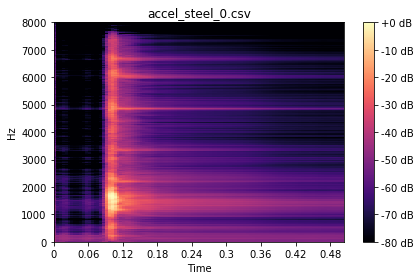

successfully loaded all model -  1804181610_epoch26_rnn.model
mean:  0.02895352268448071 ,var: 0.0035548864884615535 ,max: 0.9511984264619143 ,min: 2.5625869397027934e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


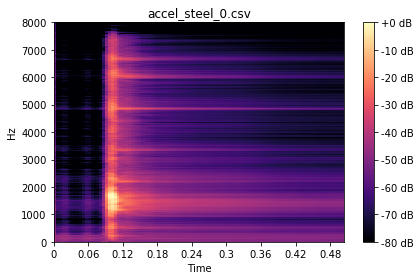

successfully loaded all model -  1804181609_epoch25_rnn.model
mean:  0.02883255109388064 ,var: 0.0035117467148726295 ,max: 0.948929656226003 ,min: 2.8633411245926332e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


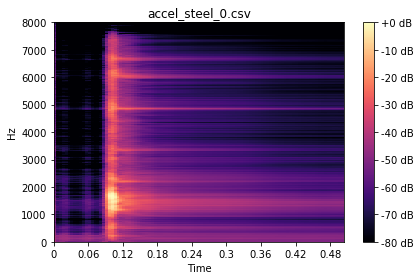

successfully loaded all model -  1804181608_epoch24_rnn.model
mean:  0.028731405030633792 ,var: 0.003484465563616764 ,max: 0.9473476161559812 ,min: 3.2241352412865076e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


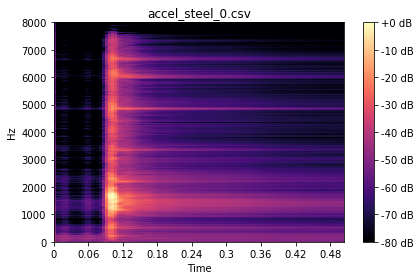

successfully loaded all model -  1804181607_epoch23_rnn.model
mean:  0.028714915325915868 ,var: 0.003476034383325826 ,max: 0.9456391858364653 ,min: 3.6353603067862394e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


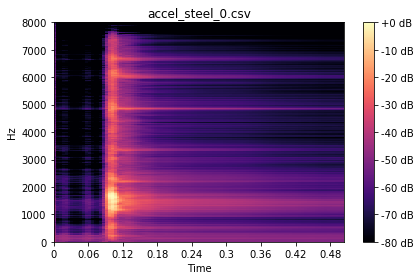

successfully loaded all model -  1804181606_epoch22_rnn.model
mean:  0.02853694318878108 ,var: 0.0033906137370109547 ,max: 0.9438114033190226 ,min: 4.131058193523884e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


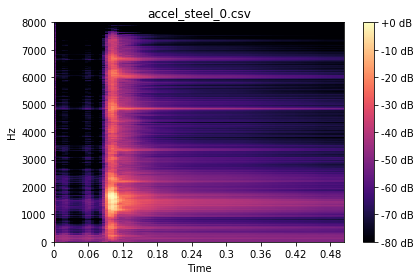

successfully loaded all model -  1804181605_epoch21_rnn.model
mean:  0.028526532744462298 ,var: 0.003412717396603184 ,max: 0.9420922300282848 ,min: 4.7245164350728786e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


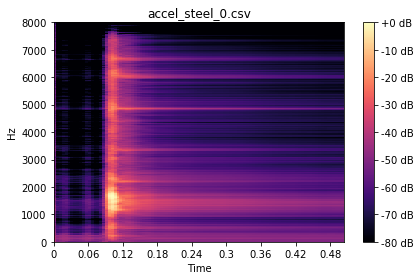

successfully loaded all model -  1804181604_epoch20_rnn.model
mean:  0.02834272414895484 ,var: 0.0034143503208416185 ,max: 0.9418426725012785 ,min: 5.3753406557000005e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


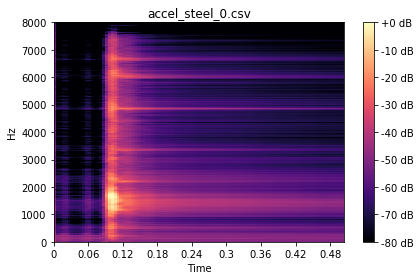

successfully loaded all model -  1804181603_epoch19_rnn.model
mean:  0.028381695372529228 ,var: 0.003417903729229281 ,max: 0.940991011010986 ,min: 6.02302727942261e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


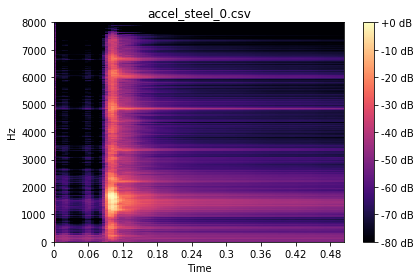

successfully loaded all model -  1804181602_epoch18_rnn.model
mean:  0.0282411549457234 ,var: 0.0033116413099937405 ,max: 0.9337300635690835 ,min: 6.631885912322666e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


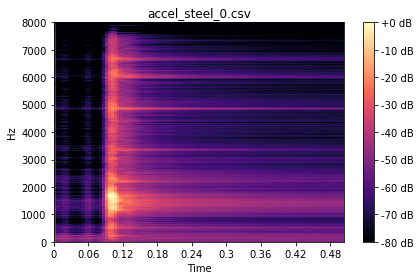

successfully loaded all model -  1804181601_epoch17_rnn.model
mean:  0.02795018536771999 ,var: 0.003325591965246037 ,max: 0.9341234586450142 ,min: 7.168337793850288e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


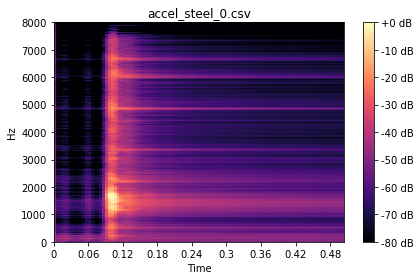

successfully loaded all model -  1804181600_epoch16_rnn.model
mean:  0.028059977027318293 ,var: 0.003339499770184429 ,max: 0.9299994397414968 ,min: 7.881953748789527e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


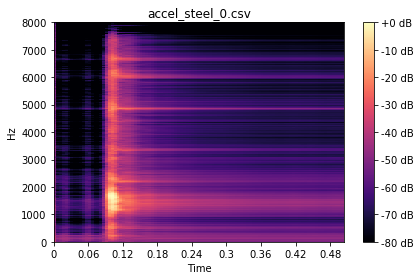

successfully loaded all model -  1804181559_epoch15_rnn.model
mean:  0.027314129401514894 ,var: 0.0031702046807907517 ,max: 0.9201735650160884 ,min: 8.685569831134998e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


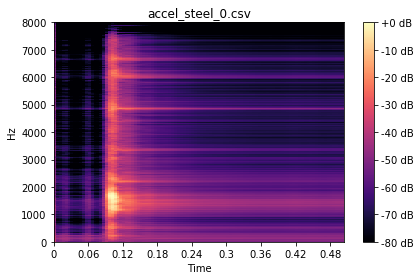

successfully loaded all model -  1804181558_epoch14_rnn.model
mean:  0.027376587421053047 ,var: 0.0032943958558513437 ,max: 0.9215155224828117 ,min: 9.632098176504122e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


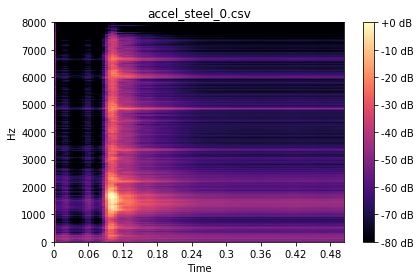

successfully loaded all model -  1804181557_epoch13_rnn.model
mean:  0.0263023704072082 ,var: 0.003182950206789279 ,max: 0.9115574156933475 ,min: 1.0791778106256089e-05
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


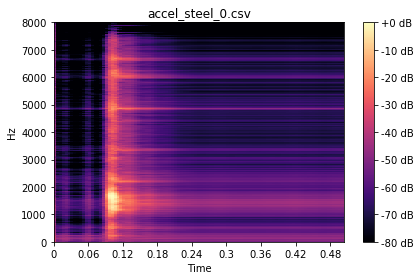

successfully loaded all model -  1804181556_epoch12_rnn.model
mean:  0.028520438228071016 ,var: 0.0034055377145447633 ,max: 0.9121321842488991 ,min: 1.2366697008159289e-05
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


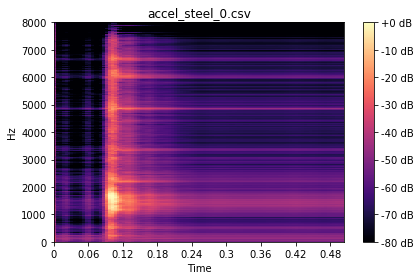

successfully loaded all model -  1804181556_epoch11_rnn.model
mean:  0.026488754835012233 ,var: 0.00332399805893923 ,max: 0.9104133907108778 ,min: 1.4394661038585888e-05
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


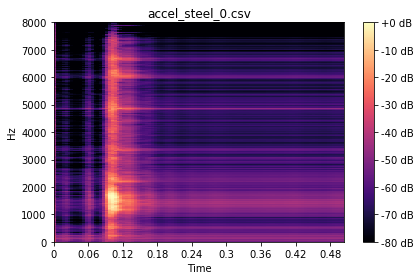

successfully loaded all model -  1804181555_epoch10_rnn.model
mean:  0.028605186479886715 ,var: 0.0036082040684252436 ,max: 0.9344562936483125 ,min: 1.713241213463501e-05
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


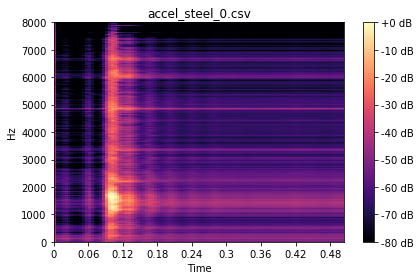

successfully loaded all model -  1804181553_epoch9_rnn.model
mean:  0.02919938333785047 ,var: 0.003113639651141914 ,max: 0.958152175779204 ,min: 2.2746076548341154e-05
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


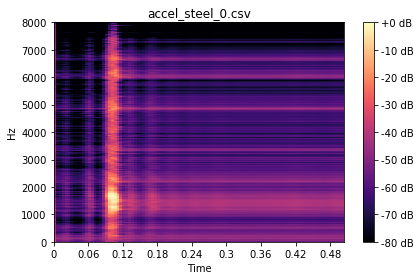

successfully loaded all model -  1804181552_epoch8_rnn.model
mean:  0.021871868943958112 ,var: 0.001722934270915227 ,max: 0.8561561451844808 ,min: 3.025902595943375e-05
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


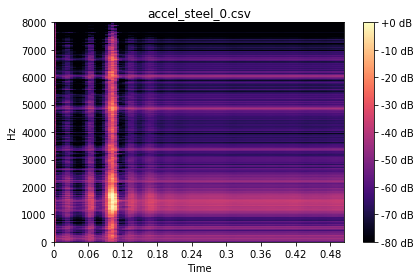

successfully loaded all model -  1804181551_epoch7_rnn.model
mean:  0.023704915704176287 ,var: 0.0012128909060283555 ,max: 0.6528517559991465 ,min: 3.413371746541216e-05
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


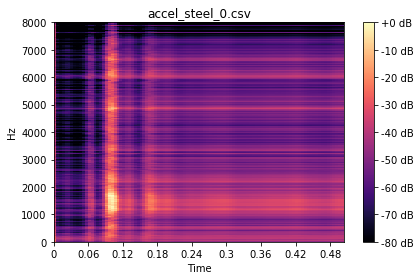

successfully loaded all model -  1804181550_epoch6_rnn.model
mean:  0.03134735516789637 ,var: 0.0010948263277825061 ,max: 0.3941351974533129 ,min: 0.00010046990357487351
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


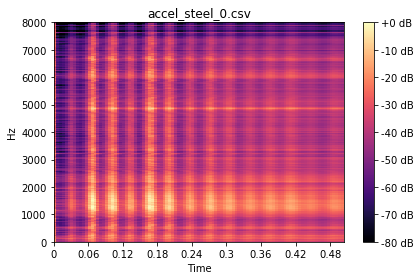

successfully loaded all model -  1804181549_epoch5_rnn.model
mean:  0.030756552147556827 ,var: 0.0005963861823301642 ,max: 0.18892322357192293 ,min: 0.0002015839158677757
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


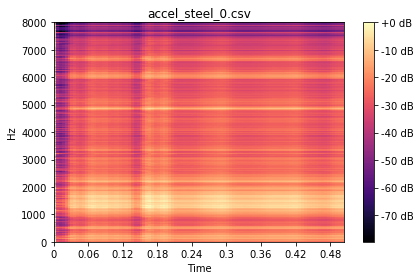

successfully loaded all model -  1804181548_epoch4_rnn.model
mean:  0.03320033555548433 ,var: 0.0006625631933429144 ,max: 0.23697509114350496 ,min: 0.00025013235331033945
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


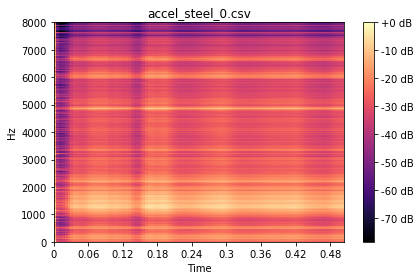

successfully loaded all model -  1804181547_epoch3_rnn.model
mean:  0.01690033754057765 ,var: 0.00027029517695072473 ,max: 0.30110783430022714 ,min: 0.00032695112548764005
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


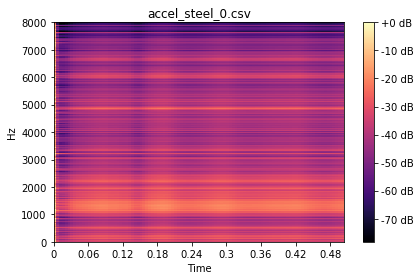

successfully loaded all model -  1804181547_epoch2_rnn.model
mean:  0.03560286728544708 ,var: 0.0008700379357604714 ,max: 0.38418920460836786 ,min: 0.0007043953019846283
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


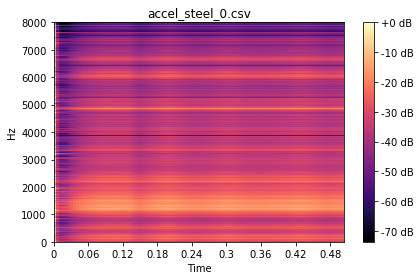

successfully loaded all model -  1804181545_epoch1_rnn.model
mean:  0.031142404382757293 ,var: 0.0011381742815464058 ,max: 0.48163973953523154 ,min: 0.0020170984381706614
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


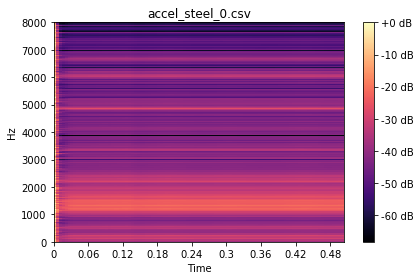

successfully loaded all model -  1804181544_epoch0_rnn.model
mean:  0.03430130193578069 ,var: 0.001992083193442496 ,max: 0.5604255054406184 ,min: 0.0034627498649150157
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


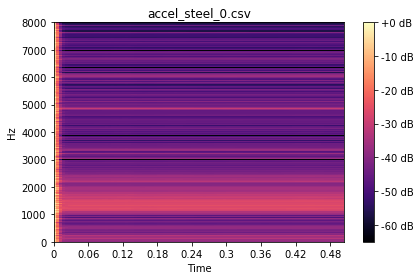

successfully loaded all model -  1804181531_final_rnn.model
mean:  0.028655318665370518 ,var: 0.0036093464385180524 ,max: 0.9543084562199167 ,min: 4.275978356838017e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


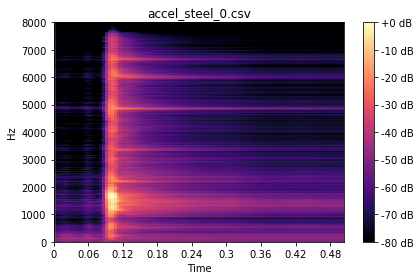

error : can't load model
mean:  0.028655318665370518 ,var: 0.0036093464385180524 ,max: 0.9543084562199167 ,min: 4.275978356838017e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06
100


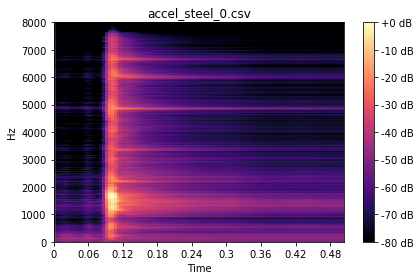

In [6]:


print ('Test Strat...')
inPath = "./dataset/input_accel"
outPath = "./output_model"

#y,sr = librosa.load("./dataset/audio_plastic/audio_plastic_0.wav",sr= 16000)
y,sr = librosa.load("./dataset/audio/audio_steel_0.wav",sr= 16000)

stft_y = librosa.stft(y,n_fft= 512, hop_length = 80, win_length=400)
D = librosa.amplitude_to_db(stft_y,ref=np.max)
CQT = librosa.amplitude_to_db(librosa.cqt(y, sr=sr), ref=np.max)
librosa.display.specshow(D,y_axis='linear', x_axis='time',sr=16000,hop_length=80)
plt.title('Power spectrogram-1')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()
print("label")

timeText = util.getTime()
num = 50
for epoch in range(1,51,1):#0,num
    load(outPath, num = epoch)
    for path, dirs, files in os.walk(inPath):

        for f in files:

            if os.path.splitext(f)[-1] == '.csv':

                with open(os.path.join(path,f), 'r') as csvfile:

                    rdr = csv.reader(csvfile)
                    data_accel = [line for line in rdr]

                    for idx2,each_line in enumerate(data_accel) :

                        each_line = [float(i) for i in each_line]

                        #x,y,z 3 axis -> sum(x,y,z) 1 axis and material property
                        sum_3axis = np.sum(each_line[0:2])
                        sum_3axis = (sum_3axis - 9) / 4.
                        each_line = sum_3axis#[sum_3axis, each_line[-1]]

                        data_accel[idx2] = each_line

                    output_data = list()
                    result = list()

                    pointer = 0
                    pointer_bool = True
                    for i in range(0,sequence_len):

                        if pointer < 9:#input_size-1
                            output_data = data_accel[:pointer+1]
                            output_data = np.pad(output_data, (input_size-pointer-1,0),'constant',constant_values=(0))
                        else:
                            output_data = data_accel[pointer-9:pointer+1]

                        if pointer_bool :
                            pointer += 2
                        else:
                            pointer +=3

                        pointer_bool =  not pointer_bool

                        if i == sequence_len-1:
                            result.append(result[-1])
                        else:
                            result.append(output_data)

                    result = np.array(result)
                    result = torch.from_numpy(result)
                    result = Variable(result)
                    
                    hidden = model.init_hidden()
                    hidden, outputs = model.forward(result,hidden)
                    
                    outputs = denorm(outputs)
                    util.printInfo(outputs)
                    
                    stft_var = Variable(torch.from_numpy(np.log1p(np.abs(stft_y.T))).type(torch.FloatTensor))
                    stft_var /= 2.2
                    util.printInfo(stft_var)
                    print(i)
                    
                    
                    outputs = outputs * 2.2
                    outputs = outputs.data.numpy()
                    outputs = np.expm1(outputs)
                    outputs = outputs.T
                    
 #                   outputs = np.array(outputs)
                    
                    plt.title(f)
                    outputs = np.power (outputs,1.3)
                    librosa.display.specshow( librosa.amplitude_to_db(outputs,ref=np.max),y_axis='linear', x_axis='time',sr=16000,hop_length=80)
   #                 librosa.display.specshow(outputs,y_axis='linear', x_axis='time',sr=16000,hop_length=80)
                    
                    plt.colorbar(format='%+2.0f dB')
                    plt.tight_layout()
                    plt.show()

                   # print(np.mean((stft_y -  outputs)**2))
                    
                    #util.printInfo(outputs)
#                    if i == 1:
#                        librosa.output.write_wav("./output_test/"+timeText+str(i)+"_"+os.path.splitext(f)[0]+".wav", outputs, sr = 16000)
#                    sf.write(self.inPath2+"/"+timeText+str(i)+"_"+os.path.splitext(f)[0]+".wav", outputs, 16000)
                    #power for noise
#                            output = np.power(output,1.5)
                    audio = griffinLim(outputs)
                    filename='converted_'+os.path.basename(path)+os.path.splitext(f)[0]+'.wav'
                    librosa.output.write_wav("./output_test/"+timeText+str(epoch)+"_"+os.path.splitext(f)[0]+".wav", audio, sr = 16000)


#print(np.mean(np.abs(stft_y) - outputs)**2)



C:\Users\Chang Minwook\Anaconda3\lib\site-packages\librosa\util\utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
C:\Users\Chang Minwook\Anaconda3\lib\site-packages\librosa\util\utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
C:\Users\Chang Minwook\Anaconda3\lib\site-packages\librosa\display.py:656: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(data.dtype, np.complex):


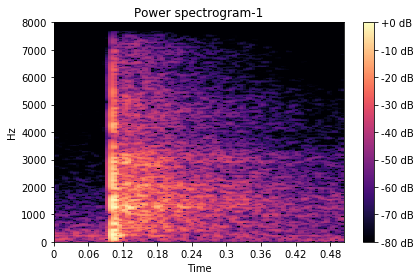

label


In [53]:

data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAaQAAAEYCAYAAAATRII7AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAIABJREFUeJzsvXm4bHdV5/391TydqjrjnYfc5Ca5GSAJgQTCEBBkUIja%0AiiiNogjYomAPryjt091v2wO+3W/baqvddLcijYjIqy1vyyBggwImECCEDCS5yZ3HM9epOjXXr//Y%0Ae9f61L117pCck+Reaj3Pfe7v7L1rz3ut31rru77Lee81kpGMZCQjGckzLbFn+gRGMpKRjGQkI5FG%0ABmkkIxnJSEbyLJGRQRrJSEYykpE8K2RkkEYykpGMZCTPChkZpJGMZCQjGcmzQkYGaSQjGclIRvKs%0AkJFBGslIRjKSkTwrZGSQRrKmOOcOOufqzrmqc+6Uc+6DzrnCM31ez5Q45/6Fc+7Dz/R5rKc451LO%0AuY+Hz9o75+58ps9pJN+9MjJIIzmfvN57X5B0i6RbJf3qM3ESzrnEM3HcixEXyLp9U0/jNX9J0t+X%0AdPJpOt5IRjJURgZpJBck3vtjkj4l6QZJcs5tdc59wjm34Jzb75x7e7g8E3pVU+Hf/9Q513HOFcO/%0Af8059x/Dcdo59++dc4dDD+w/O+ey4bo7nXNHnXPvdc6dlPQHZ56Tc+4q59wXnXPLzrk559yfYJ13%0Azr3bOfdEuO7f0Vg4537aOfewc27ROfcZ59wurLveOffZ8NpOOefe55x7jaT3SfrR0GP8VrjtF5xz%0A/9o592VJq5L2rHVvwu2zzrk/DI/7sHPul5xzR7H+YHjN90uqOecSzrlfds497pxbcc495Jz7QWz/%0AVufcl51zv+GcWwqv90Xh8iPOudPOuZ88x3Ntee//o/f+S5K6F/AqjGQkGyYjgzSSCxLn3A5Jr5P0%0AzXDRRyUdlbRV0g9L+jfOuVd47xuSvibpZeF2L5N0SNId+PuL4fj9kq6WdJOkqyRtk/TPcNjNkiYk%0A7ZL0jiGn9WuS/krSuKTtkn77jPU/qMCru0XSXZJ+OryWuxQYlx+SNC3pbyX9cbhuTNLnJH06vLar%0AJH3ee/9pSf9G0p947wve++fiOG8Jz28svNah9ybc9p9L2i1pj6RXKfBMzpQfk/R9ksre+46kxyW9%0ARFJJ0v8t6cPOuS3Y/jZJ90ualPSR8PjPD8/970v6T9/NodaRXELivR/9G/0b+k/SQUlVSUsKFO3v%0ASspK2qFgNj2Gbf+tpA+G41+T9FuSEgrCQO9RYHwykuoKFKeTVJN0JfbxQkkHwvGdklqSMuc4vw9J%0A+oCk7UPWeUmvwd8/p8CwSIGn9zasiynwbnYpMAbfXON4/0LSh89Y9gVJ/xJ/n+/ePCHp1Vj3M5KO%0AnnHPf/o8z+U+SXeF47dKegzrbgyvfROWzUu66QKe91FJdz7T793o33fvv5GHNJLzyQ9478ve+13e%0A+5/z3tcVzPwXvPcr2O6QAg9HCjygOxV4Jt+W9FkFntHtkvZ77+cVeCY5SV8PQ01LCrySaexz1gce%0A11rySwoM21edcw865376jPVHzji/reF4l6TfxHEXwv1sU2BQHj/3LTlLeJzz3ZutZ2zP8dBlzrmf%0AcM7dh/O9QdIUNjmFcV2SvPdnLis453aG4caqc656IRc2kpE8nTIySCN5MnJc0kQY3opkp6Rj4fgr%0Akq5REDL7ovf+oXD962ThujkFivL60OCVvfclHwAoIjknFb33/qT3/u3e+62S3inpd51zV2GTHWec%0A3/FwfETSO3Hcsvc+673/Srhuz1qHvIDl57s3JxSEF4ed41n7C3Nb/1XSz0ua9N6XJT2gwIBelHjv%0AD/sg3Fg44z6PZCTPChkZpJFctHjvjygwOv82BDE8R9LbJH04XL8q6euS3iUzQF+R9LPR3977ngJF%0A+xvOuRlJcs5tc869+kLPwzn3I865SLkvKlDkPWzyfznnxsP813skRaCH/yzpV5xz14f7KTnnfiRc%0A978kbXHO/WIIuhhzzt0Wrjslafe5kHTnuzeSPhYee9w5t02BoTmX5MPrmg3P9acUAkvWS8LrzIR/%0ApsLzvmiDN5KRPFUZGaSRPFn5MQXJ+eOS/lzSP/fefw7rvygpKemr+HtM0t9gm/dK2i/pbudcRQGY%0A4JqLOIfnS7onDD99QtJ7vPdPYP1fKDCM90n6S0n/XZK8938u6dclfTQ87gOSXhuuW1EANni9gvzX%0AY5JeHu7vT8P/551z3zjHeZ3r3vxLBbmaA+H1flxSc60dhd7l/yvp7xQYxBslffkcx34y8ogCb3Wb%0ApM+E413n/MVIRrIB4rwfNegbyeUnzjkvaa/3fv8zfS7nEufcP5D0Ju/9y8678UhGcpnLyEMayUie%0ARnHObXHO3eGciznnrpH0jxV4USMZyXe9bKhBcs79wxD99IBz7o/D2PREWHT4WPj/OLb/lbCQ8BHm%0AEpxzz3POfTtc91uj+PZILmFJSfovklYk/bWCsOLvPqNnNJKRnCHn0tPn+M0HnXM/HI6/EOrx+8IC%0A8GF1hGfJhhmkMGH7bkm3eu9vkBSX9CZJv6ygHmSvpM+Hf8s5d124/npJr1GAmIqHu/s9SW+XtDf8%0A95qNOu+RXB7ivXfPxnCd9/6Q9/4G733ee7/Ne/+PvfetZ/q8RvLdKS5gRPngkFVD9fRFypu99zcp%0AKIr/dedc6nw/2OiQXUJS1gWcXDkFSd67JP1huP4PJf1AOL5L0ke9903v/QEFye4XhBXpRe/93T5I%0AeH0IvxnJSEYykpGsv6ylp/viAvlPoSf0OUkza+yroKAI/rzUVBtG3ui9P+ac+/eSDitA7fyV9/6v%0AnHObvPcnws1OStoUjrdJuhu7OBoua4fjM5efJaFbGLmGz1uXC3nWiUUrY5hw9HwH24woyUYykqdT%0AErFcf8zvstVdmvPeTw/7zcXKq1/9Aj8/v3xB2379648+KIlF5R/w3n/gIg63lp6m/KACVOx14fqH%0AJP0+1v+Rc66pIKr1i977Z84ghTHHuyRdoYB65k+dcwO8Xd57H6Kh1kXCG/6B8Ph+Ay/vGZOYS/bH%0AuYzVVNZbc/1xt1t5Ws9pJCP5bpdywUrDivGt/fETi//z0HodY35+Wfd89b9c0LaJ+Msb3vtb11rv%0AnLtHUlqB9zLhnLsvXPVe7/1nuO059PRLJf1xaGiOO+f++oz1b/be3+ucm5b0Fefcp73357wfG6mx%0AX6mAlywq6PszSS+SdMo5t8V7fyIMx50Otz+mwar17eGyYxqsbI+Wf1dKz7f741jMjNNYxpzGpdrI%0AII1kJM+UxPqp73UWL6nXO+9mF7Qr72+TghySpLd67996xiZr6eknc6zZsG7vNgU0WmvKRuaQDku6%0A3TmXC1Fx3yPpYQUFjBEd/k8qQBkpXP6msGr8CgVu3ldDt7HinLs93M9P4Dff1VJO7ez/G0tt7f+7%0AGHEugX+x/r8nK6nkDP5N9f+NZCTfLdLz3f6/9RUvdToX9u+py1p6mvI3CtqxxEOj9fIh28g5l5N0%0Asy6AI3Ijc0j3OOc+LukbkjoK2hZ8QIGL+DHn3NsUWMs3hts/6Jz7mII4ZEfSuxBz/DlJH1TANP2p%0A8N93pSQS5f64pM39cd7n++P4ePBYT65+u7+s0TzeHxfzRoZQqT3SHzMcmM2YU5pJlmwcD9Cf86uP%0A4nf2GqUTRuG22pofet5ujXlQJww1er8uH9RIRvK0ScCEFciGekhPH5HB+zVET58hfy7pFQp09mEF%0AbCKUP3LO1RWEBj/ovf/6+Q562TI1XK45pKniLf3xPndHfzzWpyKTVsOw3om4YUFqPcsx9UD31uoZ%0A6XMylu2Py85CgCnZ8oUQXxLHvW1628fJ5XvsZDFD9OAfpceUSU3aOTaCfXe7NQ0Tem6ppAF6Ot3V%0A/rjXNZJtf25u1pGMZN1kumjpmlLCvp39C//f18+Vy7kYufWWvf6ev/2tC9o2UXjduh336ZTLT2Nf%0A5pKNW31avGczMSrftgIPI+nT/WX5mBmB062H++MMPJeturY/HuuZpzMfM0/nxEowySlld/eXbUrY%0A73zRjF0T4IrlVSsJ6vas7IYzy3gs8PJokDLprUO3pRFi/qzZMYNUbxKcuXESgyHv9epPyzFH8l0q%0A65RDerbKyCBdAhKPWzhuDO2CjsUtP1jsTfTHq7FAKTM01kR7nsXqg0OPc0P59v44CW9kv7f2PIV0%0A0KiURmhzz5qXlmTncSjxgJ1Twoxas3USRzU0aSYVGNtYzF7LQtrCkpX64f6YSMKAzDvcB8KLG2mQ%0AnOOn08Py4L7ReF78vu3eP5X9jOTpk65vYtw+x5ZPQdYR1PBslZFBugQklTCviMq/KXvxc868oe0u%0A8IZWe5aLSQCouK20tz/OymomCkDt9eBx7ehe1x8fCTfJ+TH8zvZRwnksoE4uky/2x2N5C9NRnmh+%0ARZKUT9nv6BH6jH2M820LQdIrmsnu64/zZTPei82D/XGtHozjcTunXs88Luaw8vAEU5gYVOpmpAeN%0A45MDhDB/19sohTaSS1z8yCCN5JmXbMqU8tVj1lftCrRYi4Pd73RYDne6bkoun7QNcgkLMbXxflfb%0Aw3Mu8aYp7kTnRklSCWGq1Z4p0ChcKEkvHzPjkIKe7uCYKziByd73S5Lq6MZQ9FZweCRhHk9+3IxN%0AXnZ/GrJ8FnNlV2cMANTIBCHBRyuftvXjVog+1rP9tZ2FF1uycFw+YcefqxvAo9WalSQVclf2lxVg%0AYNPOHtpy266HXivzYxPYTyI09tW2NYNdqiH8ivBmNmnXQGPX7dm9rbcX++N2x8a9cBuHIux4wjzP%0AeMzylfTgWu0njQy+5KWHyV9n7W4iT028l+te3oCfkUF6huVCwjMTSWtgWgYbVDk53IDMh/uMoZbt%0A0RXzAHbnzJhMZYbP6GmcGl0DJzzsg1Y8r0oYnWDZDfesuOeTq/YhpWKxodvnQg9tRzqHbU0pjjWv%0A6I8Pd01Bfn3lw/3xtuKL+uPFurVG2po1ZOGMD8KApbEf7y+Ld+1T6Do712Ogw+PzScATJIIxAp1M%0AJuyZxb3te7Zr++OzH8vBa01a2DMXM2/Shwa2jTxVNm2eL3NzyzUzkvTyWCzP0CmNTzIRHL8LgEgP%0AeT2GgjvdJa2nxGJ2XxkWXQvo8myRFs7vAggJnryMPKRLU5wSSiQm1MXH+2xMOF9IjqDlzZgU8MQy%0Acftto2tK4mgt+CAeaprCuSVnob7xtCmfWscMwsMVO854wixfAorzjcXvkyRVWnbsQ00LWe1IWyjv%0A0RX7SHfnzcgkYGTo2SXD5ZNpO95Sy86vmDIQx0zDDNIVpVf2x4zfb8sbe1QD9zDpA8NHQ7EcMw+h%0AJht3MfOdiplBLHoDgyTGTYnONwMjGI/bvkvI780BEpyOmedZTlg/vIPLn+2Pc6U77TghkjIKOUqD%0AiMUBsAjoo6ggqzDSlFjcns9YNgCJLKxY2QC9rHZnYeg+KIPhUPNaz/e+JxGeTsTNE2t3LFz6bPTE%0Acil7DkmXO8eWT0G8pN7ljRy9bA1SJBcS03+2o6Qmkf/J4Yll4/ZytvCinmgE13BL3ozQVUXT/JvS%0AphQYpdtTsA+pgUleEzoksiVFxOBKaVPOsCXakjMlMm06WwV4dqw6qHWCH58GA9fvn/hX/fFbN/9q%0Af7w5awazvWrexZebf9YfX5v+nv74oYaxodycfoMkqRozD+Bk10Jf9G7azgzZHu3sj4spexA7EeI7%0AkbxaklQAwrGN0GEeHg9DO2Oy5deWftCOA8PnesH9WS2/tL/s+JI14KXRKOctXEokZS41nFYtDm8k%0A8sA2l15ox8Z3tNyw/Nlqw4AmNEK5tIFVGi3bd7Qfej/01Lo9e/j5tJ1rs22eWOTBSVIChrQR7mcj%0A69h4jbwnvPdr1dk9dRnlkC5Z8eqccybHOD1frGbrbINEg+XxwTxddS7jPVMoeRihTAyGBa7GvmJg%0ACOZgVUpJu8bJtHkRWXhZTXhZS217NfZX49gmOM54ys4jj7eo3bPzyMS5jY3TMRuzsVUv/Ite2/eP%0A/5L9DvWGDOXlgMp7afrv9celpCmJvUmjUVwJK9krMqLKPbHn23G6Zuw6AGYkEWqkt0b1UwhRfjUk%0AyhbaZniWO6bMScjZiJs3WeqZcRqX5ZyiNmBtdHmv5i2fxCJn5ocKSUMqFuCVsSxgFV7hiUoQlt05%0A/io7JxRhl7MGs68hFMqatoXVx/pjfoeRMSllbZLlM5b7Yi3cAMy/YwapkLUJQxEhy1Y6eFb19vDv%0Avt48gb8QNr6ASWhkQJk/o6fGY+bTw0E7T1lGKLvLV7o9UwBR/YtkHww/Isa1k0l72dpd+wD5way3%0AxKC2qcxTMEg0CtlEoCy7cD+aMBRUoDQgzDnlE2bM0jFTvvFwm0V08GnBm6IiZmhuR87Gx+o2nrHv%0Auw+wWCsqkU3Y73jMw73Z/nhX3GbV01kYDVq+0OlZ6ZhC2aHn4LztDn2h9T/746J7fX9ca9u+kzGe%0AV3Dy8y2buCw6M3xbE3acqgwp+MjCx/vj7eU7bd/eSDvHQwOW75nSTsSGt5hJQHEuNQ8P3WZr5rn9%0Accyb8d5SDgquY3hT6s7Csilvx6ehWo6Zp9MCCpLSC+HRRE8S6MEi64a3Y44XrrdzhTfC0GQqFuwn%0AlrL1rY7tIwlDRsBLu2O6YM1SgTDs2UPrKubd8gidMr+47nKZlwFc9gaJoYExIJb4sfHlrDU4iwqE%0Axma9DE/k+q8FN6YUkc8pJm2bTNw+xlNN+wgjBfmSTaY0y0nbdhnKtO3hacBbKuE427L22/9+IDjf%0A12y2XJHs0AOGMQ4Dd7Jh9/t03Y5TBPpvtROMW5gFXl20j3u2YcsPNyzcNoVmlvuA+mh07fh/vPTF%0A/vh7M0HIq9IwMMJ03oraZxumdG5MmJdAAMa9LfMAGKKJYPldKMotziYx8/AiDrW/qmHSBZyfAIte%0AOMHg8Qh4cWNxbGv72J40dg+Pd/2x6uf748HasEAYGkslzbPKpywcN1f5Rn9cyNm5MNw3W72/P54u%0ABAY5jpfmsQXr4D4xdqOd6xrKl9e2Aq+HYJBIGP1od80TanXsOTA06AcMFVs9BPeW3z/rA8djVgtX%0A7ppxsrdkHcR7qXN5t5a5jA2Sk3OJASOUjpsSbQJBRChsOhmEx1ZRW8LwXrtjM7+nUrTow5liPmN5%0ACcbJqQAGPSQ75ljKPkxLiUs+nMH+zWn73cvQzWS+aY99qW3b3FgyRbzQMoVRgjF72xXBLP0YohzL%0AbYbpbDnvzs6c7WNr1rZv95gHC5Z38UPug3mrbd5m1buA9EjBgySk/U2ll/XH6TC8+Y6cQb2ZM6t3%0AbH++Y55GOWnGLta253bMmVLcGiIECbOHXVRv1ZRYBlDq6fHv74939ywnNha3Y57oBe9HNWaKcrpr%0A4bNMwu4JjVqxZ8dhvVoy/1q7huxD/XGtFYQBCZ6YBP8hPYAZUOYQULLSsntChFyUnyrF7byvG3+T%0AnZNwft6unYa5LXtPV5N2L5Y7gXeTRp5nLG4eXCNh3/RqzLxqIhLlGMozvRBxMXKCy8gKJwldt1FG%0AY5RDumQlHsuolL9WTsx/mBFivJ2STgUvMEMEg7Ms+7hXAfe9WFhq9LJzVjeVMUVEr+0UZnNxcNZl%0Ak6YAUvCWImNCb4FhuvGUbcvw1ELL7tX9i7b8+7Za+GlvMRhPpExxrHTsd0fr9krxmAw1drqmrOdb%0AtpULPRAqc3pQNDbbcgyZ2fJZACIeWjKFcuO43bexEFRBhN8cSkdOtO1+b03ZJCaPPFy7h/yUt9lx%0AITSaOL0Bz64LL+v5MauNIjNGHsmyFqxZPQRYrMiUaRW0TgyfEV6ei9k1zMTMaGW9TbQKyFWdzAaK%0AvZY2o8vQWK1jx2dRcsTiIQ2CHShRjqjt7UHFZLm0tLfnFPd2HxoAl7SdPaykEJoM81YzYzfZtqgd%0AW23bedealnsbKETG5IGEwBFIIxU3L7DWtJDvQs9YU2Ix22bdZWSQLk3p+Y6qjVMDMd8LaVwXhS4I%0AOaXRqLcsKc0QG2dOF4PycYABZ2XGbsXby07i1ASUbzI2/OWMUi2HTa9qW8Z+N5GkcmGIyzT0Xdvt%0AQ55Mm/JIhbklHjvdNOPEXBXzU12EBh+t2PivKsZI/6bp4EPeV7L1h2vImUHJTyJMvwIPbRlw9B5y%0AaJWBot9ge+aViA7ck7UZNr21pebwme9DMuU/1QsolZrOdr7YMoX3iDMo9c3u5qH7a3SHP9fI06kB%0Aoj6H0OFMcrddA0AaA/sGjD3pCMxAHVIIdqAC56SsAs+JUs7Y8afGLEy4CB7DhdXgebcz9n7Nr9zX%0AH+8ef7WdB0Af823bRxVh9SsLr+iPrw5LEhZ79o2eqtn9vli4OA1sIRkYpCZCruRT7IA6iAZzXcVL%0AbmSQLk3xvv2U6hVYeV1FPc9aOSTG2y+kTqO/P+SQUkAYDSRuoVgdpnBs4tjpmnL55lJgZJ4zbi9v%0AIQESU/yOuaUxjMsphjHtXpyuBUrCM6GbMIXb6pmlyMB45nD8TVlTbm8v2GyyFG5Do+YcDVx/OOAJ%0AnaqjcLdhIdWrURvyQMVCO1fmAoPzidon+8t+bsZCZnvG7PweWkLurWuTmxJCaTfFr9aZcn/F3hN6%0AWbf2TFF/25sxmeiat3JP5b/2x68qvac/Tod5lyQmKC9N3dUfjyXsc15BT5z/tfj/9Md3lH6+P27A%0Aezjsv9UfZ0PmC7JADPa0Qq4KCnosBqooh9DkmE20opoohhSJmju4aPB8RilWGtaTk2S6lEQY7mvg%0AG6UOYM7nQiIaqQRqqcKIxdKq1XHxOy/EbQJA9OL6in862088I3LZGqRhspYXM0BeGuZ0GIpgJT63%0AjcOAsCiR6Ju1oOHRuRQTBnnN9WzfCWfhknnZuQihFUoCIbtbxwNjQtBDu2dK9rEqWMABx2637Ly3%0A52z5Yt0U4LFwTKO2u2D3cm8BieMeg3Ym14yRBQKx99CLqsJTGweIrAVD9Y15s0gEPtwOmp464OOT%0AXdZYBcrlx8vf119Gb4l5sH1le2cWmraCRcRbk8gzhUXH18cs3EPaJJ7TRM3OtYVZ9UuK/6A/juNd%0AysWD69wEA1hCeK+LfNwq7uHt5Z/tj9swBMxF5d2FQ5XH81f1x8wnEX2XJRLPWShxNUQcxjHhSmSG%0ARyPSCC82E/YNxIF6ZSQhknLKvh02rEyKdFcW6qT3R8TfQNg89LTWmmx2QZkV30i1OvKQLm0hICGZ%0AMKW0VisDC0fAo4ARcgMV6zYTu5AwHWPSEXji0JIhnSZLaIqHDzqBbEwDntBqy7R1HCG0RmgIxpBj%0Ams6aAt8xxpwUvJgMsNyQVN0UwK5QQS4C9PCRgzaTvLE8/IP5MgAWd8zYMeebdm0HqsHy68q27WYQ%0AqjIPtTsPaJ8YprOllY7t+9gqnlu4OY3DPRUzpFuyyGPg/kxm7Lx2gX6Jea5smJhqYN/k7uP0ZBxe%0AxCkUyZbjrMWx7ashZ+BUxtYT1VjB48vE7T3Zi1KF5Za9pwUY6b9e/o3++LnjQaPQl5Xe3V/WBKff%0AIVkY7FTl3v74ZM/6sxFllwUKsh0yZtQQDiT6bTxjbBgnV77ZH+8YM0qoFqDhlbaF76L8FCd5XW/7%0AXmpZXuua1J39cRoezYIzAzePvFBktNaiNqqhhKATh/u+njJC2V3KEqDs2MqAqCG+WETTDJeLiwmv%0AxdzMcF/MBcZkumj0Nk1nL3IlZjOxfd5mxGRNWGiATw2GakfODOywbSmllCmaBsAJpSxCdglTYnPN%0A4LwP1swY3oLQ4ErHlPPBmo2fN0n0G8JwULiLYY4mHwcLBMKI86j4f6LKkKHtg0wWDPER6TYbhvgm%0A4Aptz5kROrxqz6GJiUYLHiwh5SnUaTVDi/iJ6lfsnKCQr5WhPo9B+RXQf6rR62IbU7g7tTU8Dzv2%0AMowQjWAGiI0iwBjFFFB7q7bNreW398fRZG0BuSqCDaachdi6Y3Z/KmBwWIu5IFo+lbJ3Og0CXdI2%0AZQHHZk0SpZQCi0l4n2PejsccG9G0yzEL7RIdeGTFnhu5/GLhpDQBpC69JdIskV9wXWVUGHspi5f3%0AnQHWY7Y1oLAFdyOsPWig/fbF5IQkKQE+LoIqOkNi2ylnrR0qMgU1i/j9VVlTYnWwCNSR/D7RsOVT%0AmUChzjZMiTyyAjQSQAAvm7ZY+oMVm3m/YsvwwsaVsIbp4WVTfi+bsfPYDPBEE0g01jvRCLFedWto%0AWWLO9kcEHY3dMjjuCJiowlElBqGcQgFwCIEjTx4Leq8p2n14YsWUGOuTri3Z/cyhYDcCT2zvGUy6%0A4Gx/K3gf5p3NwCtI4G/u7e6PGU5qhfmXY3Wb9VeBPtsaNw+8BWs8lbHJSH0NR34Bhi8ThoXrQumD%0ALME/3bN80sH23f0xvzWGvhZaBlyJ8lJ7AHPPwCCRwmglbrnbUyvW/ToHVnMiXa8pvv6s824h9N5q%0AGbKunjGjSqDCWt967zz1h4Nh+g00GiODdGlKIp7XROGmgWVxd/7LTSeCGVAHYYQLMUiDSV+TZBy1%0AIUD5RbPQ+bqhh8pZqyZqtOxDQ2G+6sgNkFz15nHLB0Rgh7EkczumWCfSNmae6WWb7JoJkqDnVE4F%0A+7yiYEqOYIgCGB54fk/UbHuGobZnbZtqJ4JMDwdg7M4hBEnIHQJhDXhfDN8RFRh5aJU2jST3ZxJz%0AVObMfdk2BJdE4btbigiTwa092rQJQAvhpBQU+LGYzeqn/U5sEzJw4HpphCbT9n4XYYDpHR6o2jEX%0A0apjHI0Sc6GBmE7s7i/LwGslFH13zJo6kg9wsXWgP+4NUdCLbVufhyFbFhnI7ZhlsKEzJJdJn41U%0APFa9F3+h2DtvTSXZwqOBAtgi6q1aa+SRh0khZ3k1ths5sQZLxpOTEajhSYtz7hpJf4JFeyT9M0kf%0ACpfvlnRQ0hu994vhb35F0tskdSW923v/mXD58yR9UFJW0iclvcf7cz+ZTreh+erDKuVMyc+i50wO%0ABanMJ9XDFy+9hje1lqxFFsn8E+PqERKIxJcJoKcmCkYxU0qYp1EDCCDuqGRtea0TbE9EXm7AUIBu%0ABctXkJN48vVVAAAgAElEQVSaR4hvuX12zc+tE6bYaDTmwBhB43RNwcJg9GgokRdDoMOpBhkohqP2%0AeJ0dnGsV+2ENUxTNIniBBDw1eBFrILD1OBT7BApm9xQT4fnZtvdXbCJCCP82eMenvHkRrPlh6HZT%0AyBp+0ln+Zbc3wEAqPvy+0nh2cK+O6jv9MUNs+xRQCo0l7QalBriXwLTRMQTdUXDCraAOiXVB8bCI%0AuZQEB52z3y3U7T4kkUvblrR9JPG0yNgehbxLWfu2V9egMFpFBIRIvHzKjlPImpGuhFRMA1REKEQe%0AS5kHmXGWU11X2aCQnXPuWkl/IOkWSf/Ue//vse41kn5TAbTyv3nv338B+6t67wvOud2SHpb0iIJg%0ASE3ST3nvhxeBagMNUnjQm8ITjEs6JunPJf2ypM9779/vnPvl8O/3Oueuk/QmSddL2irpc865q32A%0AE/09SW+XdI8Cg/QaSZ861/GdiyuZKCiOGS57ztADqiP2HaHiODuj97MWR1cH8WbCVdnIbcyZkeuE%0ABi8GCG2tZ/tmbUY6Z2iwPLyHFMYLqAV6pBp8PIR0L0FR3wzgQaPBUJ4ppU8ft+1fOA2Ou1AZ0aiR%0AlPVbS6Ysbh638FSOiD8YpGG8enMo0P3CCaAHp6B88F3uKyKPASADWcPLyKPMNqPj2Xrq2wJCcIeq%0A5k1uyoLvDciwUw07UD30JuFQaDtg32msKKP7b6Fpyo3ND1MI2dVCJFfDmZdFvsIqLmg/Qo2TyBux%0ArcgYoOZsbDgfks6mm4Z4G4f3tdiy53okZrol7+xd72aQewPEejwZgBYyQIuybiiVsAncZNK8Doe8%0A0ElvzAosfI+Qgpm4Gclay4wNYewEGLGxYRMGJ5cwLzcqWm/0bD0nuFFkRZLGkhc3mb0o2Zj2EwuS%0A3i3pB7gw1Nu/I+lVko5K+ppz7hPe+4fO3sWa8rj3PrID75T0Pkk/udbGT1fI7nvCEzvknLtL0p3h%0A8j+U9AVJ75V0l6SP+oBT54Bzbr+kFzjnDkoqeu/vliTn3IcU3LhzGqRkLKOZ3PWqdsxbITvDTOm2%0A/pgvUwQpLSes+p5Jz9mGzSprdQs7pIFkYpiujgZmy12rpaiFM0gHg7mraG0Fbhh/s50TanH2FU1x%0A7Nlss+cEjM8Vs8H1PLpkH+YmMHyfhBG6e85egRdO2Tbv2GsGtgbm7yOrYEMN5ThQeNcVbR/0dO6e%0AN2U+CXdkHkn5SpjTuQaFsa/fYeP7EcbfVwSFEkAXO7Jow4GOuQdRdrI5pC6iZ0VI+RfnLLF+45gp%0Arl1A3NOYpVFEfWw1eA5lYL2bmNVeWbR7yZBhOWXHYT5rpW3PNYKA7/WW/3hcB20foBy6omBGbQ6J%0Ao6/2gIqrWu3RzjF47yH77GLPrusk8mclGJMZv7s/PtizPM8qmBD4PUS0PpsQikwCYLS/Y5yDyzEL%0Akz22fE9/PA26IhaWH6j8b0lSlxx0WE/ELXO7xYx962wPUkBLkKhVyELnYH/ZzuKL++Os4BVtVFTN%0Ae6lzfjTvxe/Wn5Z02jn3fWeseoGk/d77JyTJOfdRBXp6wCA5566Q9BEFNSl/cY5DFSWgVobI02WQ%0A3iTpj8PxJu99lEE9KfWD19sk3Y3fHA2XtcPxmcvPEufcOyS9I/r78OJnB5iTC6DT50yHXFbZsOiu%0AANZoNtzqAXXFGiNSpTRA+DhASwKJQiRdnAeRRHkgs5g0zwPKnUH9TwJ1Q5PhjHR81c778aopqImU%0A/e7mcdv3dNo+0jGg73hMovIi2VOwxHoNPHDkw0vDBdmcMSU7jlxHlB/bnbdj0IO6soDuuljeRLiS%0A+actyL3NN+wXU+mzNcZRABPZZBBzgQEDMob6LTY8jJjWCQXfAYg6PZrjiA2WUU9Efj8yKOwsBAai%0ACjaKWx1yKzCCDGiTrHaubpOyIlpAPLFoRcLbwn5L3Zg994Orhj67JWMT6Z3wIore+AJPjhmKjkn+%0ALb3g+yrFzQhVkSRdzpAzD5MfTCDXkojep4HwOSMavF5OOFk/xfAhQ/l5H0zudqbMGJKtndRBVYAn%0A1l0u3EOacs4xmfYB7/0HLvJo2yQdwd9HJQ17EL8p6fe89x9yzr3rjHVXOufukzQmKbfG7/uy4QbJ%0AOZeS9AZJv3LmOu+9d8wIP0UJb/gHJCmTmPA7S68cgJSyYO0EkDg0GhE0PIcwXSaO9tvICZ0Nrj57%0Af4zNx/DbYYwP86tmGCfy9sEsoddCnL2E0G+ImtvFIq42tty29SRoZS4mtsajaLH2KTQ4qzA8Azkp%0A7JvceLvytg0Zy9mPqReG8hglp0HalTNDde8iQrEJtAKHUd0FEEQOHVwT4XXSK6LBYot1Hv8Lc+aR%0AvnaTTRjYxTfK97MXFFM7FVQQXAFvids4vKc0YJGjc6BpHsCutM3MO1BW80gcdaBYr8la00KSlCZL%0AsN6hPLz4sf543/gb++NNKFhlnsmjnucwWCB66FibDj2WLJ5Zsmcu896OtdtY8PaNrDqbWBNxl8+Y%0AkYkiIPSEopbykpSLm/GkEWK48njN2MtJfrsr9QJJg7D0EzXzMIexpa+/+ItpPzHnvb/1/Juti9wh%0AKWpE9j8k/TrWMWT3owr082vW2tHT4SG9VtI3vPfRtOGUc26L9/6Ec26L1Mc6H5O0A7/bHi47Fo7P%0AXH5OiSmugi8PIHzmvc1iUoDiMnzXZzpG7LkHBbrasoTyhciAh4Skb4TmYRuMwapy+0hnssMRYF0Q%0Ak3ogn5YXg2uLwA2StKdgMas55Ju+uWjHea5FjQaKak+DqSHyRmpA3jEEV8C9Sg70biKvHBWuKauJ%0AkL38ngWbRFwFL7CI0ByZyekVETCxFnji8Gpw7pPwlK5CxIW9ng6t2PndVDQjREAEHBYdqATnWJy0%0Aa2Qu68Flm8awuHY6Q8aK4UW1kbe2Ccn0OjagQTrcNeM5KfP4dqDhYAV1Oc24nddS2ETwqgmjJdre%0As08zh6JbTtjZnmO5Y58oUWzjYeuKZHs4KnVF6E2EXBm9DtL+EAkXAZU4aaSXw/B9HQaug++SaLpy%0AxgBR7TBkFxX2SlI6aQZrJm95Y8LITy9/WesmXuuSQwq9mKjw7HXe+7UghGvp5LXO7nzyCQXgiTXl%0A6TBIPyYL10nBSf2kpPeH//8Fln/EOfcfFIAa9kr6qve+65yrOOduVwBq+AlJv32+gzZ6y3qw+pcD%0AsfEWXjzSkhDttJwJQnWHKtYamqSRTfBbdfBhsOskE6ZdNPFj59lcyH2XwnmwVTnRQ0tN1NxgVl9Z%0AMEPRQTJ/OTQgJ+pmKXbkyGtnSnYadUPjCOVlYVi2oNalEiLxNmeHz9SWmnbMTWn08sE2+6upocsj%0Aw3Jz2TQ4EXwEXRwHq/h1Rbv3szj+t5eR8Mab/r9nA2X0wgl7TnsKCJMhTncIrE1jIIfg18fw3Ys2%0ABQdieO/+JdtJE9Q9zS6AEegRVYFH/OWuvYc/PBYQiV6BE/nbJZs4XYXw2b6MKXwW8S61zdoejFmS%0Af1vXQn+ZMOezRzZBSsOj2Q+E2hQQZe01Zu9NdK/9djv43ON56+zLSeO9S8bjx1zRWkKDM5ULJnn1%0Arh1vtnLvWb85UyKGf2kQfcseR1HY8XjFclk7S5bz3Yb8XRaTyc9pHQ2StC4oO+/97ygAK5xPviZp%0Ab5gjOqYg9fLjQ7b7crjuw5LePGR9JC+W9Pg51m+sQXLO5RUgNN6Jxe+X9DHn3NskHZL0Rkny3j/o%0AnPuYgoRZR9K7vO9Pn39OBvv+lM4DaJCkeCylcu4KdUBzX4rbB1bwoPFBqGEsROpcVfre/jJWfuez%0A9tGvoFFZpWkTB+aZyBhMibZPANqaQEsH1oVMIEfhMeufXzFP4t4Fm629aCaYHTNX9I0lmzW+eMpm%0ArC/fZDNptrMgFVENhuCbS4GyeuGk7aOHPMffztn17C0MD9NdkQdIBL2ZDq0GH/K+IsM9/eGAcdoM%0AFFcP94ReGbvRshbnymxwrwiHpown7dpvnDCj9sCi/aCHuqXJNI8f/E/PZkfWntMSqHuawJQzfFjr%0A2v15Q95aVES5Kt6HF5eA3BxgvQDiDjU37Ki7r2vN8MjgEA+NDGuPyEDeBO/eab+M5fatsQ9RL3N2%0AyHvVoTMsxlG3Wkk6DfYD1vARFUcvJirGjcftfW0AWcs6RHJVks1lT+Yl/THZM+biQV6YTA2UItvC%0AxDdIra6Th3SmOOc2S7pXAeig55z7RUnXee8rzrmfl/QZBbDv3/fePzhkF+9R4Ey8V2eDGqIckpPU%0AkvQz5zyX85TzXLKSS0z7q4t3adYbEm4ZRWp1AA/KeUvARhQg9GbENhNoGc36CkJbyQ5eSNuHmUUR%0AY4S+I50JazcyKVMcv7DlLf3xW/ZYInWqbMfkY1yoBAqwgtDcA0vmiT2nDIg6OO66AAcQoTedsW2i%0AfBHDYYdqZuyYN6KHRAbvscRwS3C8EdES2T7YNqICZoUXTdOjsX0cWbVruG/eFDu9iqimdv+ynd84%0AQAVXA+WXWYMp4p5Z8zTm8Ox3pgJlTjDEyaYZ2Cvzdq/Ykp11S2V4Yqz/XQkv59sLdt70oJ7vDPW1%0AJWc7IUpzFVZrFbxoZFX/Wifo8LqpZ97CbqAAGVI8iKLxxRj43NCOYdIbBqkWkqtWZV7WcsswS2RI%0AiaMN+3RuX398dPlL/XExu7s/jngoSXpMDrySAFRC8z/Kg01jG9+VsaLfQghqOO0O2nm37bwLSfvO%0AWYf02MKffn29cjm3Xr3Vf+233n7+DSXFXvsv1+24T6dctkwNUpCfISX+XMfQiuSva7Rtlrc1RBix%0A4yVrlogYYg0Eu1TOt6yGqIikKxubjSWDWV4CHTI5U+O+WZRIXrkEGu2dmrWZ29GVwPhMZuwar0Rh%0AaqVtH+PJun28m7N2nTvy7PJpSv6BpRC2CyLW3chPbe1yVg3vZ9mOM16kd9Mf9g0RPQDmanYCEViB%0AcaCnQ2V9HajCqUT/eiFQnM/JmYIiUu6LJ+2+3T6Ndho4l5mMKfx8B+29w9DWZ+oW2nl90RTbwMQB%0AjfvyBds5e0CVBhgXguXHkJN5YcJm9LWuXfsDVXsmNxTMmBytW/j1O84S+PtknIp7Qu7EL9Y+2F82%0AGRs+sU16uw+7ewZHJzrwiDPF/Wjl05KkMtqdb0s9tz92QAqye+wAe3jJlP8As0NYs7WI+qDZJmow%0AQed4tGbt468uGPr2iox5aEmdbbQYXuRxFmXjeHwDC2OfQpfqS0EuW4Pk1VNTda30bNa2VlEr+cKi%0A2c1EGnVIiPvXZcpgtWcoINYvkKeLcqxh8eyoUn0MtQ4eiLd6z+LgAywDbNAHJuzpCXTjC+XBBVNE%0AVPIkKT3VsGtnyIdAARayRoaoDPh3KTPcyzpeBW0SuezgLRURJozaZhxF/RCFSLSvzNrJ3jZlK165%0AFUwNuKAqDNj3TQeTFDblo0fD7rI0ZAz7bcnR8NqPI2/kLVmwXQNxR+onYvh4nBOrrOWyZ1UIoeTX%0A561gtYmTSgMdOIPangQmNDNpu7Zv1u39TeDm5sPi2TvyP2HHAfikgRqe+9vmUbwi80P9Mb2yWA+N%0AAMOwGXsWZVAMW0SYLAn1VAciMI0usQW0zaj4wPAxpDeVtpAd+0htKli4ksi5Irwo5nEf7wYTDEY5%0AJsZsHzROHvnk9RW/UYWxzxq5jA2SV9s1VWkcPe+2dTT/amcCIlMnQ1TFReZi+7hOo1iPiKQpVOAv%0AglW4BK66qDssWZQbMHb8YMeG62fFkqDSmbLZ8UQnmAVP1yx3sR91SI+tmOK6DgWmHz5gSuTlm02h%0A/e0pU0bv2Btsnx1AHgKksAZ/3BFg5K9FGD6D8F2uG4xPI9RIZb4ja8d8w3YYZhjbVXhoDy7Z683c%0A0ni4e/aCorFjB9rjq8PrjcjntoKw4mT4OOlNIRo4AAcn0ILIvqkMJgx1FDSHwIcJ5HsONS23sjtj%0AM/O1apKKiAF+f8zqIOMDjRCDH6RhDNnplv2Nbk+9YehxyLe3uWf50O7YK3WmNAERPxYHVVLXJoUL%0ACAee7lh5xJVxQ8hGvZTYD2nC27fYFELPCKudalrkZFEW4r8yaeG+8WTw7Wa8TbLyKA1pI/S9smpc%0AhOsuI4N0aYqTU8InB/qrtDpoP9yxWRGh2audIIYdR/fNIxWLWW8as9DGThTasksk4a/0rmjAShPB%0ALG4RLQhmPBqfJQmNtuvqsKFdk7PQs1/UMkhUr4bS3pJhfsGWv3Yb25nbfl6/3Y4T0QTNIdR3qsGE%0AOAxI3hTNK2bQzoIw7R49hkBqA3kOW74DaT1SEXU8PRT77XabeKsGD+n3ZwNP9Re22LNkIIRM4kdq%0Adt4VFPrOtkwBHYwbcOilPpg1M6/FIlmSnhL4sAQQwpfqpnA39UBrE3oJJ+Dpr0CBb+8Z9LgGI/kd%0AdNG9KmUeRQY5LL4+Uc8khtqOVKzXUa9oRqDoTbEvoravhsnVFtSxR5Rcs10jFS7EEVZvmDLPpFHv%0A5G2CWIpbCJSUQjtcUMMUw/tQR6HrwYZdQwIeJPO45Yx5VAzPbekGRo6hyBr2zbD+hskGcdk9m+Sy%0ANUhePbVdc8DtHsvYx71QHR6+i4RMzGQapvGqoMlYPW4Grp3Yhu1NcUb5KUmqhqHEUxWL419Ten1/%0APAP4PxPrdSDeTh43ZVDIoaYkRK59Z9nW3zyFmadMFlBjVEMB7D95/P7++F/tNvDGbEieugz2bhKn%0Asg6pBeNJz4UAB9ILRYbl6rHhHx2Qx3qwgv48KdSaICQ2geVJhLPetTkwRPSsjtdtPQuRdxfsON9e%0AMa/1YMxm1be5F/THj68GSvlbnc/2lz03gRxF1p7JQw17f67LWKjoOQmbmORx0ZHncgQTgCsT5q2w%0AvxMN0jioflhUmwYRbhIUO8thoejDS8aNfPWEwbQfWfh4fzxT3m3nhyZ+bSDxjsQP6kzJxs3AlPFG%0AOsRRT/fMaM3E7J5M9exeVVGr9HAzuOfPTxmTBA0S87+sjWKDzhQQkXPeQEbVMC8007Vvm/sjU38T%0ANVO9C2jceVEy8pAuTen6tpY7x1RvmyIm71U5b6idDtqPL4YEjB6Gh7UOhKUW0RxsdtVqOpbRCHCt%0AvNUwKaPPDJkFqJ4JzR4ftw/JwWgtheG5W2fs2OWyfZjzC+Y6fGnOFOQewLE//XxQqyTQp6kafLDf%0AWLTf8RPJJ2wfzBu1QA/z2ROmdG6eRH4qROXlENbanUchIryiHcjhkFhWULJPAK3HpnYRHLwMeDeh%0A64soOP7Wik007pgwJfpqhHNaA15ekGN4Ue9Hhh6b3tdmZ/kIcL8OGM+/qJlh+9FiUIqwLY9mfvBk%0AT63aH9/qPNEfXxe3KIEbaF/COi0b704EN+iO8q/2l5G773mJ9/XHf9c2AM9S2wrP9yTMi0ki5B1N%0AEHPgcKTXMY5yjKZ22za4xwUgXUvYTzYVTOgecV+zbUFoPJGxvmJHFq1TM0mXF9p23yhRF9jHlv98%0A6Ho2/NxVtgnIgcVPDN3+ScmoY+ylK87FlI4V5BAzn1uxWT9foGF9igb2hQ+mixlPGmCI8ayhhuod%0ANPdr29ifp5i564a/bAUo6FzWjGd2cvjsazoMTfagfBjfZ6vyF00aBHwqZ0arNDY8BDEeejR74al9%0A6IB5ET+71/ZdSJlx2gzE3wunyasHAxvWTSVAecROuDRwDImR8ojN/w6AZeHqkj2rydTZ95mK/dEV%0AC+2SnWESdo/FsAzRVsP803KPit/GVZwrKX2OokvtOHJEb0I9XGS0DlfB4t6y+1dAmPn5aTR1RGzw%0AG97Cz7d0DSbe6KJmLBU8z8F7rPNKpW60Zy1Q9vC1n48H3gNZ7imFnpUb9PAezHgLNdKALcC7OR3W%0ACi1ULYTaRd6xsUaTvYGQfcs8riZKQyaLQd+lAr5zykzGiuvJZL7ucpmW6URy2RqkTq+p+fp+JYHg%0A0QBkG3xlYEugcYokCzbg3gDzt0FKB/cHUlEUxnKbeDjLq9ZtRsaYNT+6VRiWFGp7YFOFOj/NLQbX%0A3FqjJTm9qRl4IEkwhrfRroLjWphHIWDhLVfYvlmkugzPhXmjcRgEj+uM8j9kZHhkxZQzleJWELTy%0A/hyr27leUwLwAR5IZNjYzG8eHHObUmYwM8P1pmrd4Ro6QvO9/4lf6y977x7zNAiMIA6ZuSo++zHk%0An6Lc2oNtA+E8XLMa8efnjG/uOtQNZQGSeHXiFf0xO88ei1m+qNwMwmOVFj1cu5ctFMmyxkhgv05A%0AtbB250Ql4KEby9jv4niRmyjcPbVqyLVk1gAYnBQed8a+v1QLPLSteTOGZOdvw3ixfxk9J5ZhLCPf%0ANheG1hkhIelyWhyfzQu4LrJBhbHPJrlsDZL3LdWbR9Vsg64nbR8BX840oJydXmCcegjjMQ68gOrx%0AtZi8SUVC0kX2VYo+yDEYrCIQPIQh5wEHT6SG51eaK/YoP3s8+KjZO4l1SIRdEwRA/roWoLpH0XIi%0AMgqroCq6oWxG/ATADuwSuw8e13J7eD5pIkz4r8VBR4DDAsJqhKWfrtv1TGVs+dfn7Hm+ZHNg8JAq%0A0ucX0QobDBwElDyCtu1shvd41d6l500Eiukf7TYjtAQEHezLwL4ZouWzpyGIgHPXIUeZzBu684As%0AArC9bcZhE7gQGwMTALuHVyI89un6/y9Jek7MiFgf8FaAe5O7sz/+TstCX9elLVRFo0qG8YmQw7EI%0AJocW+OFiCO9dn31tf0yjdnj5C/3xrpKdYymcOJJvjt8uyzuuHDcDV+5ZWI/ckgPaMYySsjV7pWPv%0ATKVnBn0r6qrWV0aw70teGJpjDomGIot8UjrkqhtokAcDs5YRorFJJdi+AK2fwelVCZsC7su9ur8s%0AiTAGQyh1wG+xO8WA2MqU7MN76XRwnBV4GvurNoP77PHhivWWSdtmB0KDNFrp0LvKp+GhgPl7HCG4%0AfQPM33YuSzBIhHJHCL4BI5nguD8cgGk3YKjogRyu2vGvKoF1XWcLKXXuRy7kjqTlX1grRJj0rRPm%0AhUdQ8gV4XH9Xs+T4ZM9qiDKYpTOU9tyuzcIrbXp8gbe4JWfLlpYtxLUAKPNsC6CclJ0fvcxlsFxf%0AB+6713uDckeyvWfGYb6FgmtQ7WR7KCJ25tnSsCTCd7zmLTS2f9HYZthVecLZZG2zt+eQK1kYtQ5k%0A33zI9l1Ex1jyUPLbZY+z2NA3YrBzb9Tok2UfZA/vYfJHFop1lxHK7tKUmEspk94+wPzbHsK2LVn9%0AAoW09Wwh0QUV0BLqDQheKOcsBLAJsWXOBKOZVg95hEedIbeIPEo4QwcOdOtAOAmXqULYguHzp+zD%0AvX3SlM/0FXY9K1B4p5vD+wrRc4pyOqxrmgBSjjkhtqLIsNMtvn+2R4+QeAV4hH+GAqYf3mkGcxHh%0ApMNovsd8zh/N/W5//E92/vxZ58Lz2AaqndkKC09tm11gUxisJzp71kqY+R4o1mNgmW6C5eCVaQul%0A8RpiAx5NMI7h2Mw3Lddtlv5Ywt71qaahAKezyDONgUqHjkFotXhVbM9RAT8k2QxmUSu0DaG8nVDc%0AESP5fA+TGHRYPrls0Owt49f2x1k0CyzKIhpsS9EOaYyW4EqP5w2dV2va+S30kGcq4J1FGG4Wnl3U%0AliYOg5mJ2QRgpWPIurnGWuTZT1FGIbtLV5KxnLbmbtYiZrtsYcyeKTRac4BhR8K4cQpkqPPgMOP+%0AiOyjtNAeOSrem/f2QRFq3nAGS/VgXaaHhAmclg+dTXPyY9cgyQx2hk0wIFWwY8cqoB8CU3gOv22E%0ATAw3j6OxIIAHs8gbkdeO7dSvyoO/D3muqM062QzeeVUK6+1jJPcavaVVbPP2zdYrrJw6G+JdxbbX%0Al218TQktsGFYHllG7gThwHvnAN4I25yX8DjonY03zAiQy26gqBR/kKn7wcXgvhER9xDaPNyRMG+b%0ALceLsDYs4v2zlT/FNmY0bwph7MuYwBWAZpvi7Ec2TsfMyzrdtt/e27NQ4lYfTNYe6f5tf9nNcQNu%0ANEtGJntY9r1+c9lCg3nw102joV/EDp6HAUw7MD+A444AB3LjkbWfeaZIyNHH2qxhued1F+8Hi9cu%0AQ7lsDZJTTCmf1VjCPI06qOXJws2ZTvSy1wDdbuJlK6HTJLvRslU5w30JzP5Y+7CaCLZfWiUbuykO%0AdrdcK6fiEJ4qX2EhtsTR4KV94LAZyRw48BjKozHZjc6vLFhlPinKP5HCqJywY3Pf//Axa/D2vp3G%0ASl8GwwQ9ja+GTuZzwbBdQXjvYG24AqfSrqLl9xWI8Q1jZSBTAoER3QHjYOOriygQhl7YXbBrPhFC%0Ar79RtUnJnRNmhFgY+8gyvJi0KfxP10HHkzZlvdoLDN8qkXXodTSRtfMgtRGFRcczafNA2LDuERd4%0A/u2YvQ+T3t7HZM+Ow3bmk2kQ2MbMUE11jeMzalFRSlgYr4LIwRFECTLOJgaUSRSv1roWHotaTWRR%0AsM7r2iq73h4g/52SRUNWBC+qddCuIRUckwStM8Wr8TurKWv37HpOLpvhXQ/xIw/p0pSeOqpqfmBG%0AE8OMh0aoJAvDRYVxx3qmwBdXHuiPy+NWADeGGodYAsg6FMDy5ZxA64p4GAacQA0ECV3pqbV7r+uP%0AiUonEWWc41PBRi3wylUANiAPHdFvbFVOYfuJTx4J7tuP7LB9ZBBi4/ztzRPWOuUkUOSfOmmG+cd2%0AmNJ54XSEsjOl/a15hMZAoURDQSYEjzgm64Pq8CajvBQ56B5csh3WMAul4dtbsveH/IJsMR91Qr0K%0AHGsruK1E7U2i3Qipft6SMWVNfsHxdKDkT4NOKIUJRXEIEau09qT66p4p1NOyCdX91c8F6wvmcW2S%0AhTGX4ckzJ8UWFUmsSCHsGJUi5EAkvIpryMTAMo8i1Knyz9r1oNj8eAzJulBIYkx+yCSacm7p7e6P%0AE5wIyo6/GfnDXFhHx3DqCsIVOUwMEshVn9T6GqQR7PsSlVa3qqPLXxqgom+DKr+cNm8phTh4N4Rs%0AsjJ1Bo8AACAASURBVPJaGMfwss12rJKcCdMMqtDJpeeB+JnJBzQnDB10gewjSILCfkie2grjyGjR%0As2I+pwiDRKHhmW+YsiRr+N/bEXiL5LIjvJxCz4WM5W/YWsbys7XlMfDeEXHGENcWIGvZkfXQKuun%0AbKOHFu1879gUXCc/7WVA7hhu+o5A99QwHrYyQnL7l+3Z7wq9sm8t2kVkE5aXYE0SjRDbT2SxDT2a%0A47VOeGxy9NmYIchZNPxb6YB3sGfn2hb6diH0tq0QhOziUA9EAU7EAaRo2bt0H4pKd8CjmgN5aVRb%0ARAaVIrysiKJHOiN/hv5Tddn7OAbaoai5HglQ5+uW5yW8PJ+2b5SMCz3EwcdRqB7dKxqkwz1rYT4d%0At1wV82frKqMc0qUsPfV69YGYMIEMRRBE1tE2+UQ7gHXz5WWzsVrPwAvLqwf74y6Ok01bmJCFsYmE%0AfchRiI9hvDa49mbAJDxwVUCUddEwrrWEYsH54AMfg9GgEUqA8eDLp2wmvwv0Q4RSs1A1F4IWDoCW%0AqAQgQwKgixWEz24cN+WbhncxByDFeJjnYWO9bQg9zQDZR8qhU3UACPJmhGgEd4GhNjJgNCq3THLG%0Abtf2gq4ZIRoTwrGnABSIjMltU6ZkqUPm0HLioZpNRqI+SpK0A+AJTojnOsE7VkzZvkkR9Nctm41v%0AlyFHD3vL4ex0z7HzgiLe6swDIuN1JPSEBhjQoaCLYFmoAvhwyllYOgLxpOCt1BCaI5s+8z+UOpoC%0AxgEM2ZoLildXwZSfS6Fzbtvu98mu5aco/B5bACQdX/2mJGlz1u7fZtxjNvM7XwH8U5KRQbq0hbDv%0AEqh+yOC9JEPFkEY+kgSQNVXwVHW7Vo06OWa1B4urwz2nGChPllaD2WQ6aR/xNPJNrHegp0MPqV1B%0APuIJUyK1TnBt31yymfmrt5ohzaXtnG6fBhQdAAeyY6fByB0VxNIIkS4oDuP1hu12DQ18SIdqZkw+%0AuWigkx/fFMxwrx1DSBHnwftwmh1W14B9o/xGJ+A4HVgJ9k9l/4otdu1TaULuWXRr2zMMt81ucx+V%0AR71RQs4shjBPlwocxpvhSDJIbEoFByIijh5ULmaz/kXkQq7rGo1PHOGpJMZsL7E5NEhxeChVeFkn%0AHN4lb57VmLMxlfL1shxSZKgqAO0cbN7dH7NB3zBQgSTlULBKhGwmDLcdX7KaKVKE1fHtsnh9IrW7%0APy6hxutY7ev222YQ6VhJwSODp1iNmS5or1Ea8pTFj+qQLmFJKJEoD3SMJFPCtxf/R3/MlzaRCJRE%0ADHUUhItvyZrhKaWtKG/V2QvZydj2i1WblfH4O8OqdtKMkCqF4QKGrSipKXs5byybAqocDs49nzCF%0A14ZHsQjIdhpeFIEKh6tmyA/VzGWJimAzcVCyIAdABge2UK+ikPZ7N9v9uWs7WsnHFs/a3wmQvz66%0AQqNhx3n5JlOmX1uwV5pUP1MwVMVksJ9r0XpjDEZ1CVD0zx4HtRGQa6ST6gFxN5UO7iEpjBbAys4O%0AuAXkvgpgd6cRmgfuPPL4yCs3But0e8h2LQ2Glo6jCLyJnGoB/YEWZe9v1HRvLm61eqtAg97gb7Zt%0AY4DtIxzYgff19Y6BNHYmbw3X23lkEDnYk0bLhx4MbMyO/3DV2ClYhLqK0GAkFYCT8miWmcDk8OSq%0AFbvvytvxbwQ7RC8bXM+cs5qyJ+rmkbLeKQFE4nqLH6Hsnrw458qS/pukGxREQH9a0iOS/kTSbkkH%0AJb3R++Btd879iqS3KQA0v9t7/5lw+fMkfVBBUuCTkt7jz9N7PebiA96HNKj8r5n44f6YTfyiFzgL%0A9mWi5nLjqKkAozH33QSPTxwQ2akcIKre0Hr9c4YHkEaL5RISs6xBcQgheZB29kLvoZg2T6OKwtT/%0AdRwkoZttpkq5f8kUzWLT9r0jF5wXARNMSm9CvmkOcHFO7OhR8Rxb4X5OVE1RfgdGqAhPg7VKeXhw%0AL5lGawvcz4Xk2UjBEqmS4HGRBeKqIno92SWoTs8EX1GEvqPRoBFi870DPZuxX50w1CeLWk/EDNa9%0AV0GSnQ33uI+bQcdDFootKXPhGG57omOeTgGezmrIkP0YClZfWHxnf1xE7ROxfKRibPTsjxviqLEK%0AX4S5ODoSo3yiiOJegg3Ycnwmb6E0sorHQkPKCWatafenWrfQ4Sa00Mhk7Xug4U3CsGR8cA8Jkqo3%0ArKyiCBaYhj8baLEuskE5JOfcmyW9V5KTtCLpH3jvvxWue42k31RQ9fjfvPfvv4D9Vb33BefcbkkP%0AK9D5TlJN0k957x9Z67cb7SH9pqRPe+9/2DmXkpST9D5Jn/fev98598uSflnSe51z10l6k6TrJW2V%0A9Dnn3NXe+66k35P0dkn3KDBIr5H0qbMPZ5KIpTWZ2auVrs3yCGOdliFoMgg15MuBwWl4g3qPp3f3%0Ax/WuvbARzFQabNC3O2uzrBjiRiXM+NouzMX0LCzAvjBZfJgCgod1SB6Krj4LhupjwX7YTiKPvNHr%0AtpjXRq+ogkZ7VxawHN5FxKLAdudkajgGNF8G3hJzUmTnZoO+pTBk+I1F8InB0CrH0OVw0tXpNCmf%0A4FoiX9QMw3AsyiUij83yiKCbzpwNHQ9+a+Mjtej8bNkOhPTY+nxfzyYlpwFCOARQxQRobfbHgvDm%0ATXEj+LwVipCgjy/XDbF5c86MHSUGr5UAgmzY2+ua8g/2l/XAEEAuOzJWfLFpzNbPTxoylKwNK2G+%0AdqZr5zQDY7zq7BudR2sJ8sPlnUUPFjoH++Oo/o/cdIUkm62YsOZvoWZQcxa4L6DeaSwVnONEDACn%0AccsvHl40VvaJNfK/6yIbE7I7IOll3vtF59xrJX1A0m0uoLb5HUmvknRU0tecc5/w3j90jn2dKY97%0A72+SJOfcOxXo/59ca+MNM0jOuZKkl0p6qyR571uSWs65uyTdGW72h5K+oMA63yXpo977pqQDzrn9%0Akl7gnDsoqei9vzvc74ck/YDOY5C6vq2V9nEt1cwYJxMWb04UTOkVZC94hLhZBWP3BOCfWYQXEmXb%0Ax4m6IW72gE4lj5ln11kIqx5+eKv8AFC420PTsPiuX+qPydRACHgPIbmF0DNZgMKdQHhoAo372vB0%0AZpFDooJmDU89NHKbEeobYI+AQboCdU0MvdG7WsIxoxqmzVm7sBKgzLNA0+1HHeIggwJDX7w22yYR%0AGuFvoX6ZFErXFu16soDFM69GElcWz86ERotqg32cCIwkLVJ+zPYxnjbvnNx8B+uJcL0dmwAQEtXe%0AWbZi6rVyUjvj9j0sdOzmRj2G8t7e9aMx+47aPTOIO2IWMaARYn6qAXTp4bDO6Eb0kGId0jHoutkV%0Ay+fuBHHrkcpX+mOGwSMUbUT/JUmbElZ7VPE2OZ2v2re2VlEraxGjcWnCJgCbcR8mx39q6D4W9M2h%0Ay5+UbFAOyXv/Ffx5t6QotvkCSfu9909IknPuowr09IBBcs5dIekjkgqS/kJrS1EaEleFbKSHdIWk%0AWUl/4Jx7rqSvS3qPpE3e+2j6dlLWL26bgpsRydFwWTscn7n8LHHOvUPSO6K/F6sPKpvePmxTHV76%0A6/64XEDBXAhjI6tDfhzFcH637QSKpp1E90jExw/JoLBkKS7GAuReCfDzRsvqJxzoiqgIKfSWUjnA%0AVcPcze89Yai9d19lhjECPUiD3V7pMcwi77EtC+Rc5+xXpogw3fXx4RT/bEXBrrdHanZexxvBeV0J%0AJocDIGj9EuDV9DToIa0MUBHZ8uMAJNRDAzLftP1NIj9EA8MmfzQmDMm1hxCgEkRBiHploCbJjrM7%0AT+AI7g/4+PbkgrBwGUaapo/nRCPE8OIKNjoFVOfjziZUEy7w3NjtmHmjKAcnDXIuHogZmOdGINDS%0AqA17bi8wRARRzMYtLHlywdgP9o0bezmNY7z4sv6YTCzzK4FBIkKWQi5LckyS+YFGaJg0PcLx3rzX%0Aks6mH9sQufA6pCnn3L34+wPe+w9cwO/eJpvsb5N0BOuOSrrtrF8EkbDf895/yDn3rjPWXemcu09B%0AmCe3xu/7spEGKSHpFkm/4L2/xzn3mwrCc33x3ns3ML1+ahLe8A9IknMx71yi3+bhrJODp0MG70gI%0AEW/00Jo5ZjmXDLyfLXG0j8YkYA4zMdZB1cKPIId6oy5i6THUT11IL5rekHYIN5csh7bUZgLflAEn%0AXDR8L5kyjUqFnwt/y5xUFusbMFgr2GYyazPwAZYHwNEjmDoBE+abSq/eaoqGrA08b7aU4PKdYLtZ%0ACnnwMihmZp6MhofM5I0Br9G2oWcyF3K+nUKuqJi04zB8x9wXmxI28VDScTt+ZIhI/8PaozbCag81%0AzRvIeTtoJWbvchKhNOZGImW9L2YewDRaWDCHtYh0yc6mbd/FvSfYoRkauQ7qfU7W7ftjszw2rJyJ%0AW9h6pmfv9WLM5qYnxwOvcLF1oL9sKWkI2kln4bYc+lzRyEShOWmQoWU5RMWSjXwpZtENTsO29Dam%0ADslrMCpyHpnz3t96/s1MnHMvV2CQXny+bc+QOyRFLYX/h6RfxzqG7H5UgX5+zVo72kiDdFTSUe99%0AVFn4cQUG6ZRzbov3/oRzbovUx6cek8RM//Zw2TGZC8nl5xEv7zuqNQ72l5C1O5kwEALJUNvdYNZI%0A+Dcd+tMolKRk0hYiaaOWgUaGLczzsbNzVRTWT8XXsNnsjtxumOJabgeP9Ye227Gn0XxvBbkiNrej%0AcXhomRxgts2nTwRG4fqyGczdqF9iq3Iq6gT28XDFFOTfWM5ZLw195a0ZU2AERkykiDiz4xxF+Iw1%0AU0ipKAeqmIkQHNFA6HCtsBa9LLI9MHzIotqpTLDPa8rokoo8y71ztu0tU3b8k9jfI0tAW6Kld2SI%0AeK70lsjvl0Ne5ls1U5xZUOmMoRj2PoS29+WDSWwMhueRqnlTe/P27XytYxOuGxM2iaP39ZXl3+mP%0Ak8ngvb+yYECHV2XNE8oivnm6aTflsDfg0V60bW+1LWZ5cjWot9qSu6m/LI5Iw6HmV+08MOEjaIlE%0Ar7WmRSyi7/HgkiEG2Rn2Wm9Ai2xig9Sq17pw2YVezNvDP1/nvT/unHuOAgDaa733Ub5iLZ281tmd%0ATz4h6Q/OtcGGGSTv/Unn3BHn3DUhquJ7FMQeH1KQ1Hp/+H8Uc/yEpI845/6DAlDDXklf9d53nXMV%0A59ztCkANPyHpty/0PNh8r4WQGOsk0mgXQVTO+YQIukbTZmIMB5B0lXT2UcfMnLOZWkQOKUlN1Dit%0AFTZmmUYcqLNDq8GKq8ZMKbD1eSlvxqnHfE7NPtK4G+4xvHxTYLSIphv0fgBkwL7J5rAnj1jjJlMo%0AY+E1nEIb8iOraFWRs33PAwlH9B2Rc2QYZ97qVCO4P185bb+7bdqU7787bpOOf7TFanjoFZ3EPWEB%0AbtRQLwuPh4bsqhJzT7bNPbN2P8tJhiPtt8M8ZThQOrlq11sGCwRZvbk9EXK7c8aGHoEjeOzxbuGs%0A9ZL0iiy4GvGDGIA4N42/tT8+2g28oTFv730cF0ZwxXTK3o1yz4zQSgcQfZRbRCjWJODsZF6gMKxH%0ATspq277/Vvu0zhTWFbLvEssANlIuwkNaex/e/44CsIIkyTm3U9KfSXqL9/5RbPo1SXvDHNExBaCz%0AH9fZ8uVw3YclvXnI+kheLOnxc6zfcJTdL0j6oxBh94Skn1LwHXzMOfc2SYckvVGSvPcPOuc+psBg%0AdSS9K0TYSdLPyWDfn9J5AA2SFI/lVM5fN2AcKqDn5/J662wK+7WEoTR6PxS2QU/EMYNbNkXXGQtm%0AcWkYTI6JuKMwb+SgGFIFO+brdwSG9+gK2QJs2505BhiAmALSaxrFs0tte02iWqBr0JSvXLQPswPk%0AVq1iBruOUF4egIg9eTNmB8J6p0dWoEwnAJ7AJGJ1jfbs9MpqMIJH63b8SP/djlvMxnnv284wt+38%0AVMM2OlQ1A3LCGwBmSy4I1zCfcwKGYkeeXoxtc9OEvScDITso6+jaCN1mqPGxpp3HDXELd23OgiUD%0AhpJIQRYURxB4slH08K7V4ZmzPQfAdwPGcxwhtmZEsYNnRm8qjmdWQLidHvERZwjCCgqACwq8r1Nt%0A89omk0bpM5mySAhloG4IfIn1lOmF6DtmzrfsLDQ3h0hHEjnadZUNgn1L+meSJiX9buhld7z3t3rv%0AO865n5f0GQWw79/33p/NHBBgAz7inHuvzgY1RDkkJ6kl6WfOdSIbapC89/dJGhbH/J4hy+S9/9eS%0A/vWQ5fcqqGW6YEm6rLYkrteCRwsGzHgGZjRIdkbGhFXimYEGfWgoh3oRSjxuKB+2tuil6C0FxyER%0AZB0N/PbkSNA6fPZF5t8uQAidEAlXZG8iwL6XEDJjCo+hvLsXzPDeUjble+tEcM057JtSq9vHffec%0AzYL5HV0B0AK57CIlth15FnpqA/2VEAJkH6dew54bAQTkx4vySTRCDRhstsogUq8KRfyYM7DKC8Ga%0AHeWQJqDgAYpbMx9IQ8HjkBooIpet4bpY1zQBr4TGhnVQXUDap1HQy+dDAxoJDWwdlucvqx/tj69F%0AoXgeocEq4NsH6wGgi2z7FdTzdLs2QckCbXhb8vv74y0gQx73BiaIIOOJmL1ALPtgTogFszsBklir%0AiWchnECOxewbZm3UV5f+S3/MGsd1lw2oi/Xe/4zWMBTe+08qKLU51+8PSHohFv1quPygdHH93C9b%0Apoa4Yir4MTUBSyXsm55QbMAgQRv0f4eZPuLKFOansklTxB3At4sZC8dGzl8HhKrb88+3ffSGd/mk%0AOKzoIIRVCz0aFp3S8Nw3b+e3GaE31gTtBmqPNURRUSu9Ehq4JdQYzcDLeqxqHy8LaU8jPBdBzR+3%0AKIy2QGnSOJAD7755e2bXj9sr/dCSXQNbWkyEnHlzMOI0AmztzUaADM3dASNEtN5frgZ9e35iwhi7%0AdwBQQS+CRpJ1SLy37M561VjwbX9+1TyA65x5AG38kIbscM2UPL2LVwK0wELaz9QDT35Pz8Jxh4Gg%0Auy1hfG4vSf9Qf3zSmYfWQZQgA+O0KRvMK9n+m1RAcXgrWwEUaqPQlgaOxKwRI/mUs7KLY7jeRtw8%0Asc1J23cJRq2JQtsO+qBF3WhzCTvXcW9e6EtKv9Af9xC6XLMC9MmI96P2E5eqtNXSSXdAkz3DQ+wd%0As94yi/CcFtCTyGZFyD+AeYFgCHLTbckbhQkRS0eXvtAfFwFBr7SC8GG1bjPt3WnLV6S8fZhreUh0%0A8rJT9sFuqQQf3pePWVHgdSWbHd622Ywq+x7NrZph+bs5W35D2V6T5XZw/SnmZ2Ao9q+Y9n3uhIE7%0AdiJvtAxP7LEVO2ZErrrbbvFADrfrbR/fgBG6fYZtRZgXQuHrkFRCRPMjDRKt0th9eN7g0D9UMkXM%0AuqWvdKx53IsSgZcw2K/JxkSlfbZysD/OAgm3DZx015RQEBqGzX4oaQn0DolO0afoAMj2ZkFY+uK8%0AGaGBxobIZ0WGKImJ2i0xK/bMg66olLbzy9btfTuMMOYMOrwWw+T/bNzCXSugBSr1qPDN46vKjOq9%0AS//VznXcPKcbXXDeaXwYO3usxwIiEbDzJuDtk3gORT2vP64UglYdZClfBMpuomue03RsOCnsusjl%0AzRx0+RqklDLa1btmYBnp9FecKeUJoOwUjslfR5bgTs8+DIYAx2Qv5CZvoYarSob4Oexsljkb7pN1%0AUnVnRiOLVsoUh9CO4LmsnrZr++TBIBxy6wT2h7wN64CKY4B3QV42Y8d/omb7jpQYAQtTQPCV4HEd%0Ar8KyQLbkbYb7SiD7HlgKQp3sh/RnRh2mV2yxY75+O0N9wxPXp6vkniOsOtg/Q3Pz6G67gLzM35+0%0AicZJFKkuI3lyV8FQrFOhR0dkHXsnsZD1RR2DIT9eNXeJv6Wn88G5j0uS/uFWCwmRaPWJFVAU9eyd%0AvTJp7+Ohqj2rbTk7GRbvziQDI7OKGqNjQI4mY2ZgtuTsvl1ZNIO4rQOGfBi7uUag/E96awtRaZoX%0AM48Q9wtiFgIkG/r4uBWKU5KhZ9vq8d1wZ62XpOWeeUunwE9XB1N4FhODaPluZ+/DDrTKSMF4d9YD%0AeTBMvOS7Iw/pkpSeeqq5uuadoRT5si3VraCOIYPpZGDE2DmyLgvvsTI8hw603D4NlE8ank5apuQT%0A8WAcsQhL0lIahXZoB03Y9QABMnIT6THU7oQ5GpKUZmFA5sCmQIOUAFKPtUcFHPPRlWD5LagDbOE4%0ADAeuVePEtteTaTv+rhDg4BC2ecUW2/cYzu+JGtkZbM9bM8PDjsxFRZE3ctbRs2Ju5fEKkGvICzUA%0AV1uCcdod3qzNOA9e+SnA84lKq8ED2JIANBuJrrdNB4aI7OZshEejm0Rbhi4eRB0h6VW4n2QbP+6D%0A931cZgQ84PTsrxRH6w96jUTisXHf3b0vSJKeIwuHHUmbQWBNUA3h7lwPoBR4QPfJGlle3w2MxRjq%0Ay+hBHkZ32QYoirK4zrk2DGXPdEczmkCifinuzds8BM7BtB8+mVwXGXlIl6a0VNdR/8CA4WkBNFDK%0A2cvEhnqsTo+E1dusU2D+5+iKIejmkvZSb85aqKODHjGRIYqhToJjsofH2JmWCXLMThN5UxJRPRFz%0ASMWcHXu6bLPDHkJ2rEnaBWj4FFgMbiwFX0QZ9ENkDL+mSLi67ftUw4z0ibrFx8qps4koH1ux45HB%0AgF7MLkDACXYgXdI8ckTXFQHXDa/5nlm73hfNENRgy9kKfBO47FIDURk7ZnQPSb00yHtnfxyr2z3e%0AlzMLT8TbZqSEV0LP8S/nTPm9YtxCUjR8LDwtA1WxJWcn/uiKHX8eYb3JsI1DGYwMi23ztk+CgPSx%0Ajo0fOf3x/vjHpt/XH9Pje64Lai6nkjbpKPesGPZwzyZ/cdzXe3tmePb0UPPDFhChAevAIzvqLDRP%0ANgVGS8Z7tnwO7SxaHbvmTDI4zumGseZsTZkOoRFKangx/nrIRjlfzxa5bA1Sp7uq0yv3KQc0TxL0%0A8yx8dSBDjGqFVhBGYJ0CIaJHKl/qjwkBr3VN4RtOR0oBHBFVpLOu4TRg4eTJ63kLKaK4Xg6N4WJQ%0A3FF+JwFFTVBDG0r78IJ90GxhzjBcHDx0S2H+Z6AbLdpMbMvYR9xEUSuNXa1joTwSs0bG6cUoGF0d%0AQLmR+duOSdDHYGNBeDG45miL120DkIBsCzB8NEJkGKfHxwLclRD2/u+OmQL9xa2WiyAv4EwadTYo%0AcCWrBPtBRUi37wWfGq+9x3wSwphs8c4259ejhKHWsXOJCmwbUOw3gaS0BshdD838bt/8T/vj1ACb%0Ag53LQshpsAOFu5twTltBx7MM1tpSy6iLyAKxf9kqQDYX3hash9Zma/EZNALMA+DE0OSktzBqPAX6%0ArtDIdBJouwKC1qtjBlgi9dM6MtmFsO/13OGzTy5bgxR1jCVogJxVzN3QQ4oNlAsGwnoDysyY5YdO%0ALv/d0G1WYdiqmBFHnlazAwg0imgJjGC4iSE7lzLFGS/Zx3PFtiA0ce/jNnueBJCATfSeqNrMjkWl%0A2/IW0mj17DjfXAoMZR4fJg1fFsg6D2+AMHEWrGYARy+FBbYFts0A+SqJTg+toh01lrOBIWUWQIUI%0ADn77pF0DDexJ1CxNAvhA74a1UmRGj7b42U1mhMgGDuIFbcvbfZ1CKQxDkywAPhE+knFsSzg2Q2bX%0AoX1KGssZ1qNxIqt5lEP7m6YxGLwmbwZhHGS2RA2ygJrX3IaBqIcIuRbClYP5NvtdMgO+OTI4oBDq%0AJYW398dR3RINUhKFRaQ84jiJcPaWrn3r7CmVDT+8Kr7LB7rGh7kv9QP9cSl9tg5ZD7lI6qBLUi5j%0AgxQI640YeqNxYjvlbBiuGMuYcWDPFaJs2NWVZKhk6k6gJimdnMT2wUvbgMFKp2wWmgdcncqSPZAG%0AMtGYHbfCWpwxeDxEwrmBrqW2P5Kr9mpmqNIwONeMBfv89rKtr3fP9j6kwWZ9ORiwHTB2A2i00FvK%0AYFt6djRkjS6VmI2P1882PJK0M2/7mQxt3CqKeOnx7CmYkaSHVgHYgvkxFsxGbA7sNHtgxfa37/+w%0A995Rlt3Vne/+3ZxT5dDV1TkrZwkhIQmBwAgbW+BExl7P9oCf8RvCC14z87yGWfM8a7AXjzGDA9jD%0AwzgINERLmAySUJZA6qDu6u6qrupKt+qmuvn3/jjn3P25qlstgbptut2/tbT061PnnnvOuefs/dt7%0Af/f3m4ZIYwwGD2AVHruCetGM23O0iDpUChZ8BV6ABpyDUPghSKOwSderbRFZRwJZvlNEEE6XkSKG%0A4GDET7Sjsygj8KDcpNNlG4QuRoiQ86TcRURWwS2Z8w25x9ZzOi1anxoCQetstXcP4QKQcxxbjbu4%0Aw/XuCCjlGxcD58gfXYyQzucR9CdlKHltV03I00sR6WbzpqPqc6Oe8YCiacjSXUGufaGqXQYWMNLB%0AtHb6N9tqfKsN/Wwq4DzgYxmNsupGX5KDy5qPb0/quXQFcMzXoMjud/uJuqUldFlN2p/rh/QFrIAM%0AdRoQcNZotiScKGYk2vvRqcGAM7KLwskwAmrCmVXdLn1GRaw9Mfq5IqtpUab9+mGgU3DIZClfcHuf%0A5mu9ryELzjwawhaMzlLVYq6fPbbmpCwvTavx25HSc3oqD0JVOI1TMMS70wDF4DtPtZx012Bbj51G%0AfWgcERcAb13Odn+Wwou6D2UuvMiJCrlE862guZaAklxYv/R/lr/YmU8ENLq6Kew4uWFoWzHKo/P6%0Aq+XPdeYjYXWOy3aqM7/C3tKZP9hymm63WIXnX+LXz5Vb+jzkIaH+2KrSq70y9d7OfFNEc6cea0Wj%0Avb7GLCIyu6YPwUr93JnVdm9A6QUzLliH1GxXZaHyXFeTqs8HGLDpfemeoyAJJaOiElZQlaquvhJR%0ArfOwLkQaoVhIkXMVF5bbhrFPWI2KNmUV8trYIA1FbXOm77xl3DOr+kKNRsFlB0ACjXwAEUgab5SG%0AtAAAIABJREFUxpx+bzhTXPe5PNJ+hwuas6cj2wyqoQjIU/NFvc9HXaqjccLIcR4fP6T7vnu7WsgB%0AcOmxr6qNlTxrROS180YGNSmmBpu4Thqay9BoS2LUlts7QzACsCeyM63HmCri2ejScdL9yYy+K+I8%0AH0Ug4taAlGO6mY22wwBmMMVGOHZ/ZH2UF9vAOmRRx2SEy0j11oY2BrNvyXN23fIYOucvsyOoEUgF%0A6Lshv7ZzELx5nf+Gdef0nNWUfcSn70MaTv2yzNs684SQeFiP44kSPrjy3zrbuPA8ind+AM3KZ3Vc%0AjJDO32FtQ2r1uS76D1LbxwBwqLHPyNUyaiCyKvsUsFCzujInrx3HSkVfgmZTj81Uh8+FfRMMQcoR%0AOqcu88kHEm+e7cECPBTRN30zen8yQNAdW9KeEqbVJrLoYYIDCbjRw1pZV8PLVY2+lgkIQP2FvU8t%0ApLNIuupxz80Rlg6H9Bs71JEyHUiZC0ZCdJqsb0yvOfuThSGWxMIgwJSdnl8RqaUIUmxZ1GKibqTa%0AJU+B72Y0UIN3uHdFGbF/N/m+zpwOZKXu/D7PgZ9yZE2f40VfbxaRm4KKBiMggc6MEdJut0uYES7T%0An6w3EaSRRFQ2gV4BOsdF19uybnSyqs9mFAvFXUhhL9T1OX3SKphoX0hBCN69Zzpwsq6tGRWroV0F%0A2YgVUULVSBuQ+5Z+p1dP2pJVEcJjeWXUIdt/K3iOJMzlYg3pvB/klashZdbGw0mn4SnFLrCIWlFE%0Ang8vTBQvDFN2LaDsOMgw7jki9jL5wETQNi/hyYNBaaMzf2XFWQneMKH1qVhKr5eGeryhK895iOWR%0AtZtM4k3X4TAqOgqW8JMVNeB9QN8VkDLknI5lq6sw+1hea3MH0npdXXxr4Mxj7evZgt7D7+e17+Rd%0AmzVS9sTzHl/WdOpwRNNkNMTLiIqeWdH7ticNpFcBcPmEsw/TWmTaqG5QzP834+qEmG4jkMJr7Lw+%0AqLRFdA5tIMp4jD6AIBgdPpPXc/le49v62cotItINeX8yrwZ8BPeqGxih38Mo76GmQqVXWw5l0C6B%0AYiw0mgJgakgh6k+F9Hkbbap0OGtb02vO7xnz6cVHkBVZaenvfaSlIql5qsdmbu3MB5pX6Hm54VJA%0A9GYyy8JMDBG8Z3u8dH2+83Nc8A4pijQZ+wpa6DzPxFXd0ku3zZWUMqaJXovuzlQYbaQDhhHK1xEB%0Ace7VrZjGoxOqW3buIxJirqPde85GVW+EMkTqobYDRxbESpYkqTMrkIROONdwAkziMaS4diPS8BRg%0ARUTGUTM4jM+yb8mL0A6k9drJrzcH+PnpGutGus9uPVW5rk//EfHrdcbcOkU/aG8OQZZqf0bvH8EJ%0AQwiIGRlcqz+heN1ARMcRup1GuisVZMSl22nMWcO6ot+5ZuJaNjJQzODGEc1x98uRdhypqj6Rl5Ij%0Avx8RZxE4wUdX9d04kFSjTMi454RERLa5dDwxtE8cF/37joBGGhwkwrV+plH1JL9RcghOR1NKwbWr%0ApfXXIgAQ9bq+i2GQHnuM4SIiS23dJ+2m8DfbLfq5zJt1X9S16Kh6cWP+1MOKyEY0YhfIuGAdks8X%0AkUR0m2RCGoH4AQElawNpgkqu0iZpgXzQTuE8gia6XERrSGmwEbcC6DMyKjViXaLVhF/hucW2fudi%0AWVeVLavAh66UHZyQDzmi4UHHuj41pedx3YQ2U/ogR5Ac0vTCEDSYChXoFIHeJ+A6iAloLU3BwQTg%0APHeldZ9sVO/xYAopUEQgnlzGHFKAm1BPGkDtK4jvOVZRKz8UVgNA8AadetBFRLI2F6MyK+pJ5HOL%0A+ns7GQ4PCUgIPaMSignmEUXtTjE9RhQkfmPvnJDD5ZrkGAJz8gEu1dfXh0REhiP6MJHSyDsmneqe%0AlEYoZI+4LaLvAFnFHyrr83ajX6OORNC5/iZO/PKWRiIcRNyF0dtD5ocCEK03JN4pIiLH5bnONlL6%0A7DDaK9Qf0veuarQISFTesaqmBidjTn1qQtSe9Lf1GCtghDmrTgjjIuz7PB5+E5J0aFxO5h/obBvL%0AvLIzH/Bp4bHk09SOJxfRRI2JOkWkp1+sKMquDm6sANIERM6xqdbjxJvKqwLlCNiF++Pajc5nsAW0%0Aqg/wruqM7tVwUWpfm1Mjsu+UOuNYFqwFEMCbAu0Pe4s2gSS15Pb/FICEoxNifxLh2wU4GaYMa+hx%0A8pRuvwRNymsHekdi2xN67VSYLUC7aQW9V0y9PZZ3rpkSERT5WwAD+f507/TrDOpcp6t6DV+ecYzo%0A/qz+nfDugTCBI+wP0rGtC3bO/ijnvH2IoIig24nokL1MdFrPl/RcvwdaJLKke83AdHxHCnq/L+/T%0Aa+OxGeXdkdH3p9RDLuNEW+tdTxT/tjPPgEFlv08lWIaQgaA2UgXNqR5d0vUBZc0/AsG9EdRlcwH1%0AwE/ZY515vqbzBlLv+bbD+DAOpxZDqwfRvKEgsjINtsa/zGGNtFsXI6TzcljbkmprVXLJS3v+vSTq%0AhFLoNg+4EdDhlXs72y7NKgon1da3PhfTl64u+mKcaGp/dqUO+eiQGvxEeLjr/yIiQRCqsjGWsgtc%0AfFmkRRqo3bTc/f/XK5Q2qVQEw8S8Fmt3bNXzG00ifRbT1WkL3/+laSe9sTWuf19A+mwL+n3ygGwf%0AAqv3BCTPv7eoxu3Gfucevn0rpAYAetgoKuH9OY0G2CbQkYfQyFpz055dDAswmkBPy1pLj5EAwCIJ%0AZ/sYGmkPuI6IabdDBbAwJHROOfMdKSxiYOVZ//F42dDuI0TfV5p67P5073uVA9BkNaIfPllGBOnW%0ASxjBbeSEns6ro6KjGIyqsSZTw7caXxIRkRoY9CdSiqYjNU8prJH0tiC8LUasoucVcGPIubo6kpzR%0AZz0OaXGmPSMNXfRsCWm6r4HMQMJFT+ZFc7ub0Ct4PSQv1uIqDfSVlY/0PO+fdlyMkM7T0WyXZaHw%0ASBftD1cx00DITGTv6MwH2k5IfmXmXZ1tobZaBfJrZdvqYKZ8uhJaKmqHO0etoavCwaSTpqDjqYD8%0Akbx2rGO00ZxJLrvkLqR2jjgv0uHjulLbsVkdz2AMCp2gqRmK6vYWgEJtpJB+abvDwUe5802oWU2V%0A9IBRPzrqIXnBZtdNcIJe7YvRFxt3GQ0s1tiBr+dKctWVrtSX7jPl6gPFQWK6BWwLvN8z4N0b2aBe%0AMwkn7KUGafD43SR0LTTg1NHsmgZQgE2WnrOvkn+QhKq4PyUgAnk9bMDdmiQUXuceZ96hVX0IdqH4%0AxbQfG2C/XVegwA1VNcr5pl5nzkX8DfiUESEDHrgrY7qAjCBFSs2pwYj+9ruTCuRYdPHjj7Y1ZXd9%0AUNPd/Qjh+JscAF1QuanPD9kcvBTjjMUCEw8ezzVp19dwz8awsjETyYUyLliHFPDHJZe4rDvqQN0o%0AFddehtnio515NOX0J4y1NDQ/6Z/qzC0SaOMtLXB6DA9nGgmwQ1RcgcBCubeEVx9oicgE0ARhKCXM%0AyWsXGXAM7lY0Aoezet4BsAVY5P1XptToROJqAPxIZ3mM4MkoHCmcw9aEOjVKXkTCvRsKOYIuWu40%0AmnLpeHJA7X3hpL70rxjS+0DjewIK8wQT7HSF7th0yhrTCk6VhuZISSM+Gv9NUTW43nGqXXUjvYY0%0A7uXdm/R4ZBtn2pPf40WCfjgbOpJam+k9nd+/rGjLO3LKITcGglr2aX0h79Q6X5vWNgmi9tifsxnw%0A7tfXNUogqOHB1lOdubfgG/SrIxmJ9XZ21LCaq7EvLthz/5L7W+1sabqbURvPe43ZBYR8C21dIPVB%0A/K/PbfrNid4/wvbnq/oMUObirA7bTcd1IY5z6pCMMVMiUhSnU7Nprb3KGJMTkb8RkUkRmRKRe6x1%0A6IONMR8SkXe5+7/XWvs1d/uVIvKX4sjhfllE3mftmQGQQYnKiG+35IHgmUfkkoJzoNAeodfeSLc1%0A0qihAMpehhCUeofTujpkbYmceZXG+p4R5p5J73Ma6Lc203cI3w2aJb06bxDRQnVJPxdFfWGjd6dR%0AU4NfKUJe4pSTshtDXxPHA6f1Gn9uXK+xUtV7PA0QxGBsPYVLHECQzSCN5XjtmD66X5zWR4HKsKEN%0AFqoeWm4Rukcs/G/FdxKy/YDadRkEMKQPEY3H8lBAP9TXT6mDuWVEjSlrX0mgCUlEyz4oj/R1DvRI%0AfAkOr+rxhrBA2QNZkx8sacrptaAsJ2rwzf2OI+qWQdc5owtPVFGk28ET9n5d86rO/JHW0yIiMi76%0ArLNxmMfmfE8KoTxGifLsrkn4TlUZHt4U/vXOnP1QC1DiPWLA2oJUvq+ttSgvVd9FU4XU4INr+p1+%0A2JOzPc4F7NsYc7eI/AdxytVNEflda51mL2PMa0Tko+JQ2n/SWvuiOUhjTMlamzDGTIrIs+II5xoR%0AKYvIO6y1Gwrp/nNESLdaa0kQ9UER+bq19iPGmA+6//6AMWaviLxFRPaJyKiIPGCM2WmdBp+Pi8h7%0AROQhcRzSa0TkK3KGYaUtdVnr6l4PBjSKqdTVWPp9ulL1HAthrgGk6abbKrIXAtiB30PUXiKgNaJe%0AIwemcTqslepUZ96K9X4KLUi7WmU1aI8/6aziBmIKn55FKu3yoFrWIFJV7DfyYWXOGpJnLL84o+iq%0AN4xrJPaaUX2h2ct0AgwO95/WCOiGPn0EvcjgWFl/j/2QyiAfXx/IWn9+Qo8R8qklpDM5XFJH4NnN%0ASzJkSug9Z3QzBOg62QUYXXjADKbMLu2DZDtYHUhzVOySUNd7Pwfo/I/dPiiizBIARlD7ZxYkeCNo%0AEJpIaC2Gjm8FDtlrcKVDKEBunQg5Ig/zdaYPdf8calWXVhwJc9IS1bCw8kAPIiLTLc1oXB7XOi/V%0Abb9b13rtTSGHouju5K91ti3W1PFQYv25tfs78/G4Oh72RwVhHp9oOM3ue32aFYmBep99SKQlO9vj%0AHKXsvi4i91lrrTHmEhH5nIjsNg6C62MicoeITIvID40x91lrf3yGY71wPG+tAxM2xvymiHxYRN62%0A0c7/Eim7u0XkFnf+KRH5poh8wN3+WWttTUSOGWOOiMg1bpSVstY+KCJijPm0iLxRXsQh1W1FpmuP%0ASyasMM1t8Vs686KoQ1qpKdTzyfynRERkIKWrOqb9yg31rXOV3gzfbHYNozE3YnTuwdGzon0XqbYa%0A7bWI9kbtQootEGZVEyk7GKado845NsCacPUORcoFMrpvSzdLBfDpb01r0+9du/T+XL3FcWbFpqY0%0AQ2DsZmruRF6vd6WhhvU1wxpdEeKdCTnXduekRrVNgBqWUcAmSzjHEyvqzK7tUyu6CewUebdG9cBp%0A3fcXxvWc2KxL+qN0EA2XcFpd6T4XzUd03BZoVa3BqX7iqDrbVw3qYmk0yu/U+f6M89mpMptRdT4M%0AIAEjFEY3TFVR3G8wTIfs7FPCNbCJN0+6CYwhRI10SKQoWnPDVtaE+oQpOMimRzWyW67qPfxB6+HO%0A/FLKjDecfTIhNWtjQf2Nt/gUhPTK1Ds6cwJQFrHSWG2hxtdyFqLBgKIAxyAfcmv17s58JqjowIfB%0AwPFyh7VyTlB21lpCSeOigfc1InLEWod/yRjzWXHsdJdDMsZsEZHPiEhCRL5whq9KiUj+DH8/5w7J%0AihPptETkT621nxCRIWutt0SfExHP8o2JyIP47LS7reHOX7j9jKPdrkqxcliSIc35UiK83NSeH5Kr%0AenRAFTieOsTJGs3ldfuKOFRF3iDHXTigTsYiLbNadWCkAchIx6Ck2hJ9MZJIp/iCNAa9c1JepPOt%0A5/U23ZHWc/LD4DUr5LLT86MTiub0XDyU39VD6tBrgFrPrvaWLc8AodYH7jnSFXmCgiE0unJFSIog%0AjjCcw46kfs9xRFqbIFDo0RHdNYJGZMDPiazjWAVIYgEpzdGoXkPRRbrRIWVx2ik8A7+0CYsVOD6i%0ACfmdHphhIxVrpr7mYGS/V57SYxi1PftF66i3jTJSdT5MXZ8xHHwVdcwaTiaPFCgh9VGk8tJuVLiG%0ACJJR3iA49XiZfjSbXlHWxeIhQLarrl3dXtXF3FBIn4FEVI9NiDpl4u9d+ePO/Bdzyp5xp7nTuRYs%0AALrTi/qPh1f+VM7NMOcM1GCM+XkR+Y8iMigir3M3j4nISew2LSLXyvrxURH5uLX208aY337B37YZ%0AY54QkaSIxDb4fGeca4d0k7V2xhgzKCL3G2Oe4x/dEPGsZUWNMb8hIr/h/Msv4dCw1FrqTIotTVUV%0AK4el1/B7DglOxW6AtWwzNRfVlVMVYAIyhc+ufA/n6q6kI5Odbad8IGUFz70x6lSpGGurel6VaX1Q%0AKyUnAmBj6FpRrWIoie0FwHNBB7R5ALLtWO22XARWPKHHWJnXl/6Lp3Slf0VWV5jk0mMEEgTzt+cQ%0Am0SIAdTwTEHPLwG0GJ1NDqm8YoOoKrNuzlTbLFJzP8I9GYHz5nemg72fiedLzjGPFPT+/OIEesCw%0AuODx+BosILJ9chnsGW6d8DKkOdnXRNkFgh22IAqnOTsIdoFXQrXVS3V2oTvxluagU0QRva+WNX32%0ABj8E9bpScs77MAo0wugGDBhFwNiJNiSyL13T1PGxNaeR1R/X+32woVHyzUjHJSi8hHEPnBAlJbxo%0AcnatN3iB0vDMriwUuMZ++aP90kEN/caYR/DvT7gBQc9hrb1XRO41xtwsTj3p9o327TFuFJE3ufO/%0AEpH/hL8xZfdmEfmEOCWXnuOcOiRr7Yz7/3ljzL3ihICnjTEj1tpZ41haL1SZEZFN+Pi4u23Gnb9w%0Ae6/v+4Q4FyzGGFurz0kqMt5r164RDmmdxytIVqrqyMjOwEiIIxvR3HIyog9+BRFqHb0XEbeeRU0l%0A9mAEEX2FffqA41TEB64xPwxkut8x0JNW83FRRA4sjAYQjUQRxVRhlGksnznpBLTb+9VhJeH4Ls3o%0AMT52WLf/293qtIi+IwWRhygbrKujp4TGtrge79G8Hi8e0HPdDK0l0hWtIorzkHtHy9Ts6Uy7jPZx%0ApMeovHptTs+xhnMcd+s1KaSK/Eavl7Wlr6KZ+bYRPQHqLh1fU0c+4vK5sX+KKrYkf51f099hMqmp%0AWEYu1/vUCZEs1pOKnwMUncCabsVYHb+YuVx6ja8VdHEXcHvD+tvqJHnvyZ4xDdwMa0uEWxuAkIJu%0AD4NBPXd7e79eQ10XLk+CiWV/QM3OAvZJBYA6dWtl83inBoGsrYIbc6FAP3AWh/2JQA2L1tqrev3B%0AjWI8ZcO7rLWdHLm19tvGmK3GmH7Z2CZvcHYvOu4Tkb840w7nzCEZY+Ii4rPWFt35q0Xk37sn9TYR%0A+Yj7fy/neJ+IfMYY81/EATXsEJGHrbUtY0zBGHOdOKCGt4rIn7zY94f8aRlLvVJCqP+s+cE4sKah%0APqk+0i4FUDqiv0MV5KvlmqaqQgE1pkk016bbumqLGk3DNQGVnl75pohIF7XR1ojCZj3W8RcOAnh8%0AA3ptqPlKe8ExynVQrzTRMBpKrydLFRFZAVfc8VVNJ40l1DLsHHQKwwEYQqYRmHpK+0G5BKNMB5dF%0AhPRk3klvFhDZ0PiSG29nEvpKSIOxnhVt6z7LSPf1u3Uu9i/RUSTwpQOgIkrDkYZAl1BtrT9f1pVa%0AXRRFen/uGtPvXIETYtE+hRWIlxYaBOUPa1l0SAMAEgyAFmgw3DuymyrrZ7Xmo+fBCGkTFGMJu87g%0A2WQNa19wDNude8/0IkENRdyHxSrS4Pgtg239LWd9ynyeDjnfs1hXiq4DYU1LBlAHS1o9J4JEjvvV%0ALsTQBJ9pOs5nV0TRgXQObQA6+lNKhbRY0HrXyx1nqw/JWvsxccAKIiJijNkuTiRjjTFXiEhYRJZE%0AZEVEdrg1ohlxQGe/0uOQ33P/9tci8qtn+OqbREBV32OcywhpSJwQ0Puez1hrv2qM+aGIfM4Y8y4R%0AOS4i94iIWGt/ZIz5nDgFs6aI/LZVCu3fEoV9f0VeBNAg4qySQiYmEQvKEUCzC5CiIMTauHUZP3od%0AAohWWENqgvvNh2Vew+iLVAKho0HDnKelEhNF58RxrgUcg8SSBC8YKGoKCrnGXU0aX+9ojvyw0ZTu%0AkysjBYnUVzKOVaPb49RCg2ce6rHshXnbNtYU1MEyWZKNgJIm6zaVooZCZB0Hzeo3kDJ882Y93lhG%0Af58RcO+tuQCLOAAVrBsRMBFBc28Tq/EVNO9S6O+hBeeziw293vgIUqExPXYSfHdMTy0CiXfDICia%0A3K+P+ODc4TRCuG+MIthDxGUsfyvy0K26HoJIUyLrtiQh8R7qvTAmYIK9XId9DjhgtLGvs82PfXk9%0AU3jXrkgowIEdH5dUtF+v7S4C2l2SGPrOEZhB6Q3+Vvt96sDm0bLhIe7Ye8TGWQJebmxpo/0X5Ow5%0AJJFzhrJ7k4i81RjTEJE1EXmz21bTNMb8joh8TZyC9Z9ba3tRmb9PnGDiA7Ie1ODVkIyI1EXk3Wc6%0AEfMi7Tzn7UgGhu2ViV+VmtGl2pG2PhxNkMIRpplNOC9Ksw3qHBA4srbEQR66PjPZmbOIXGit57Wa%0AMKpueaShZI5RELf+6Q6lVnnN6xXf4R/VCK09r1FM6TnnpTk5o85u84S+3H7Qxyyc1GPMFcFYnuzd%0AZ+QJ4NXQZ3MSaTc2hO7MqDMm8OHRZU11kDlgb9pJkzKlR8fzPKK2g6BCujyjabot+E7KaWTgEL0I%0A7fFFvccEKZAWidIWK5jPI+Jk9ODJS+xN6ZkPAHnIlNSpNUZt6CPD8fj9Xk1nEaACIvJYN6L+0xNL%0AqIOhdsKFzpj6TDnp3k6ahgJqRYyQ2Oj7oxW0IeDDdEhl1xEUGw38XY+3H+p/MTwbR4o6f7yiteAb%0AU5r680hfi3CuZCMPYCk0HNJntkWmfGgpEZruNc/SkdHBVSHl+oyoUsBU/kuPbpQ6+0nHJelBe99N%0Ab3rxHUVky5f/21n73n/OccEyNfjESNyEpQlAAnPLNPi57Os787gbsQRwa0pGU3a1qK6gyNrAlF0b%0AgISm1eVun08pSobcHHoU35MI3NmZ542+SIQek52B1eLGaSC9VtxaA1b6hIu2gax7fF75uPZm1ZhT%0AUO8fjisEfG/KMex/fEiP/X69JV1ouhgMMZ3MdpCengSruCfM9+Ssbrt9WO/9CBjDY7i2rThvqtHG%0Aar1Zl73+m1Gg/VYbvRsvyZTAOsuOBODBQMJ5+5NVghEXHXM80Dt9xtTbP5zUc3ytW/3PICrhEZj2%0AI1nsLWiF4zPLiKrRpbTrcsKhZ5nRkt2gXED9pIOr6tTvXf10Z/6OAQduvSfD+wBwB45dQtRIraUt%0Afo2WjhZ1obE95SxSqFUZBqS8gMWhDywMbCC4L6/1+LtzH+jMvZRhA7pnlDiv4Fk7VVbml7M5nJTd%0AOTn0z8y4YB1SU1oyLyviQzpuCOF4GWADvqReg2uiDfgyskZVkCsSkNBAzafc1ga8Uyvf7sz3ZO/p%0AzL3Vmh/nF8bPEbQsqOKVYXoDK7jwdl3i5mruElfbeboGWRj25dTgdyHRUBe5bUj3KTac8/rAHsJ6%0A1QnwGA2s7lNJpNLAokzkXL8b9LxiACSvSB2yPkQJiwjk2eu4tgSiohYiNy9ltwChQBK+9uFzlEGf%0AQR/UUSjmjkGZ94kV5zfJkY8OdZ5CBVLlcAILiHq45njbFv0eD3n59Kpe4x5EYlkAW+hguqQ34IRI%0ApcPEqEfSerzUm8uObAW1dm8L+bzVSP7W6C935h6ooh+1LMLclxB5/t2ilhtem1EUK9ORdURus5XW%0Aumvx4ffL2KT0GpWW/n7Xp3+rM2fUk3BF/6IBfWYozb6Ekm+9QR6AszvaF7nszs9RaS3IIyv/XUYz%0A2qTWgGJkC6Smy8WnO3OPaLXhg/YOVCLzVS16bolomu50WwupZG2gE2qiLnTU5+yfswrpbiC9eKql%0AqdqwX7/HkM+FdSMSfEad64wD3k3odrkEtVXUUbKIGD5/QqMisi94VC0lpOwGEbmwtkKmBqL5YuB+%0Au7FfnV3IBSeQJ28VEdR0WZ3X1j6o/KKhdxGs4qfAiUcn4/UcHYNTmQAibxjXw3pWt6ZSZ9pl2K/r%0Ac64tG+odnQ1F9NrZJJuCkSXYog+M0x7i8JocARXktUOfFGp87GMlmAAZpy4uvaQbXY2BY47NtVS9%0AfRYUDlfm9H7TgfCRTfeoOdEJ0UnfnVONMUanBpHYiar+Vl5QFkL99ztrn+nM35R5Z2fOHqLHIIlO%0AWZo5merMD1iHUSUbZk1KjzEY0ffojsz7O/P7V4iAfvnjIrnqeT5K0EOJBJSKPgD03Y7cz+t2V1Pl%0AuVWtze1Oaxf2daE3duZ+FLn7oDRZMrp6LyL1NlPRUN6rRS2C5DUACB2dpN/coBfk6/1AtlfBsTfv%0AvDR/8bgahfdcq5RHuUE9vwQiFxqoX4myH07HkovEI6XNaFRf0i1wFGFEDiSFXEXDKhF3abApeKMM%0AhocC5vMFoBfxO3xnobdMQRT1mi2utAYbjrvEd7GqrkBHiQ6JBrK7/tRy91UvkAfCj1pLhGxT0I8R%0AMbnsvKvkI/DUKhYGQNORoojSGs+X1IFUsCi7bUBT2N610THeX1T6sZtjOzvznUl9j/AYdDE1zIB2%0AyBtxhIHPF3pHcNtTvZ91AiaGgvoczDScyDoDPbK7wcjAmg9rXPtFuSeXkDkpoua7YCZFRGSwpfeJ%0AoIYKWMJzQfRmnMVh5WKEdN4POqER3+7OPGz17W0BUlp3o5S96V/obItZ9Mog1GC6rQWjyAhpvq6A%0AibWa5tD8bs8E2b6jYe2ZIv0QOce6rBEKsG3k7AtuDemtB6Y625pYMUeyqHEBrlos6D0Z2KxOi33B%0Au1wxQzaVxkO90Xyrq5rioqz6Rmk4v2sIfzSr9bgh8PHFUX85WtLfZAK9R5tj+lvSgTyzCsh4wrmg%0AS7OaGgzAgZAR4nBJr6EblUZjREPnGCOCGtZw7QuIBr48rfv88pb1fIEiIk+uqHHLudGuY3cNAAAg%0AAElEQVQFoegU/yOoYQzNpj8Cg0JR9He9MqX3mfQ+31hwFhXX5fTduRULJ+obbYOOE1NvjHTyXbU8%0A517MlAld1337Ir3vcbWLnkLnYQAmlltOb9GWwA7pNY5WtdaY9akjbYAVhfRdV/pepZ914eVNtHRU%0AUay6v3pfZ35d4LU9v/9lD3sxQjpvR9CflKHktZI0WgBto1Z0wiolPtkcPIh3EA/swdIznflwUpv/%0AYkZRbHkwbJAxvC+kKYCgX42oR+4aCugKb62uq7NEWFN5XYNLeaTsAhMaGQwtOQZl5nAKH0NvjVFD%0AHAKzdS6iht1skNqZWXKOOQk0Gwe55xJoZC1AuuE0iF53btK+Lm9hu7ulOfg1sISPoB8qB6gu02p0%0ALFSPvalfr82r6RDSPQ8FWPYVkZE7HSIyTD9bw/5FN4rj/SbQwwfM/Z3oQ8oENaRhHW4TYOIeUIJ/%0AJ1yciDdSFxWQs9uNPpotKJP2h7BPyvmNTyPKmi7pebB2wkiRAIsCFjpjUDz0OF+HkXbjI/3Ikv7G%0AeaPPGIEMXJOdbuj+Y27/PKMfzkmWOgMuy5Jfo/qEVSc8EVIE3/6oNth642hBn4GrAko+0Bc6NxGS%0AiOn67S/EccE6pFa7LvnalLSA9DLgfptbVWJUNrJ5jmixrCxH4aA+pCRibQTVyBFBd6SosulBpDSy%0Afm22bQaczw4HtB+jGtBif9Wqk+waXRhjvbZ2XtNdSycc4zoDOHYZNZ8QGklTkIB+ekrrRgcmNdUZ%0AjK0HE9SQysoAdh2KMvoCxcyivqRLqFvVkEoLuGmr5+bVaKaC62soIiJHQXO0AwAHNp4G0Iy7BGTf%0ACRdYcH2fOma+6EwjDqBPipRH/i6EGtBlruON4zyIuNsE3jsaVjpBfs8Qnl8PUs+6ESNCXkMbi6It%0AST32MNJ6GYAg6EyqrjODmoWcBnvGKNLdrFvROTF9OAfH9ljBibBf1Q+ZbzzTIayE5s1UZz7S1pR4%0ADDBxtnUcN062YaWh2YU+sCkcND/szP1Wn7ssyAia0rv25wEmUtA02ZSgKi5sSw0XfBbHxZTdeTza%0AtibltSlZq2nPQhxpMArgsSfJ461j0ytf12YLqSxAQNNR7fzenlQaqBiQPUmkAzb5nHNpIF140qcO%0Aab6kEVzTalRmkbqwoIdpnNKIobjmONAw0mEBGFCyZhPevR38dYSJk0ao7iLnFnEMviT9fr0GGnam%0A9ZiS4j6lomvMA733JejiAKKOk+g3YlREiQr282xxxQfpBDIADzAiXAYSj0kjmgU6ggHX+SzAYc8X%0A1RmyMbaKe3yoqPszKmKKxlPApYEfi4LVgSg7fI4y6Bs5oUegl+XpRXHtMxzW33skrvs+uazP3U4g%0A8fhZCu3dlHMcCwEBvJdFtElQ4fmo0YXgjrYu/pIgJF40zvND7sm86HtMVOxU/mud+UBW60x7gpqZ%0AIMT6wYbzPl7a1EhpFJx5feD3a7bPVYR0MWV33g6fCUs0sqmLybsBZ5IIaQpgFsJ9XmPsEKKm04XH%0AOnMSquYiigLiKFrlyYpvoCTrMliIH+wNMew7nlRS3K7egw1gtj5wlCVcJBf7gAgqOLikqUby10Xw%0AsLP+w5fgy64sBVFX1/fpi0nU3uSwpiBzKSAcYYh57AU36jmG6GcEiLwkaIbSQOJVW6xjEPqsRuLe%0Ak6jXTDr/PwpwxTi+h3Q8xyt6Pei3lBLqG9DCk61umvJUVTfmu6Qg4ATBoDALPEe9DWg4FiAen1wa%0Aza0emauIyLYEYciMlvTYcXgClmVAJtEZ6FGVeEDPiZEdnVAYf1hG3YrX4NWLjlVYh9J7ck1WsxGT%0Aa0qlxfFoXeHg2406p8uMoxQ7JZryPdxUBN1+v9aEBjOTnfmw6HdyoDwlN4YcafVna/pu+ysa5e3C%0Aj7k7g3z3eh3OlzU2eP0vmHHBOiQxRnwm2AUOYDMs03eEhvu6uhickY4pWo3s3V19SFjZMa3XF9EX%0A5seoW2V9TpqA1EanWwpwMEhddIXpeCINaVGGIGNxzLGADxzSVMStW5UT8YqEoodaaMI8taw1p+dW%0ANZq7ZlBf8NtHXK0lRFaMUNron6JTiwLufGRBf4dt/eq0BhKO09ooNTcIgAMzK6znrAFhRY6092wH%0Ae7r7f/bq5BHRzMCZ7E9Ve+7DeT8cmHfmOxNgMYeQG+xwVyR2GoJ6PryWgwAnDLircELOKdPOlNk2%0ANO7Orulz8q3Teq4Hsrqd0ZrXqEq4+HHUkLan9Pdhao5oPgQPXfISnm9KwamSrYNOehBRB5nHBxsK%0AWmD0teL2JE01FM06FtRMyCikYFKogzFl+Km5P+zMf33of+/MPV87jLox+6FYq7JybqIYexHUcP6O%0Adrshldrprm1EufUjZRcAgWXV5a9ag4QEmbdJhlpq62qJKrFjUY2uAljtDvkULuulFY7Wvq/Hqyg0%0A2+dXQ2wFsG8Mu8FyKewSj74SQnekrQ/AgDJaWUOdaRQRSBCQZK9eREfGdNy3gJAbhGAce5LSXekx%0ApPVcSYsRrugRwZWBfis2CKVG7xOO98SKbn8VoO6eBhP59Xi8bgg2ucv0vMhiwLqMN1gHGkPjbgWO%0AfAnEtlR1nYdiXBB6I9uT1t0GLjcs7mMB1s90XoXxJ0PCKkK+P55RZYL3jjlE0Ix4EjDgTLetQmn2%0AJFSLSbFDJNy4C3BIwvHQmJPyiN8T4HMCyDjvhYcy3GO0by8rWNCAbxLcs7KEFOgbssrOwEjQux7S%0AAl3fVnHAY0W8IxtIW5yN0T5Hzu5nZVywDkmkJa1WNzCAsOomHEgvunjWmIYCChdnTYiNrAW/xuZL%0AzaO6v/9SPWZ7fa8S04g7c8pT1d9SvpcAqYO49MSL3Dih1+MtBMsn1SATdr0G4+ujVDuL6dAvygP6%0A/PCsk+rcl1VkEp3AK4Y1mqrAgTyxoNfOwRpNsemxHOh9fXxFo9BL0hoh0allkMo7WWa6T6/nsRXd%0Avuyms4ZRf9mX0vuXhBOcq6q3+R/H9HiX96lheCKPxs6Uc8/vhXbCvpQeg5xxYwCA+JG2uiTbu1/m%0Aibyz/bGSPmu7wpo26oOVzYApgnQ8pDxi/9SHNv9GZz5bca7zvvI/dbbdGbm1MyeogrLlfRAtigFZ%0AR+JW73qo0srIqoR951AjJeMCdZwOQMHVY5B4ovHVzrY9IU3TBSoa3WwD4yxh5yGIElLHyUuxb24r%0A/L2Gtguyqwc26BV8ucOK6XBJXqjjAnZI64cfjacNABni0cnO3FN4TQUU8pm3CukOG41yEgApzIqi%0A8nzoFCcEfMZ/vDP3UHS5qMLC03BYhKj6UH42ePDNsC6Pwxm1dO1jDpIpPoX6CxkHsJKeXwIxalWN%0ASAlRB1NyURcocXBF03uFLn42tTQDcBTve16d/p/tUpAGjb/nWNibdGM/lHNxPEZcFSDoOJjmIROB%0AJ5lwCOuVoTANFATyVnT7XWMk1kQNBCwZYTf99O6t6oTKsGwboaR2JXSZTgDKacDefW6a+eokINA4%0ABiM1AhyS+L2juLd9uG01KOZm3Xrkq1u36LHBZJEL0cEQPKHbiXYkJ13Z/Tlps2v8neAc+sF+sEgx%0AyrIuLKOIvlbrbmYgrI3uDQAcKOxHZ9NApmGhCSFJZAyWfHn3/0qJlLMaIbEeV6FS4lkeFyOk83T4%0AfTHJxPdKPKAppIbVFfYSGlI3J7V4GraOYa+I9kBQ6TWSVeBBTHR1xqZb9jsti6L8jq98Q/dxI7Sr%0AMu/pbOsXNfJlcON1odLAXydpEIICXm4WnbRjoYSU0IReTwvNmaTpIQiCsO5UXbcPuk2os+glok5Q%0AH2HSMEp/e0DRSXHA5SOQMA+7CLUKjLCFgWL+nA5zsaoRHPWYCIleRnrMy/hQcI+pNBpTCg4yDUa4%0AMzOn3j5R9ASRRmhmTc97DhEKVW+JjowHdJ8hlwqBDbDDETobOEY4NabyyGqxirTrcQVHdgTz9qT1%0A71k4IaYxM8HeBpImmef7xJJzP/cCMTGNVB8BG5Pok0oiTZcL67PuRXMiIvcuf0RERO7M/H5nGxvZ%0AIzgG63erKEQdFIWGx3y6QDxecN7dy5Jv6WyLBns/A0/V1Wmd7XGRXPU8HWETl23+a7vEvFroSxlO%0AaKTjg3Ep+JzaUaWl/G255IHOfLWp0VLOrxDRAUQ37Py2TIMBuddvHGc2YNXBBfDylEUjOGOw9EUf%0AhECDRUDn7y0/N+1WJ1RfRSoC7NTv/76mBj96s9acwjCiMQASPDqggZxasDr0gOpwZIb6PIiEZtEf%0AxVRi2nW8a4i4frCoUeClGf3OJaT6vjanxu2uEXWwp9ZwLjBAXjMpVVBpqO8YQt8VoOZlnNf9p9Uo%0AjoMtoex+5xDIQ9mH1A+WhRwiFELQGXUwHeoBD8j2zesqwMEQkMCIj5Hi04on6VKBDUWd4/BR6+JJ%0AwPmRkWEVyENKR3B4kg50JFmk+rhIYDqZSEYES1Jq6G91e/r3REQk7tedH2urrPpw+2qcCe+xzpug%0AUxprb+nMB5NOVPZY+R862w5ENM3JetfVUQUTPYl7/HLHxT6k83y0pS0FCOSl2mr8IzBAh63q3gdc%0A6hc2zg6nleuqUFO02lqgt2ZQGytpSlF4TojnUsPfa+hrWvLp9/gQiQlWzKQOkqJGHbUfO70XNdQ2%0A8otQl4Xez/9zPRpgQYDahNN6dFZTRK864CAIDQxOfQHaSEDnpVDnIfCBYnic510nkwXY4JYRrUkV%0AuupNeh/euU3rWUTodVP9gEk96mwfAFQ+i2unE2jieEwz3dCn10a1WQ+yfYry34jmtsZ7M6M/AYqg%0ArWDP4Lg823DPSbc9V0R6GOdH1VkaXGaTNiMCoaFLuLeK/U5lOJvBKHqjAGl/JK/v2u1D+q71wt78%0A+ez/3Zn/3ub/szOnIzuKqI3S6zzesZYCi4aMg95kFHFnTJ1QCnW1PGDprPm8PnZXZx6Hc1xz7+eW%0AoOrL8X4zZffM2lnGemOcKwTfz8q4YB1SXdZk2j4jcyvqWHblfrEzJ2gg5tfoxoNyZ8HSTQfTH1Xn%0AsITi6lFIorNWxSY90sbsiLxSREQOthS1M+nTnPR4W3ucujLSL6ERwQu0wlkIs9UgjwG275mCOpA9%0ASX25Y2k1nDfvBNGqu8JuwuAuk2EbMugkCe0Lq8Mk+8IRiAJ6L3gmpOeaplot0lqD8d6LgXqz9yO9%0AkNfr9HSD9qYQ+SGSfbaoKcAJIOSOlvV33Q1S2tEoG3md/3/ief17DQ2e75lUQ816G5thV7AYoMbR%0AZRknuiKIi86LfVLMpDE1VwZcnnLm9R48fZT8jiMFOQ+E4dMFbTx91aBeGyH1jET/qeqkxH554MOd%0AbVn0kfJZX4X3JFdkH5zTbVmt9Z5y+fEqLaYAEXHhnjAiZJQ5AfFBRj1eJ8AUhALnq/r89KEGOeHX%0AtoazqhdrL/Yhnb/DtqVpazKeuaWzabGhsGo/Gv0G7WRn7tV8jhb+sbNtJKmrrKhPkTqzea0t0dkR%0AnBC2vQvufreI3Gf0/ELojUqHwI4AJJ5UIbxSw/IUaZngpGNQq8+q5Tg5r6mvTYMaUewfUEexPK+O%0AhfpBYzu0+t907Wwd6bAxiOiNj+rct0HaJpHWa5isaU7Dk5F4fknPdfaURmdE3yURcZ1EPYsgiRjq%0AU93wYOfaKjDUGTiV6/p68/RRlqICx0fYuedk3r8LEPWmOmn2IZE9gjWsL53S3+RNm9Q5Lrvp0BMV%0AINiAcqNhX0B0M8peJjghwtvrXZGgM0/ACc1U9O+E6r9pXMOsTLB3ZLcJgIgrcs67ROfJXqqHlvXe%0AX4V67RocaVejLyzYuNsYzB7Dk+iferau/XeXRjXdTkTiY0ugwQLkPuyi7xhtbk7oDafE+yk4qrM5%0ArJgux3whjpfkkIwxrxCR71tw5RhjrrDWPnaGj/2LjpCJy6TvSqmASLRq1LAutxXxNgt4uN/tSfL7%0AIOct2ogXbaEBNfu2zrwsaohLIIX0oQu8ZtQQL4qT+qIzfBzKmr+Q08JsuQmRtpq+vaYMq7Og11D4%0AofM907PqGLdt1poY2IqkvAoUFxsUUSOCTpngHdXvQwNsAfpFsVDvF5M1iHRajXxxzbn3nz4GBgXA%0Ah9eaagBuHtRjb0a0xJTdKtB3yQDRZc73f/Ko3r//bbe+CkyLEOLMVN4JMDg8g/rcvnTb/T41/Eyr%0AkeWadZ4BOI2rcvrsFXuk3lbohIiU62LA0H0eW9IffDc7TwFBZ3rTuxo2y1JOgmm/ZfQhsT+IToNJ%0AJm/z3JoekMemEyKyjug7ptjIGPJXeWcR+Zb0qzvb0qhP9dd1Mcm02uU+BT6NxbB4QG70eG09t2Qb%0AICT2OO1L6429f0XO6rgYITnjayLyQ2PML1nb4cX5pIhccYbPiIiIcSgHHhGRGWvt640xORH5GxGZ%0AFJEpEbnHWpt39/2QiLxLHFXh91prv+Zuv1JE/lJEoiLyZRF5n7Vnxpu0pCmrvkXJtnWFnYWuEGtL%0ABB54UhO++DWdbeTLYhpjDdHPkbzqJ3XJSIRAFAooeaXpOIhCUB/qV6T+lzNdknOuVTUudEgkV/3H%0AZx12iEv6NPqoo1ufsO+vHFUOvusHtRm4DKTbprC+VUtzzr04VdCV8TOrkOdAJLK5CzlG46LXQEZw%0AD8pNJ/SDRV1QXNunabcgnAOd0Gn0Df24oE6DiDsPEv0rm9Vw1OClV1FvOolIkMSoU2U9x8sy6xtp%0A6YSg1iD9ETo43c6H+b5lTf++PquFdQ/MQMOfA0v3Mvw/6Xp2pAlpR9SDZ+KxRf0dDuSc+0Y49PGS%0AXvtQtHdaawlkuodW0Z8ESQmPV28RNRz2ZqE9qIueiWOhClYE3Lg3pxxHtAYnvoj3ZSyqz8YEgEKF%0AOhcJjDihzOvK2MxU9Jmutpgu1X3za11J9rM6zmUNyRhztYj8QETeYq39O3fba0Tko+LohnzSWvuR%0Al3CckrU2YYyZFJFnReSgOOuSsoi8w1p7cKPPvlSHdFBE/rOIfMsY8y5r7fdFXvKdeZ97Up7l/aCI%0AfN1a+xFjzAfdf3/AGLNXRN4iIvtEZFREHjDG7HSjso+LyHtE5CFxHNJrROQrZ/rSWqsoxwrfkERS%0AexJiVpehBDhERY2vBxNl/8KyUYMcFH1jgmAMZmpwtqjQ0VZbrUQsoRHLiMvyfah4f2fbaEwhpcx3%0Ak//MbpC7MCk1vq+70jFoJ6c0OqOqav+YRhT3XKVNvNUSep/IZo16Uc011mQP35XUNAfTZCuIUKYR%0AOV05oNEahwc7J6vCpRnUpKDi2xdZrwArInIS1/nsCowiCi8egOHvT+i2N4xzxQ5jCZFBjj2p3ulA%0AD3bOBlRKQWyEPuM+vxac7MwPF/Q59BzRRlD0kE+fR7IskJn8G7NqULcl9d5uTqCJ2n2u4Me6aIbC%0AxNXgcigKSM2keUQ6B9y8osc6IfICiS8cL4fo5hRynXNYiC2hPeOG1PC641Wx0IgH9IKI2uOCpgVg%0A0Wk05nrowL0ZcjzqMY4U9D2/v/I/5FwMB2V3Tg7tBQ7/SUT+8QXbPiYid4jItDhByX3W2h//BId+%0A3lp7mXu83xSRD4vI2zba+aU6JGut/aIx5qCI/I0x5s+le1HXcxhjxkXkdSLyhyLye+7mu0XkFnf+%0AKRH5poh8wN3+WWttTUSOGWOOiMg1xpgpEUlZ60DhjDGfFpE3yos4pKA/KkOJy6QG+DQyK3KkpqSL%0A+0K3deZpcVb7p3wKgf5x/rOdeSioEdeehApxbWtf0pn3pTZ35iebmtXMiEZI3uiPa/8S72hzgwCw%0AjRfTD5Qd+5PCw86FZpf02ulg2E0ZzMAwoA+piZpBrazH9l7e4ZgeO5sAcSoh9Etq5IgoywP4wHqE%0AN8jCQMXUGEASVaDseGwCDG4c1PMm9DrqRjH3bMa14/unIYlBUMEoen4IFOBQNVrWUxhR6HeGyMCB%0AM2ggAtqfWY8EjPt7IwKHoN2UABqTjAyTCb33a4iiVuBAPL0jcsmxx4nCecdLbJLtTLucgg+/j+fs%0AeAx+jqtcMjx8q6aN1dQh2wFyVS/DxpTeUAQNykx/Yh+iBluWqE82U3uQez2/bv4/vcfjca05H65N%0Aydkc5xD2/W9E5O9FhNj4a0TkiLX2qIiIMeaz4tjpLodkjNkiIp8RkYSIfEE2HikROSMQ/qU6JCMi%0AYq09bIy5WUT+XEQuOfNHRETkv4rIvxWRJLYNWWu9btE5EfFEeMZE5EHsN+1ua7jzF25ff5LG/IaI%0AdJoDple+2RW5rNYVSh0J9GbhrlrHoEw3tH8hAWRdo9VDj1lEcuCeSzMS8+n3r4GAddXnwJnrLa3V%0AlH1q5EMtNYprLY1+WkD5BIoAOJDo0a1THEcPTwZQaqbsgmsobCOFMzOv9yeFaMTjaIvAecWT+vdK%0ASd/YBAAGdz6sXGkPXKvNwAfnNN23PenSKcGp/eOsXvur0WN0HJFQwk+jjIi0Kz2l93OrC3uncF4R%0AER8RZ4tY9XdrFq1nfhBRCHgZtadTa1yB67EZRRXh4A4VdR9GEl7trYzzYN2IkhNMaTKBRETZwbJG%0AF5vC+oqOuOJ5ZDNYxPkRSPFUSdO8CaPPPeXR98T1OfRqPg8va02miDovhfioPcRxqq7I1EtBfOxB%0A3ddw4ifqmt1Y8Ov7f0l9T2c+HGVKU7+HqUYvMqE6MAf5+tKN/p77nI3xEwRI/cYYcqJ9wlr7iV47%0AGmPGROTnReRW6XZIYyJQHnVs77WyfnxURD5urf20Mea3X/C3bcaYJ8TxAbENPt8ZL8khWauCPNba%0AkojcY4yZOMNHxBjzehGZt9Y+agygZN3HtabXEvmnHO4N/4T7/VZEpNTQPpvRiPLKDbc0Wkkin1xy%0AHRJJVAvovCZjOJthFyENTd4tCogRYBGzTgazaCBWZ9T6FZGTrrWR754Bc/ThzlSy/erYwq4v6QMq%0AjLIQORjcFlaqTaQG+yF6FwQNjbedn5udA41QjcgjfUkP3vHmznytoedFiLdn8D8/rU7qdaN6Twpw%0AGv84o87krnHkljAyYJA4WVnfw3QSrAkLkGsYAwdeFCtfskKz1sE0yl8dc87rTkDbwJva5SjYVErl%0A1zIigzK2e1RICwW9rw8v6zN184D+Dh5jt0h3aqmGcKTfr7XRkZhep3dtR7D4+dT8xzrzq+JgKxAs%0AlpDm3hLWBU0VkcmRurMQi4nen7TV815pMi2ri7yfS2hNd7aipesnmoqc3dN2nFOhCZ5DiAlO+FUM%0Ak2zf7NkC6bocXlNn9oPifxcRkd1pLQFstlorjoBlftKvDmk9S+ZPP6wVab70CGnRWnvVS9z3v4rI%0AB6y1bWN+qgjsRhHxiDj/SpzUnzeYsnuzOPb5NbLBOKNDMsb8iZzZKb/3RU7yDcaYu0QkIiIpY8xf%0Ai8hpY8yItXbWGDMiIh5IYkYE0o0i4+62GXf+wu0vaZCFu2I1WiwZREhYCa65SLhTqAMNJ5RolbDv%0AIAxuCb0mrC0NG6wO2/oSeqvCfp+u8AIvYX3AWhBRcbAFUi8651WFAT8Nie7NRu9DKIG0kU+v4cFD%0AGoSOQzo83UMNcxrMC4Nwgjkg6EgHNNWlZKuGcEfKcapv3aqrbqZ+EqhJvWGTGhpypTENxs+y58hL%0Ac5HyaAxpG/bQ7E3BWCEa+bMTWgd714QuTN65LeAeA3RBkLMgxHkUMt50IPuQpiMnnTeYFt0R13t5%0AtKDR7g7Q/tAhjkNcL4CaE1NRHlChHxHCm3MKuKFO0NE1jXQWfbr489f1Vd4cg7hf03kfIjhIF80Q%0AohsaxyKcdAKyK9cKGPRdUxX26QKOx+4iUcWccHmi9hJYqOZcnbS+tiLynvU93ZmXmkTt3SrnapwN%0A+Qk3ivHSFHeJyFUi8ln3fveLyF3GmKZsbJN7ntpL+Or7ROQvzrTDi1lAOvh/JyJ/8BK+VERErLUf%0AEpEPiYi4EdLvW2t/zRjzn8Upan3E/b+Xc7xPRD5jjPkv4oAadojIw9baljGmYIy5ThxQw1tF5E9e%0A7PvD/qxMpG+XoNWn7fnyNztzP/Isp6QkLxx7kj/XmVMjaaClxscPZuBBiOsxP80FxyLUupZdwtaw%0AqEGZr2pqdndY61rMsdPJjA1pysUP5urygmNdfriozvO6QTWgpPqxecB9kYbamlZDQ96675x2IkTS%0A+EwkdR4CqKGFtFUZDONkJehq8kw455JL6CqZq3sG0xSjq+F7mO4jSenxin7/UMQx3KNRIqbUyFGK%0AYhaEs1vBcPHhHUhpBsG07n7nInqTlpBZ/f6qPgM3GjVu28CakEBKlb+95yjpvCYS+vtRlI9orB/l%0A2z3334ZEOtFyKy6Um5HD9rTeB8LVQz69D4fKTBn2rrGNxJx72+2EeiPbGFl9vaYN7ndElDmFkPGp%0Acs09dm/bON9U1o99bWb99Tt51g0AHKJ+511aQXvHCJrXGz7NqPygdm/P73+5w8oLmuR/2uNY+zFx%0AwAre6EA5jTF/KSJftNZ+3hgTEJEdbo1oRhzQ2a/0OOT33L/9tYj86hm++iYRef4Mfz+zQ7LWfgon%0A+rv898sYHxGRzxlj3iUix0XkHve7fmSM+Zw4BbOmiPw2+p5+SxT2/RV5EUCDiEjMRORy3+6uru1g%0A/M7O/EdFrb2RTSEScgxuf0QjFzqk0z41KKN2qDOfM7o921JHkPar8U23dXvJrSFRpnk8qhF229Io%0A6YtOSQemzUyPFA2dUBTRwDePa7ryQFadGlNPVGSlto9XlzkMhgVqFpGHjtISPMaBtBp2GgAPsp0C%0AqzcdzDQcIyXHT63pdhbwB8L623tOSERBAUWcKwX3jgLEQeTYHtRzRiEWSKbsvOuICDaYANfdZXV1%0AQlF4gaWuli3dzgZXz/iSbWFfGr1jSCMWsQ8pcAgH7+ZzW2/Eu6JTPF8oO3aZ/okI2O+r6qRPVfRZ%0A2u5KcRwuABQTUudN+Qm+u3dG1QmFN1C99RxIGOKWBdRtt/q0GZYyE18rq3Dm7Q6PSIcAACAASURB%0AVDEtje9O6iohWXHezedgT8cCmrjhIjQrmta7f43Zq5c//jn7kKy1TWPM74jT9uMXkT+31v6ox67v%0AEyeY+ICsBzV4NSQjInURefcLP8zxkzA1/NS3wlr7TXHQdGKtXRKR2zbY7w/FQeS9cPsjIrJ//Sc2%0AHn7jFEUDSOckavrCJML6cPoh0LfqSp7XkXoKQAOpCRZuFm7rRvevoribQoRGcte6dfZnjSsUVsRd%0ABOk9BunHYJRzy9DwgbLp7JKTk0/AsMcRddyyWRGEJdRWmHqjA8sA1DDkRg90CGT1fghqsDQWLNrf%0A1I/GYRhCL60YAIqMK0Km49ixvoz+l4cX9bOXAKp8aQYs5G4Uw+bWw0Xdd3McNTOkcwbAZB4DU8QK%0AqJieLToGdxRwcYINJkDQ/q3T6tSuyGkK8ot57UO6NTnZmXspJ7QBdTE/pMGsUO2SdNDtFMZ7CN5u%0AO9oGWq7V266lna7a16kKUHYVfQbzolH1tpA63v4I61POZ/dn9flmnxbpgoiWoyEuIUQLYp99Kef5%0AZVYigHeRg1He7QF1QlmwNjASTblOM1vRd/TEmuZf6bwmEueqMdaccy47a+3bX/DvL4vTanOmzxwT%0Akeux6f9wt0+JSO8fYINxwVIHta1TwC039Wmv+CCGF7y5M6fQXj7pRD0J9CmRy26ordEFwQtLYH7I%0AiSKFmLloIgUQcMEMfSEN+9NtLYYGkEagYV/CSp68bbXqmX/KSIKwZzWm7dNoWmygkRUw6bWy5tKP%0AuMb3VSOapiOT941DmhYhkIK9QoWGroiHEGnscyM6OqQQaCKYZJkuqQGgAbp9RP+RAWdeCbUqD9RA%0A6pwDaUSBSJklkYKMAMpNlnKSyF7ulgyXEcnS+G2No241SVop3b4toemfsG89xJsIvi+c1Ht/9yb9%0ATnLjkYWByMM7RvX3YW2r0EmV9f7ceBxAGKvGd7WuzwnlvQdQi+rAxxt0NnrswSjBBnpOR4oA6CDF%0AXjZ64q+ITzrHiPSOCAnj5uiOOpB2xLvrEc5mwKO3Wtf7l8JPSfaMsznOZR/Sz8p4MVBDUTQyihnT%0A4d4x4oDkUr0/+S8/arYph2tLsoRC65GV/9mZ78/8cme+WTRa8iKTB1c/3tm2Jfs6/Tscfgi37yqj%0ADs4HC3nI6mrXwDttaTuw0zIiq6fKmnu+PqapWq5w79yiNcVkP2ogBTVGSzXHMLAukljRKCeE1XsT%0AhpqRDp3COGpV9/Q5YIz8qhoiSpyTSTyIY/xoSSMnFmYLqLWsuik+KpySrHULwBUVnLfX+yPSHblx%0AsEn30bxzr/YAsMC+IfK6cf6Xz+s1XJLRe0Vm75tctOMoImyOk6hlsVZE8AKlzRlpeVHmAvSs3rmN%0AKDy9noNFfTYn4Jy4uKHuE2W3V91bOI0Oh0OIcPcgTXhZVueMgskCznSgV59iao7oRQIZDhWBHEUa%0AbmtIf4ctECtMuhENo0Y6oRNoqG3iGSM6cK2pz/Ui+sG8qIyovpuiCqigozjd+6c/K6P1r1l+wlqb%0APNPff5aHEZ9EbKRL38RaFNxRu+ED6fVSXJF5Z2dbqK0roYbRz80YxV3HRetDExaIeDw/7J9YdqlI%0AxmRvZ9vVYGqIGPTZwHDFkvqmhxTAJwbn1XZo8rqM8NSC7jw5ACqgsjpYagLRiORLWO26YIYkWLip%0AgUQ03UJFX24i16IwhGR8OFJynM/lWYUybwdggtx0qHdLsoskVA2XdzwRke1QZL3OlY6gmF9wA3Qe%0Ax2tG1NJMr+kzQZE8777VsBj45BF97l4zBl5CHJsSFnQaK4Die3pDXLnTQNEosk9qFg7z8/Oarv2l%0AIY32+ft4wQ2BDkz15cFft0gW7hCjTN2HdbivrjgLtNtSk51thWrvNN1VOY2Cl+FY2MTLxZqHgnwa%0AHEpbgc/fkQLnYp33R0/wSF3rrh4iUETkofb3RUTkap9mpvicPJ5X733Cp9mSszms/VceIZ3PwydG%0AwiYgW9q7OtuiWQ3oBsBxN+fTh9CLkPrRDT7jg+prTQnl+8NKuprD8figcvtBtz4lIlLxO76edEJZ%0AUZBEAw7Tj3MJAqbtSyK6ga7SgVEHYLG4qgUL1pMaMHIJ1EJOoIbERlqqunpNtcfm9ZzYPc4c94OQ%0AR791SJ0gjzdDpm732F2gBqSnfpjXfe8cQUMmzpVpzCi+h8wOc1XHSO1FrxUd2bcX1HDdNqQO0WwA%0AAqDT8Gh6YgG9hvfvQZ8bemQoZ0FwBznzyAj+t3MOW/XvbNZniuSvdE4DkBN/WLOockNSnRDh20Gk%0AzbxgKdsDCi4iAto7WYIzCeHBZ0PxoYJ+4A7XERFqPbIBNx7foyBACIkukAaAPe7/h2LqhHg8+KCu%0A5lmOLFCvLdyT3a5cOVGfdA5DIf2NbU0XpBuStv2U46Ie0nk6mtKSvBS7Gve2ij4oPjztc0ZXjZ5l%0AiKMZtYXogwwPhGn3hbXCEQJTeAv9KG30RAXcou/U6tf1u9OK9ZguqeNrtN/VmQO0Jz4sWy0Mw3eP%0AOynI2/ee6GyjQN8S9IvGBgEdR5TQP4h0CXSV2q5tGUf/yRNzWsBequk53Tygx2adKQE2hS1I6424%0AUPy+NBwFoi86IZ7rRinDeF0N4XReFyOe4yOCjw7mqqx+jvswTUhy1f3QjvK45QKIAuMB/TtrWXGs%0A7hnR0BCvweC+e5OzYEnhXi7j/lBHaQJkspdkdR+a4SpSW9RP8oAXp+FUyGtHguFuTjidEwmXCgbW%0A7ZPE55gBYABQ3ICe6dEVXdxsi+r7OOzKXPSjzkP6oRNlfTa+Xf9iZ36lX9G38QDprvSzh30OEm9r%0AW5tr0ccuW5L6uZG4vv8P9FYy+anHxQjpPB0taciyb05OVZQC6E7UZUiemgQcu+xKR5Q3AIeU61Co%0AjCrwL9XWlRUloxMtNf6jGa0zta1jVPqjGsFFsDq7Mqb6Sl28YCjYmoj+fH71CfL6V0w5fydDQEId%0ATB/QQRxDCU2VBVFfQfZQPFxGBJxxQ0Sf+Xunz5bRmEszw9RfKuDMuQqls6FzOAK28e3YThE/1sEY%0ACS66NZoopK77EZW1ASiZBZtDBE5mOKInSSPhQd1jgCyzJ+kZyH1sgbgeWSWojUR5h70uoWsYzmtw%0AA0l07jMJ1CA1oA6V1MtkIYvuyZyfYhoPzyBt4jIWQik0rHZHN4ycnGumEB7ZBxbRSwWCcZkHg/ZA%0AQA3+MSyMKk1n+yh6DKfL+ruzntsX2t6ZTxHK3dzcmcfBotLvEtM04dJ5vO1G32OyeJzNcbb6kH6W%0AxwXrkMISkZ3tnbI3qjDNGhBbZdSWDjW/3ZkHfY7hXDTKgr2vfVNnPhT+hc6836dGNoGGvhrSASWj%0AueUB0+k/68DEj68pfV86+srOnL1PZHQ2WP2Rv45Wse2+g7C3EkA10Ad48NxhNewxgAMSQKg1IYVe%0AWnGsXhtOgBBxIuiWYYi/uwi11ZQ66TsAQS+7KaxZpA77QeLKVN8goqzvIn14RU6dKtOOJaDePBAE%0AARB0nn90ULdfndMbd01OjRsZzp9DxOnZ3uOAlDOtlIHhZ92IzAU05lSE9RxitUtuA/IY+P0YOTGV%0Ax3obufR6rby3J/V7SK1EOPSujO7z7Ioej1BvSm54GkcrcLSMrJ5a7s2uXmrq9gkQxI6AccX7yiXI%0AU0y3lJVkB94/ks8WGkRS6vZ/QhR1V/QNIiJdqN0YastcRPnPYVbtbDA1/CyPC9YhNaQhJ82c7PAB%0ALIwX2aAYe23w9Z15zOWkiiHKYaGViKBTdYj/oW+IIAnCUoui0VW55dStLg3rd0fxgC/4NPEf9MHg%0AgXPMpNGrBLbvwKJjmJYPQVYjBMg5VEMLgGY3UIivIvXGmpMXsTD6SKKJdrhfV6zRjL7or2JYBANU%0AQ//P6QXH+H8N3HizFXVOb98Kdgg09I6l9Hc4vKyFaEKmWZdKo6/KG01c+3+8RO/lM6sEPuhvPwBH%0AORxX57ToRoIDSK0SMEFgxgoac9ljRaPD7/TqRUQE7oSU+hoiK0ZZzxYA7YekA9N0bMzdHHe+cyPm%0ABzokpv2O1TSVtiuttVGm+zwG8SWAFKidNA+ewwoQqDeltW42Cv0kNux6ryZh34GCpg4oZz6oPk3I%0A1EDxwS2NN647Nlm929BDI6vF/3v6O3IuhpVuMM+FOC5Yh2TEJ1Eb65IWZnc2aXyC0EOKtZywPw0H%0AY5GkmDJalyn7dPU11laAQxWs3dMNlZ8I+9XQLhad7RNpJXzNQMLTwmqzKbGr6SaMNx15el/aMdBz%0Ay7q6HwTVTwPV3ThSWQQn1LDCJkmqV1tqoV7x108p3dXbr9b0h9ng6aoDtUd2cG9w5U4DQBg7z4/M%0A49uzahTLMP5lREgh15kW8PejJb33B7LqVPen19NKiYjkIQQYguObd1GG0S5INYEM6qkYCW3EwZfH%0AffaIVjNIjdE5MaXIhuMooq8TJaSq4ZH2A8buofxI7DqAFKUP7wOd56v6tY+O6DfKlefdW7GKZ/Dz%0Axb/vzG8OvaEzj4ETknpDuTBpmdZHloxCCbQgOpF0ThCG7QJ6fCevNmIi4EThAyiaDSOrvwqHvlO5%0AqGVaHpCzOS5wf3ThOiQRKy1pyhqg3gZaJ6TxIZT72fa3RERkc0BpfKpg8p5vHurM9/pe0ZmTMbzS%0A1hdmMqgsxSUI/c25UVQITA4E0CTRmMsVdtdgnoVz9w0LwViRkYFGZBG1nR3DijZcqwKp1KO4HILT%0AeMc12pvRBGvCynHN9QdxLieX9dqeg9rsFX3O/fFkKEREIn4Q0gJBx6ZbMowTPDFbVifzSF6PM+kW%0A/MMwmn1wasEN4OCncLzHVvT33g0ovtcrRd498viFEPE8sgwQQlyfGTbP0ik8tuTcQ6bD4gGwTMfZ%0A26Of2xTTawAJeReQg/t757gvrb8ZAQbPrIAmB1EHhfu69Y70e76Yd1LhO326iLkrrlQ7wQ3YGfyG%0AxxPM9R8epRGplRhNcRwp8HNgd4dHGkQ68HTD+V0PtjQy/8WogqSoetuw+kz/01kENTiNsRdTdufl%0AqLQW5dGVP5OtWU2JTbY0ikmDUiQIVNyI7y4REZlua8pspqH9Q1cF7urMIwgBKlYNWk3UQPVbbeLL%0AtjWd1J/+LRHppu9fsZr6IatEGNA6y4Q7utdtDc2ueefNJCv0Cgz4RE7fkkxKvzOa0fOOtvV6Kqtq%0AUJ8/4aRitk+q8yIUvQZhv8Vib2swhWiEjuBbp51Fwms3aTNzFum1FTgespcTGn0g19sCkMTVo/L5%0A26NqlN63u3ftoo7U1xNwQgfSel4DOEeP147pQjo1ouZG4Bw2o3mVLOTjYCG3OefYfUi50sGdqDCa%0A1M8VwWB9ZQ41EERU357X3/gSt9mVtZBmu7cTYgr79BqiImxPIjQ5EHBAA1+qaFT02tibOvMM6qJL%0A6Dfi70cnzSjFc1QngdmhvhEdWQW1IOoukV/w2Jq+X3uSjnOKA2XLe9wHyZKrcvgiKrmdhXExQjpP%0AR8ifkfHULTLW1kLmkk9hw2VEK1dCJ8V7HkcamgMPBRSOzY5xMjL82CobcQDonCGj1ECDoscUNzJi%0ArShvVQtrOv/NztzI7+rHkORuz2ntpA4KmbVl5xzLqFFsH9Zrp+NpIyUkG+gkUfLCq79Q+uLkIXW0%0AQ8Oa7tq1U1MedcCkh8t63n4c5wr3+9n8y9RgaZZCampQ9vbrtQVhzAkND/WIet6/l82g+veDq5rq%0AHIKzeRUYK+hkCPH2CGCZPhsFwvGKrM4LiJy48uVnx8BIHvU7+1PHaRTnN45aHqNJAhwSG9Ai3TWq%0A93PVfW6+cFLP6YCuq7qUVzNwTnRg02U2P+t8peH8truDt+h5wGERRl5GqLOG9MEiHNVARD1S1mW7%0ASKZJbcTz1u1D+CKAVbt6rwaj60U82UD8iYX7O/P/axNUpwEcOavjYmPs+TvCEpFtdpeEfYBgIz3W%0AtJrvXmlDK0e8bnjUORCtNBAJbQtowfSS+o2d+WMtfVBrAV1lnUD9yXu/Dq4qOW4MvUwT2Ts6c9YD%0ALIrBbaAGl0/q6j3jitrti4G4FawOHHPP6QtNgtYgVuwEO4zvcIwyS1mDg+qEGC0R2WcQMYSAHOtV%0AZ0KWtSsF2A9k25BPDTsVa1tILflAfUPjP+ga+WwExKCoCR0u9cbt7gWQgtEnG4o9afcsqINC4AUk%0A4o0sFatYPBwGWetNYNXwFHgJwaaUPFnXy13OTiNSKufuSel50cE22s78jlE9J3LC0SjnwM7QhtPI%0Ao7ZDyYtNcedcfBDOy6HmQ9qfWatR+KVRpfdKBAHFR4TowccpdsiEAhkjmAQnTJtOlVGZx05BXabf%0AGbq9M2e0ea6aVy/Cvs/jUWzNyf0rf9TV+zMq2iuQsJqmI4Cg5KLiQpAN3xbQl4EgiTWE/ZNxKFPa%0Auztzrg4LDajHusq08dRbO9vikD6vt3sbC4NCtA+9HCFILbTWnH1YK7rvG9pfcftupTYZ2q7OtjCt%0AL3q0H9d2tToc4zrqJjR2QimdhydgCAtY4a7ouR6cUUc+FNfvj7pQ7tOIUEZz+t1E9hEVNz+vYBEy%0APxwp6f18ErpP73GvmTW24ZQ6uDcCLk65j6mCnheh12RLmHDPsYT04tFFjYz35RQIk8P3MEIaRy8V%0AR6fHCedNuPExnB8bcDfF1WmlsHo/BoDFA7PrU2yXapm1S8qDMhePr6gJuRyoyjdt0vkS7uHhkrP/%0AFtTJmGocBMPEh7frc9LA4otw+QLmz7q3dgtbHOTFx/GSfudXK9/tzG+PaLvHNvcRo5AhyV//6IQu%0ANl+bmXwJ3/rTDPOvm8vuQhhrTV1lPVXTaGRLUh3V1vZkZx53azpBFDfrbTW4x0VphNYMIM4NTftR%0A9bIKx9IXgj6QV/fAkieGDtQ1yFwYpAkNUiQmqcfL7FOj03alp0/9SI3z667TJj4cTmYP6uqetDvJ%0AUXWe5SkUvF3nE5mELlMe9asFsBYMgEh0TLePFjRlx56jEdfxbhnT3wzK0F1pxBOn9HOHi2qB9gFl%0A14eG3VtG9Bw9R/T0gjqKnRmySui+x1bV2f24iN8PdmEXoNceBL4JQ7kNsHQOSlgswAkTsj0Bwz3r%0AIvhIvro9Dv2nCNN7ur2EaGkRcH6ygF8/sN50Z+C8nlzRz12a0fO+bVC/kzIbhLQzBTkedTWLupp7%0Adc6UItOsC+hpm4IQIIEcl2S9z/VuWq5hEcEohouBV1t1QiNQ9PUiLTI/JPBskptvtnLu4hh7MWV3%0Afg6fCUsssln6Q8rIOx68ojOPt9VYH/YpSepYy4kkDIzClO/ZzjwJaQm/6EtabICsFaXHmmVNA4g6%0Adxz1qd7VpXKlnj9eEsJsDfIIdEiBKCKTBScCmBhXg+JLas7ONiDpEAdXGxoYfVH0MA0gj+J5COTs%0A2mhEbKKgHOgDVBgNvaT3mVtAqtGth4QABU+g3rW8pL8ZIeBXD2mtKhrV/QNg0A5CoK9Wca5htKw5%0AvfmKRlMTgH1vh6NKBjUKph7TJPZJuLpTlAN5+LSmh68c0HoXo7xVOLBR1IJY27qq3wkBCGGn82Rq%0AtysFWdDn5OFFNski9YZHc0/KeZZJPvvKAVA/BQnL1+0ny/r7TK/p9e9CSnXMdUh0DhRVZM0ngOtJ%0AwlEFkOedqwLg4JLcFlB3jKJGSbQh047sPYojH0ohQq/ZlqnLCWB2+rr6zl5KXPaTj4spu/N4pP05%0AeXXiLV3bqqBzmZK5znyxplDuJKjtvVFpI4/vU+NSbrN5VcELMchMNJDWo1Rzf8QxKtc3FBZ+sgGE%0AGFbgzM0LelAEPTp2VVeqlUNuOvAq5C4GdKVvgGQKZvWtas9APTavht2HSm/LbeBoQZI0OAByTKR5%0AGDmVT2EfGJdXbFU5jdNLzvk2sLpuAj3Iug1HINC7iFwsqFHui6mnjPU5RnS4ppHL8SV12EwNRlOA%0Ag1M4EAsGMlz43GjAj6jgin5N08XhbOol/JYYrC0N9MjQsMmXgwSyp4GqfHZV79uVWCSQAYS9Tx69%0AkB+MHmE/IxfUAOE0BqO9U43svdrkLhjKONcVRL7sFWRTMKmVYnjuiZybc1nN/3pJUbFv71fxPTrg%0AYBc5bu80GKMrT4/pNkAj+0JMqzPiw/E0MXFWxkVQw3k6gj4jQ1G/1PDEngSv1QKelAZIT9Nu/0/M%0A6Cp0DiuyNli1r/Ff15mT2aEImpNn5PudeaJ5S2ee7TRtILXSUgPp68p+67kYQFS76ILyagyefm5Y%0ARESu3amrcdOPhLePVdzex6vO6DyWQO1mxdneQHNrAPo4jWXUzGbRKwQpiERMjXIyp/MRnxOZNJCS%0AamK1S3l0DkpeNAE7f2JJveOdKc3xR102bUZfk0Bd1mogAwVkmk7oSdSFrg3r4qbuirblAW3Poa+K%0Atb6BgEanVyGtxhQbnczRkrOo6AdUnhHK0S7mdCjnoul1CJRLTIlR9+nhZee32q5ZUXloSX/LG/oZ%0AgTByIaGsPm8DiOq9AIQigyRaHYqgfaLVewFCiPxx1J+Ou02/P59WJ8TeqKfz+pxe29+7ebYrJQYn%0A88ohxxHFuhp+u1aN/yzjAvdH584hGWMiIvJtEQm73/N31to/MMbkRORvRGRSRKZE5B5rbd79zIdE%0A5F0i0hKR91prv+Zuv1JE/lIcOdwvi8j7rD1zNrVtrdRativEJn/dXEFh2rsy2piXdRtcyRBwY0vr%0ATVxJUhVzpY5cPyKqQZ+SODagGOv1b4QA69luFGX3w7Zy3PmN1qeEDglpNYM3b89mh6Ko+jwa/sDU%0A0F7QVJUB/NUkwFhxiV5bc1odtueIIkMwZsqIJMeOaIRJ9NkYwAtjI4jEYPCfOO440v2jesCvHx3v%0AzK9Fai4GA8pU1VEU9l8xro6Cjq2y6FxzGwavCFVcnjebR0kRNAmxwLXqekaIKSjaEn5eX4VU+pgu%0AGPZs1Wv2UooiIifnNXLzCtokfB2N6vlxlU7gA53DN+bVab1xXCO3EBzLze78eSwiuLAjozu/k2mw%0A7UBEDsLJeOKL5OgjRJ2R0/SazofCvS3+HMTwjpSdZ3wrGlMpwviGMUZZALQgVX0QdcLHF3WfVww5%0A+7Dh9xBor3bjez54VHuszuZwGmPP/nGNMbeIyBdE47l/sNb+e/dvrxGRj4qzcv6ktfYjL+F4JWtt%0AwhgzKSLPiqPCYUSkLCLvsNZuqMphXsSu/9TDONKPcWttyRgTFJHvisj7ROQXRGTZWvsRY8wHRSRr%0Arf2AMWaviPx/InKNiIyKyAMistNa2zLGPCwi7xWRh8RxSH9srf3Kmb7f5wvbcGhYqjUl7xzP3NKZ%0AXyJXd+YBpNi+Wf+8iHT3SYTBWXVJSg1EAcnnqarWHdpYxxyWH3bmEZ+mzQbtpIiIVIxGRWOWIt06%0APnq1Gr/db0d0s633/jLtGjcoZEoSHYTshj+qaceuNB2Wrb4+UBq5bwRThC18jjWu5oK+0CcO6n3b%0AtFMddnhbF6mYcx7gYbEbyE43sNotgbg1iAiE0HX2WzVdSHIFekRTYI9YAEIuAyj1CJzQNJ0ttntp%0ARRqO0QF9NkJRRJuARrPGZcDPVl7Wc1lzIduE3NdhwIkIzCbUUtNhc7TgkGfgyJ8rOL83AQanETUS%0A4jwKZ0OKJD/h2F0yH+sdy2nUu4pocqaUPFnKqYabAyDCi15yITobtDL4eDwwgkNskchUpiOfL3kc%0Al1igQJhxI465dz/17x611l7V+68/2RiPjNnfnvzNl7Tvhw/+wUv+Xtch/b619vUv2O4XkUMicoc4%0ALb4/FJFfttb+eN1Buj9Hh/RFa+1+d/tvisgN1tq3bfTZcxYhuRGMtywPuv9ZEblbRG5xt39KRL4p%0AIh9wt3/WWlsTkWPGmCMico0xZkpEUtbaB0VEjDGfFpE3isgZHVLYl5CtsZu7yEhXrNYrWHhkNHSz%0AOJBtEqRmQuv51pzteozNUHM/XoNzQt8S1WufWfuSiIhEg5pWSqALvE/UQIRQu5AgDDjQf1JDXWHV%0AWZ2euk9fxtFfx+eSIGsd0+9sntK+pfqiHi+CqMy4FDeUvggMoZYFSxxog3R1VO8JM4YWTY7GjRar%0AJ/F2w7AFUEReOKkO4YFpFTa8FdFVoqbfH8+xzuMcc35Jf1dKW7CYn0G9htIWezFfLmrU4TE7kMDV%0Ah2ugkTs8o2m/YaT12Nz7yCm9No+RYn9GFzHsdxoAewQBE88jdckUXzePoawbU2U21/IvdDCEdKth%0AP5DWCImOoNZyjsmoiJEV3RWdUGMDwtkMgCsTbiqYTdPUsDoGdeQyjv18qTff3c6kHnvSjehYs1pE%0Ajxy1o2q9S5ove5yrCOkM4xoROWKtPSoiYoz5rDh2usshGWO2iMhnRCQhTqS10UiJSP4Mfz+3NSTX%0Awz4qIttF5GPW2oeMMUPWWg87PSfSkUkdE5EH8fFpd1tDugk4vO1nHEEJymh7VBqiL/cwFFlZ82Eh%0ANRN0XrAqoNtckTIqIr8WSRl9ACE0W8gpYNTcPFc2qkwSdEIR4J252iSQgU6o9X3lk/OlHcMwcidq%0AX1OAUm/HycbVURGmPfecGuuhqBpLX9h58xrLcBRoaPcBhmxBoNlGsyLLY7Pf1+8c2u/cq7C2fQl8%0AuBDz8QiQa7eNqSOtwtD9/+y9eZhdZ3Xmu74z1BnqTDVXnZollWZZluRJHrCNbbAdg00YTBjsEIYk%0AQELS6YSkn75P97395Da5fW86dEKnH4cQAjTQTprEQDAmgA3Y2HiULVvzUBpqnk/NdYbv/rG/fdbv%0AWKc8YIlEevT9o61d++x5r/Wttd71vv/jhZ7y8m+B9DXkmjmZjksiEmKTKicD8QTuNwxaPyDo2bhn%0AiP/bPn3X/o/d/Xp+aLrtAJovhGiA9TamsPzIhHWlx4cV9XkN7gPHJCInpuxuQ+o0hehmySFQl+Ao%0A4rAU7CFiFEVHzqhjaoXfmnfPD82SPbw6FREbViEqW6nIDGCB3zi8iHdgH1+xnwAAIABJREFUX06d%0A0AuIqjtq9flNLcOpJc4ksxVRiDybkk+j8fobOTVdWasAp7M9zqE/utoY84KIDIgXLb0knp09hW1O%0Ai8iVVX77WRH5S2vtl4wxn3jZ39YaY/aISFJE4qv8vjzOqUOy1hZF5FJjTEZE/sEYs/Vlf7fGrJJP%0A+DmGMeZjIvIxEZGISUpeCjIWwIzZQjsFL+1CkR+EZ4AOmgPldW2FnvLyCfNieZmNtmEwE9dBLuLS%0AkKpRjgQ0fThhPeHA2WXtayog/UB9HM6YpQaPLKaGK7hDay0y4c2gffi3iMjSYbXs8U4UbmohYVGn%0Ay42daiyDaVgDl5tgWmn6KKiFOhGJ1AK6jtMOgJ+tqQ/1LBdxGhCQWSC6ghCDu36tRrs5oOmIxPvA%0AWvSMzYPg1CEfiXiLo9jfBXYEpgBXAOVmuuvKbj1O3qUGP71Toxi+4mQpPwGpjK1r1ZmU4AgmMQu/%0AodU7r7qE3rO2pNYGSWDL89sIWHprVB0F0Xp0vLvqvHNfRpQVwd8Z8RDoQS2spyf1XToAeQm/7Lq9%0ATtfN4HV8dkIncNe16D7SiITiqLtGyBPovmlGRdz3TjB3RfFedVVQLur6Q7OIgJxAICOUVvQp3ZlQ%0AgBOjqCf0VTor43VESI3GmKfx//ustfetsu2zItLlyiu3i8g/ikjfKttWG9eIiE9I+GUR+RP87ai1%0A9lIREWPM3SJyn4jcutqOfiEoO2vttDHmYXciI8aYNmvtkDGmTaQsEjQgIp34WYdbN+CWX76+2nHu%0AE++CJRlqsSWxMicaGeQA9R4Gcm16WRFY6RrvUAnwzs0F1Lg0iDIeTBrd34mcaqBcV6sp0rYafdtj%0AeWUHXqq7TUQ8Rony31fRa2CEVjE9TOpsl47FZ/suPK/XHr+pVf+e1eiCUVb+ECiAwAcWgAKnj/IL%0AQNa8JguhN8x8l0f066ldz7Sf3vvAov52ud9R4yBVsjCEvitEshFIdA8jQqGwIJ3TD05ky8vXd3jG%0Af2BaI9JORCuJZtSwMBc4PqCADSrQNtSrU/AjgBX01szM6LOpBUR8c7c6oRB6ZJJhzf+8O6jvpt9X%0ART2rUkH3l8NxjsPZsUE4ifMeXdB3szOl19/uUoLTSHExpZkCwwSZ1gm22JzS8+pLkqnbW17GJDCJ%0AsOOuTp1cNMFh1iESYoqPkZg/sWyBii7pkUhsS9g3G3c5tmAilnHv/RCiomE0wDYBGNFVnVP4DQ8r%0Ar4uWaHy1GpKLYj7q/nu7tbY8U7bWfscY89+NMY2yuk1e7fRebXxTRP7mlTY4lyi7JhHJO2cUE68w%0A9ifupO4Vkc+4f/2c4zdF5KvGmD8VD9TQJyJPOlBDzhhzlXighntE5M9f7fhBCUg6EJM1JUWoPTr/%0AxfJyAMY/HespLxddzWfJgCvNsrajy4fh7GIRpTmJo0hCFF0KukubHLNDOLRNf4c04tgKpLhD1T+Y%0ACsg2m/FcbamGjJitmB4mgefN6xSOkdDyadDTFNQABRvctYESiQi/InSn9+zX3NuVjep4Qw3QmoJD%0Amh3zjEsSLBUT42CSwIy9pVEnCRvaFX23BK62gWmt6/WCPsc6g7a2RVFudHB0QiWgqrpbNf09N6uG%0A86VTmjZb63qOjo5r3WYQRpNs5O0xvfdEGxKAweZeP01IxCAnK9NACj46rlZxM3JfRAcykmBa2Ofe%0AW5jRb4RpMDokYqIq+eH0ggIVMhfeMUlbNAZwxxX1+pwyNWcKKYqIjAEEcRS9XH4UsxncRvW4f2w+%0ApkRFA7j0mAKsA1OFny7NInqfxHMgBx759c72OBs1JGvt50Tkc/7/jTGtIjLiMlZXiJdUnxCRaRHp%0AczWiARF5r4i8r8ouH3N/+4qIvP8VDn2tCPTiq4xzGSG1icjfujpSQETut9Z+2xjzuIjcb4z5sIic%0AEJH3iIhYa18yxtwvXsGsICKfcCk/EZGPi8K+H5RXATSIiCxLXvplQOJGDdplaJQlEq5R1HClXQ2J%0AjsRgVjIDeHfSqpHfXLO5vEy6oGeWdULBHqZW6xnrREA/rgjSdKwhGb7gK5yya2mt8ER/eTnY4c38%0ACTyQRVZdEQEc11l6TgkpJL0d1EDgpFs46C3HuhFBteAakPa7ulMRfCYGJzSnx594GjPlFs8AzY6o%0AsaLuEaMS1nDyMAynp6A2u6jnxZllW9EzyouY0R8dUee9P6eRJ2sGu1v0eurr1LD3wYgdHUNnsBvk%0ApqP+1J6XNIqh3tB2QPTjgGz7lEezEBbcO63vN9FlG5N6r8j9Rgb4BgAvnh3VqHl92ouW6HjokH6K%0A+h15/MhyvXdGHWILEISTrp60EbDw7eDAG8T9GV/Wa6PESP+8HrMvqfvudY+NiDfSIxEdyL6rHGpF%0AaTTPzmG9T9fUA5aRWrR9EIV4ZO41RzGva1ipTAeexfEuEflNY0xBRBZF5L0OlFYwxnxSRB4SD/b9%0ABVdbevn4lHjBxKflTFCDX0MyIrIiIh95pRM5lyi7F0RkR5X1EyJy05m/ELHW/rGI/HGV9U+LyNYz%0Af7H6KElB5mVKDCDde6e+XF6+LfNvy8tRRBr5KlOQSLD6CxYDGSpRe/0BNfKtJS1ut8Mo+y8zZ5Uz%0AgOcclX6egS6uMkUKtqkRLY17HzulKoKzmG3iQ7I5NKlqSUxMvRqUcDNm7I4004CqiMAIajTlXoTm%0AzDW6DZkiEs1qfKcHvW1OT2kUSu2kq1G0D8H4TsH4nUIaarXZ5LijCSKo4YEBTd+tSej69hijAdQa%0AYYBWUBciy4I/OhCVkPyVTmhNLZ4DHG8EDmnZ7TsaLOB3YOhABDmNczoEmHQipO8SiTqpmjrj0nBz%0AcF5fO6FO8GrQR5BZe6mEVgFM+PgcfKaGijoUJguEfTOiYYtsHPVL3sNG905Uovp032MAV4xhfsbX%0ApBvptno8B7+heBpNy98f1uvdnMF9qC6t9caHPTcoO2vtX4jIX6zyt++I12rzSr8/LiK7serfu/X9%0A4gURr3lcsEwNtSYuV4QurWDkrk//dnnZZ9sWEcnja3y64AVfvTVapEytQB8nrAalrqQzuGWwEe+I%0A9JSXqfWSgA33ZzpD4NsfXGEtgs8R1qKihqRfj+nWlGHplNfflh/Xt3fop3oebWuqQ7CDcUSFIZoA%0ADHevLBzcavPB5FakFBH9GUCmomsRAS14zyRb0nRcNq3LPzqldbA7dyrTRrZbU19JGOixGX1WPxrV%0ACCjt5Ava4jpLf1dndWE/FupfmtKIZn1J7yEZJEZd0yhThFSx7U3r75JhfcZMmZG6iBHik5Ne9LcD%0AERQZwyMFfZinoGFVCwNOJ/TTcT3vG1A38+tF3PZGnVdJ3jIFB8Jb8Bhe11RdcuOhYe963t6OGiQa%0AxjOINifzeu3IBFek21jTKaa894q8dxTRe3qcwAxd35tELxccXA2la1x0SnaLq5uqp9LXp84Nl52I%0AiL3AuRouWIdkRCRsjITDuMS8GoDvLWi0dF3sV8rLO0MeAGRUFJ3H9F4BH+Og0dpFBpLjTWDtJrEC%0Aw+0ZB4keXlbD9WLpx+XltUbRkRbURhWw75pw1fXG5ZnmJ/TvTa1AY2E2FwBSyCT1vO2iGtH8Mf3t%0A3GmHZEJTafMGCOStA39eRO89HRgV0aiAG+vw7km0Sa0MyVrvyPTrcdAZH4iymVEdEiOXjhgEDF2a%0AiRFPRd8QIieSl2ZQc2GkMwimBnKu+YM1wBAmF0WwVg8vAH6P5tEJgAZ8hmw27gaRvmuEc9qQBLvG%0AKqwWb4JBpQk96eTuma5k6mtoiall3d8alCYZfXJ5m6MxGsE9Y18R04u+BpFIJakpRfQIB//jU98S%0AEZFPtLy9vI56SIzahpf0XnUndGLHiO+REf1+bmr1DlQLJGNildruauvf6PgX6EP6hY8L1iHlrZWR%0AlaUKup4WIN7ekfrV8jJfn3nHQ9dc0kI1QQpFOKRWq1EJw4RjizoLbisQAaZfz5NL3gw/CZDE1oBS%0AFJUqGDTgkAhk4PK8bjO6x/tia4F08o29iEgAvPnFKTXUwYAuE2yQO6nXPziWctvq/pqhhFcCbHfy%0AORiuhO67JqNOY3YQzNWOEy+ShZNcrP5xo29ZitCzsZgR8xYydeMr/bJbfxapGDZWNgFiXZfQexLK%0AwbHAsfnNoUz3zMP40jgz2K3FMZeKOC+coz/bH0e68NlJvVd3deg5UbiPMuwnwMi9mtMYWPSNr54f%0A5SLIoE2J8FEwb29MVn9uBxyAIQXi1jkARyiil43z/HR9Gr+lNtN/7PKIBqho++CYRr5XN2iEW7uM%0AlgnC8uF4dwAHNO3qlE9MVKcLIrjkXIIaLnB/dOE6pIIUZNxMygyimBZR0sUUWBamUWt5Xp4REZHG%0AgEK0B0Dv01ZUBPpMQF/2AhpwLWa4iQJVauHMXG2pAHfIPqWa1VKvtGKMkOo0Mmm93hXfkY+3+EhL%0AM4BM71MD1dCm4UikQ3+b6sGssNVDFgYB5SXh69wBEGwibbMMDrdbvqhO+sHbNfoKOLvNhtoCooiR%0AYQUstAbU6R86rkX21rTuj0q3e2f0Xr2z00PCsc9mtS7+61lHgKJuW1jfiShmzfGQayrFvp8a03Th%0ANsDLychNOXHS63BG7KfeVpslh1dhhOB10pkR7swU43Y3R/oOyHHf2qr3gYCJRey7M4baJM6LvUo9%0ADs1I5oU6vMatiHaHEYlxQsHviJGdf3/oMN/Voe8MJ5MEL0DiqEJyghFi3s04m1EunUQEd3xWd7Ix%0Afe5SdhcjpPN0WCnJsixK2Ogb9OP8j8rL61dUeyiM27Az6EH3Z4vg5QJE/Iml+8vL9TElTr3MaE3P%0Al5YQqfQfY0v6Ifsoup8WFDB4udEm2rDhS62QaYGERsXbmVDHEmjzPsLln2na0ZD9CJPX1s1gYQDL%0AQn5UjzM/hqbfbd6PA4Buk2l8bgYErbiHyT4910d/S405lWfnx7x78sKzWrC4tFevPZPSaGVgQCNL%0ApqEOjavxb0GN6Nf6dD9+70z/vEbMl1EiAk2ybDYl1Q+jGPbw+D0//eC642DUxoZVctIxxZaFpIOv%0AwUQ49NUtcPqoZe2BnMZzU7rvOuBjCCBYByBHpwNh/M5mrc2xp2sC6MUTFalG7BvXQwfhlyYP5fRc%0AyfxANnJSeh2YrS4rTyfs6yANIqHQvkpPUGUzPM4PoQ4jrfvGPI7LDzXcVV73wrS+X7+U1QPVAXBz%0ANsc5RNn9qxkXrENaLubk8Oz3pCWhUVEIzumQi4RERIamHysvv73u0yIikgEa6ckFRTKui99YXk6X%0AFOKbA8dNFDDkFKKHtjgUYR044Gq5rbyOFEYni9rjVAH7phOaRBv42PQZ29jV0D7wdUXUaGrAHF1E%0AyWcBBfJ0WdQOXz28bqpeDSjZHIrVMQNyZJ8a+YybpW9Hw+gCxPqG0Mj6vWF1SDc2I1pB6ot9Sz8F%0AqOG6Vi+C3Jwm56BewxODmq69AgzjrDPNgwLo4KS+B75u0LPTqPPAYa4DaS3F9z5/VPfxgR49L0Za%0AvmoqUXYcTEFyIrQBqaU2kKGSBZwpy0lXl2LUlgAwg5Hdn/fr/WGP3j29rKvpb/3raajRax8Cq3f9%0Aag2w83oNbKRthPH32RwyABI9OgZWEDSvtkR1f+PLYH6A80RmUD7e7CkC0CFc0QBkK2LCaTj6sz0u%0ARkjn6YgH6+WS2vdKXvRjmDYaMZya+kF5eV39neXlqHMK9Si83xVU0APD/qEVnSFNBXSGPV7Uj7Rr%0AQRkC2uP6IftifT53nkjlS11X1FSDSHXhMwGCsHhUHViwxzNuaHGqqLmA81SWpsDb1qwbRRrx0QfV%0Aa00e8q6B9DaNG3WHBBvMDUM6ewBoOiiIdnXqffPbt5bR3MoGU8J5M2hmbES9pC6jz4SO9Fr28zin%0AlQYib25Bz68vVT3tV1Mh0FderKghTTkgxcA8KW104xvV11WMj6zV+xCskOAmn5r3bn4T0eH1TXrt%0AjEo4tteBaSRWHezwxKhODPyiPNNx7NsZhfzE+7KKfGRMb5DCJoAh6XqVGuBIYkBgMmoj0HOrBnzy%0A9ITe218Cq6UPBlku6T52Vuht6u9OLuh9XcDzeXJCv927WrRG7NfQXpjS897ZUP1+/8Hhv6q6/g0P%0Ae1HC/LwdVkqyYpYlbjWUzlt9q5vTimKrxfqQm1qyWJsEEeMCu/hF9x3HDJMS5kk4nHnAy3+w4jnE%0AXea68rpUWD/c0GpgagIZmtWIBG+BAxv0PipGSESiUUk9PA8ju4giMqCwAUDTfS62AuosKxNq2Mls%0A8MwJNVbdKTWKkZXqM/xoGTSgk4juDKQbMHvOwmnUJuAQwT1Xa3T90Iym0Gqdca1BI+dylf6hl68f%0AQ6qKkhN0VL4eUjSIFCr2RyfAtB9HBA3U5JvzHdX1TZjFw0lHUflnEygbXOOQeOe4rlUNsX8NlGkf%0AxbXvnQZkGplJNsCyPnVgVt/rDc7ZMYLL4V3an9PlLWlQ8+C5vrm1ev/UguuDemRYV96SRYQEYcN6%0A1j0LPKbWI1nL8wUF26AewGMTWv//9mnv52+99B/lbA0rFyXMz9uxUByXZ6b/WrbWKZNFEtDsfBGC%0AdfioR5c941oDgtQGGHPKkE/m9UOnXAXZvsPISTMC2iCedPkJo2wL3XkFTExIdXLOCtlykKuSaNXM%0AeL8NtUBpFsaqhEaOk6fUGa9NKXybJJPzI2ANd7n3I+jJac7qvYw067leFwNRMA3HlJ7X55/vKS9/%0A9FIPeRgF/1hTAs8JqfmVOfT+TKhVrAPcmVLptYBj+/eTTvVITvdBY1kt3SRS2bAaQxos5AxxGAaZ%0AooEvgm+OBnw/airb0ivYBo257r2iE8qvIuvOMbesDqECBICm3xDO14fDEyZNraNrGvVcfzii96QL%0AqDii8rZDFsNPX46gZ2oSKbN27IPs4YxCyQ7B3MHTLklwFRq5k5DbSFRAtpHqw/7I9D6JRlr/vHtA%0AH/nDIX0Hrm9Fi0Xk3NSQRC5GSOftCJgaiUY6ZKSo4oQN5ury8vbgLeXl5ZJ+bD/Le70MQaNpvDBy%0AXzk0NjxvHy0vtwTWl5fHSioFEc8rlJs1oogjdw2DhWERIc0ioNSrkasaAhxm57Ds/TbYBbXRk1pj%0Aoujd2i3qhOh4whAfo2GPOOLKq7eoI62BHDSBEWHwiJFolQ72no3qtHwS0iK488jlFoDRZMrwBej9%0A9KBHpx3RFZtNfXG9jaD0ubRJU550tiEa1jZN+QZRaxiZOhPAQORdHZB67H0i3cx3R/X43XG9HqbH%0AQu6+MaJgE+gCDOsQSnxX1Osxj43ppOwtbfrsKWnh1+d2N+g7SHkOEp1e10yKLUzWVqqbFr/xlbWi%0ASzLV4eesIRGEcAoy9X1J3c+Oem89e4V4T2bhbKgYO4VzZdrzQE6PmXXzCMLVdzayVQDv9zkEZ1+M%0AkM7TEQ2kZWv0tgq119YaSlPrtqdA2RN14j6cSU7h799b+kZ5+U016rQYFS0F1TmMFTXSGZDD5eW8%0A8T72m6BMSyj6fEGnYtaekKpjBYycM3rM+X/ynAWBetENQENlYeSQuqjpUEewclo/9Il+ndX7mkAr%0AC0hdDKDxE0zUdFS5MT0++6OS3QBBBLzjs6+I4AqmAxfn9fjXdqr8A5tQKcHA4Xfb70PdZFeP7uPy%0ARoXfHzul28yDJLW5RZ9rR40iNgZHvffnNCTMifZrgZR7PXqCfjkLsT6wc7fitwmXvmONiSqxUyAd%0ALaHm0owa22Vteu+nK6Duuh/fEZGgdUeGekmAd8PB0oE8Pq7P51Yc03eqFezhiDZ/Mg72CnyjlDy/%0AuUXfdda2nnSSF09P6Lp1KfLUIUWLdyMHJ0SxPvYZ+Q6Rf8+hPaEGE8XaVajG3uiwYqV4gaMaLliH%0AZMVK3qzInFFjEcHHuxbd2Z0Qxss5Fu4gXFIM1dW3174L2+qHNAM2hctqNpWX82yELChZnB8hxYAY%0A4nvMF9ys9n6TtQHyE7F13r7zQ9UbXU0aRSSydsf1/gTjkKZu0WvznVwes9TEetSn0iA0xcfTksa5%0AoBs+EAM7hEuHzhzT06Pkdzih5zpwTGtm7fUaCXEQqHB8Rrf3Z+/b6vTdCGCGSwBILSKDGsyquQ3T%0AKH70N7qk97IxWv0BskaxFT1ONLKFKiwLIZwHgJEytqDvwDE4mwZAx4OIMqmrFER6zHds1zYCIIJ0%0A5fPTem1X1uuMoQG1ql7AyGtwTP+a6ciIDrw0AzZtRC6MqEiUy1Se3+9NwT/WgqmdVKk6q/ezGxE+%0Ao54nXWsf0/cTy3pOl4V/Mab0wnZHF7BDWiyOy3NTf1NRQyKDNglTyaAQXvLqOF8aUY2pD7f9YXk5%0Ajpc9hwBlEQX0UEAdHKOeaF7TJT6wiPWKgQXd4UppleA8sErNoHCmsZw4Dm0Z1AuKUxDuG4Nj2az3%0AoYTZ3/iAzvY7rvP2E0uysUmHpYMjiSucU2kW5wrRvUDCO36qqzrogU5gbYemuCi+N5nTicbfHFGU%0A1Pu6FcXW6jj7GsA4XWLjJVI7R+HI2hHdxAAOmABnnt+j041G0wSACeMgfz0O4liCAB4Ee8XbO8B+%0A7RwFoya+P6NIVzJaYeRUwc5QxQmJiIy7mhPrLKzbbEnpe5pEbY7M5JVIQT3HufyZ7w1TXLwPJznp%0ACVVHtJ0GItNH7kUzlIVglIOaUKn6+bVF2aCsf7ilzfstNZXWkvGEE4OV6uf6RoeVi7Dv83akg61y%0AQ/rDFTDtmlWMOdoWyizc7274/fK6BLq6U1juqNWP6yfTWk+6JP6O8nIIFmNkRY1UOuj91oi+vEMF%0AnenPBti4A6tDC8TrgbxEbq/3UTdfogalQoUVMNcowQv7ca8Al83uYPOsZyBNEqzRg5q+8uUpRERi%0AveAl26vH3zeo6LtmGNeeDZ7TqOlQI0PGcmo0zUypoR6dJ6JNr+HdIEyN0HA6tBWlKppWaOThjDFL%0AbwETwTQcH5tG/dpRb7M6QNa+uG0bIoPTiOYa0S8zgRqST1+TwLWchAYSYdJPqb+WTQBgfvu0Oulr%0Am9iHpdv4zuwkzunwrD6/yxEV1UB5dQa8emMAUpBG6fCc99xSFewWen/oYHqRpouhBkh6n3k4iIyr%0A79Tifv/+8YfLy/+p+83lZcLpv3ZSU4AfXaPPlbUoP6Ki84zgW/yHU3rMTZnqk7U3POxFh3TejnDA%0ASFM0LLMAIfzT3NfLyx+IQUcKE/IJVy+iDMU8uEVI7IjmbPm10C+Xl+kz5hFFsc405lhDA0aN6aa4%0AeoHRJY1KTAAijSgMWUDATVqjsvR2b5uVU0B/gZcrAOiqQQRnpiGqVgNUHuDgBVctDyM1F0AKMA4J%0AixJ0lKZm9Px666vrOht3WnRCS6cwS8+psSLwgA2eURhrRibfPa3sD3et9WpsHXWElCNqw0e/BWzj%0AjYioTkP8L41U1ZpWDyhAxdgY9s3aE9NWj6FeszYB3SwwF1xa78AqiD7Wo0mWRvZTm3Q9UXlvgmHn%0Afths66MJx5aZUSgvyjEQ6xJeTjqgQaQsCd5odgg0IuhYkyKvXVuS16DnuohepQxAL35TKxm+f7P5%0A5vLyBPl9cT13ZPXdHME2QUQ6vhmZBl3QJRn9Xt7bw1raudKfuMj2fd6OkhVZKJQqwAm3195dXs6t%0AsGdCtxpc8QwGnccMCuiZiDqKRpRiyHF1OIc0AVJY65I6qz/kuK8YtbGeVAeeOtY3Kga57CBn7msV%0AWasfzOAzgBuv04gn3AZy0+7qjkqm9QMLpLxXxiJ/TsE91qT8bUVEureoE1pC0TkENF/IcYDRIS1M%0AAbKM+3DlRnXShRU4VaqTLunxb8lqn02NbxRBlioweMvQDyI7QxR9LFt6lU0iGDkzvXpgv/azbIri%0A2Jj1NzerQ7wHjmcFBrdYBdZNIAPZHuoTGoGzZ2t2Tl9Oov+mEcWw58hHoJH5ug/3aiZfPdNAZocm%0AgGW+P6zLu5u83+aRMqekw1qQ8A7h+aVDrEPpsyIqzpcuX4bRPpJj5EJ4t543CV1JKHsME6rNjnAv%0AjYZsRitpthXIuRkXU3bn8ZguTsg/5r4i9dE15XWXyOXl5XSYkE19hXbXezNvNr3NIkI6gjd5oRYc%0Ab4goeoACzsG4jCLSaAx73myebAuWHxpecH7/KKQYQr3Hp7CJt58ThzSK6LsBJKbNWsuyU2rESgu6%0A7y//XU95+X1vUtXhRx/xqAau3q0OAdJSEkwAjAF+2JlTavz+9qXu8nIWvTh3bOsXEZFIWu/D/iFN%0AMV2xQ485cgwotjW4DxjHX9LrLCLNs+g48x54TiPSOzsUAp1FKot1FtaKmkPoEyMVk5vhrwE33skR%0AhXEfPKTnnUVdb02DOuwExPqIFMw745tJ6TOLgAcugGhhflJnS0OQyqB0RRiGnTBoH/X2Fki2sweL%0Akdg+qOvWwKm3wHm/sxNRbhUHSyPL9F5nbXXGch6zBT0/PsT7K8cBBQfnIs8vi4lQBJPC40B43pzV%0Aaz7h5nAziJD+Eanqd7brM/6HgeoZgLMxihd4I9IF65BKdkUWlk7K5qgSlsaD1S83R2VVZ11Gl+Ao%0A8MU0glLoW3NPlJdvr1VBP6YD5uDM9i4ptHjZ6faMlxRStqN0TXk5hnOtaIzl10sp8pe0n8e6PGEN%0A9lGaQ6pmi6YoTJs6LTOkH9K97+4vLxdQj9h9OdKHbtA5ZC+ZP+PvIiI1KBa/CQa/NQmgQJv3HNjE%0Ae+Vlejwa/uwWOFgwabA+1t6gNaSTY+jJctHAgWm9J+/q1neA6bYwEFisVcVyGnXsOar50A4HsaZy%0ALZFgf3dCz+/etTqhOQyKpP2zakTfsU77vfwG3NVsEtGLbPr9qyN6Lh9eq0Z+z7Rez2Y4uQFHOsv3%0Ajoi3OtyTHUh7zoGt5KFhfSfuyEIQ0u1zeqV6nYWKrIyEGNl1AlDCepKfKn9Hl+67H68jbxtTgG1A%0ActYhM9AY0Xe21XHfUcBvTUInPAQ4vbVF37WfrMLh+POOC9wfXbj4O1QYAAAgAElEQVQOKRCISiK2%0AVmJWDUcdEuGjYN7OA9FWtN4HMYIidwRs381A6tEJFeAovjr7z+XlTaIURWlBddl6yz0BJeOiBhLJ%0AVVcdEf3wzDaVywie9jCqvTD2pkFTSJSqIDpPIMrHCnm4A6iz73n3c82Nen+6APu2QGvlngJlTZve%0A451dZCEnSCPo9oEJAlRs2Z+UO63XXrcNzhZaBplePX4sqWkz37F9rl3vMes5e44r6OKyDdqTRPj7%0AzKheZzfg0/4j7FmFWuhjfeoEjs5rtLIJ9ZIrAGNnhOQLDp5CPS6bVMfMa2CU9Qdbp6puc10zvwHU%0AcVyPGdOFdEKs2SUQ0dSj3+neWki5Ygw7Z/cSHDrrQD/RV0NubFHH3Id3mccfmtNtUm4/WTBnsJXi%0AJHrnSBdESDkZy7lNm0upMjXHhtpjc/osx5bOTOGejXGROugNDGNMp4h8SURaxLuX91lrP2uMqReR%0A/yUiPSLSLyLvsdZOud/8kYh8WDzemt+21j7k1u8SkS+Kp8/+HRH5lLWvPFeoC9bJnal3V/Qk8GGy%0ARkNncmTFM1ITQa0R9JVUZoIhM1FXnCFdEbi+vHzAKFNE2OpL22U9B7IMAcEV1HxmgzQimE0CMWEj%0Auj+T0dmaDHrXYIAClDQQGAw1oFhrl1BTYS0ImjJ973fXnwRLKOQ2zIwaotouMn8DituEghtG7ilv%0Ae6bs5kZ135G4nl+yVWfJgVrcB9QuqDZL5vGwuxzcvoqp5zVZRGVAVeJRSQxolaePgezUMYlTKoO1%0Ar5YGTfPsZBoRIIDv9LeVl98NNgWfMSMKg0uYO1NpcbCPUEKdYBDKqVOG3SdVZUqRPVOPjmv088tw%0AvGxKNgYS5rhOnzV8fULPj9HXtjo6Ct2GDOOMbggg8iMqgjio3kqdK8K3J3B8Ksz+79Pq7P/Neu/4%0A8RCyEqgWTaFN4uhcdWd8NsarmL2fexhjbhCRPxORsIiMW2uvd+tvFZHPikhQRD5vrf3Ma9jXnLU2%0AYYzpEZH9InJQvNLavIh8yFp7cLXfnssIqSAiv2etfdYYkxSRZ4wx/ywivyoiP7DWfsYY84ci8oci%0A8mljzGYRea+IbBGRrIh83xiz3lpbFJG/FJGPisjPxHNIt4rIg2ccESMSMNKdMALaNumfRWG2QG0i%0A8HGFvNRJI9i2j5r+8nKnKEUQdVQScHzrUoBEz/SVlx9e/Gp5eVPiHhERmQZNjgEEY2dQj2NLenwO%0Aw14l1JPyL3rRQH5Szy+2E9Qm86jiwvEsHYURuwwODmCMcsqwwhIgR4n1wSb0xZzWY1KSPdSts/3k%0ADudA82r5M5DZFqZn0AdlcL8ternIZE4Jj/lJb30azBQhiqrh0ogwJFltCPIJN7Xr5MUnbF1c1POj%0AA0k04JjgRUvk9d6/r0HTuHRmfn0qhGgljgiFnHWUby+g/rOaOWNKzK/jpOAQoohKbs+CeQHR39is%0AXhDJWMmD5zfJtiOCao0RoabPganOx8FX2I2JCWtVfg1pEqAP7mM9VGz3TrP5WLchKvddnXrMgpss%0ATq2yb4Kanpk9Rw7pHMG+jTEZEfnvInKrtfakMabZrQ+KyOdE5BYROS0iTxljvmmt3fc6dn/UWnup%0A29+vi8i/E5F7V9v4nDkka+2QiAy55VljzH4RaReRO0XkBrfZ34rIIyLyabf+69baZRE5bow5IiJX%0AGGP6RSRlrX1CRMQY8yURuUtexSEFjEg8JBUO6cXi8fJy1qosRAC3wa8RGaTpekWxzIyyfjShKZ/d%0AGa0jEBq+rU6N+Zrkh884zzjqFQQyRIJnFn/PGBVcdvoRvPiYl5675BYUpfdoMjtYq8vhdep4w+A8%0AM3Q4aEosHfCE7hiJmKzOuksncEw4OO67AnYewSvonKOFQwo26f0rjug1rpxEL4xmK0WK+oSSa9Fj%0A1Q8+t1Fv0rHWaPQRhYpuESiyk4Na28mA+y6M1E1dvZ7X5IRnlL91SmHmHTHd9qboyfJyCIg7A59O%0ARorFCb0/+055AI8u1G0mwc7wP4/rc3h/r9YDyTbBdBejohTQhG2uN2wKMt9p0BnVAhAwjT6ofoAn%0ApgCZZj+T3/i6IVW91kjHSH697Wk9PuHl+2apuutZ62eQ7d6SIZpPrTkzJ8x61BPfjq895+7VqUV9%0AN4jIo77SO9sUiPPEWcQ3eCm7cxIhvU9EvmGtPSkiYq31E6dXiMgRa+0xERFjzNfFs9MVDskY0ysi%0AXxWRhIg8IKuPlIhMvcLffzE1JBe67RAvwmlxzkrEk0L1v9x2EXkCPzvt1uXd8svXVzvOx0TkYyIi%0AmVBa8qVKtFwEsuDtMXJm6cv57JwXXdSDTog6RnOYQa2LqrF6YVo/sI6YplHa4qB+wcvkI/f+cfZr%0A5XW/lHhvebkWqaLlBTymebBmtuDj6dFbsuN3nONd0bpRbBu85CzQS89pbQVZHgnBKRjU2wI9nuMt%0AnVRjvvgDrbPEtumsMpQEQ8F+NH5CP8kMA63m9zbBSZUm9FwDsAA1dXCSU2DEBqiBji/epob40ozn%0AVMn8sALZg6lJfX5JGGpS9jACKWFW39rlOYsPQpfp+ZNakxoZ0/eqfhkOFvuLRIiw1OvxgQDNaJZt%0AQm3lI+v1OTFtRZTdi0AK7qhDWhb9N/5chMq0FCGsR98Va0jrkQIsVgEbiOj9pLptDpHdIBzsvz2i%0AkeINsY3l5d3gSLy8Tq8/6c7lygZ+Z3qvVqCTdElGnyUjJDb0cswXfGFBIBMRvR5E4/DeqVX0y97g%0AsGJfD8qu0RjzNP5/n7X2vlW2XS8iYWPMIyKSFJHPWmu/JJ6dBWW/nBZBUVzHZ0XkL621XzLGfOJl%0Af1trjNnj9htf5fflcc4dkjEmISL/W0R+x1qbMzD+1lprKiBkb2y4G36fiEh7tN3mS5URTY/RWevE%0Asn5IEyVNd3W4lN18EX9Hz02uoEa2OaKzQzohTrIWwSmyN6fGd12tZ7jvbdQG3TieBrvAK0hCF+A1%0AwM5ga/X4pttFf1SUdUAHkcoeomAdFEwBYzeNajjpfHwEXxB1pdg2nDjOO9SqTqghoOd6/Bmdybf3%0A6DnGNgXP2MeJx8A5eCmQdUk+WQysLkygsbIVWlN+dIfZSmhYjWwhD+43Mp2nATGewL0iHY+7ZLKl%0Ar8noNbLOMzYN2YwEa04A2aDusTPrpQaDq/SlpXCP8zD45JJrAdrxNIx/Es522AnqbUZTMNNudEJJ%0A1JksDDs58wJwjr7zDiKSZVQURwrwjzo1M4Fsu8yh/kNUXsT9lqrBdMyTQPZxG1IeaWxTmZLz05iE%0Av7MHqj5CQlcUJ18xHnj943WUkMattZe9xm1DIrJLRG4Sr07/uDHmiVf+ScW4RkTe6Za/LCJ/gr8x%0AZXe3ePb51lc6kXM2jDFh8ZzR/7TW+jTZI8aYNmvtkDGmTUT88HBARDrx8w63bsAtv3z9q46AqSxS%0ADpT07dgQ0eghBYG+jDNWA+jJqUXKqieBBlTM/GZQ1Dw8p7O2HXVqdK5tVCNecG/WUMVxIE8Bo8OC%0AtwA0IANauzAxfAQ++m5KDfjCE+pUahrRmLoOtNAAJ3CYBOo17hzJWVccwjmRLBbptlCDbt+1SQ30%0Ayf16/J66abetnkfnDhhZ1MSW+vWQU5B/qG/Qe/93e3vLy7/2yzrbDrrrIb8e60P7QK+zKauOPIba%0ATaoHKBa8Y3mXDR0ZUodOUlZSGB0GwIBIvClw3DF68EUJ8zg060Yz6DFKhMGoDmeyPKv7fmFGP/9W%0APPv2mHcAGvPmVVJsuQWdlK0mYMgx5cAJJFSdxTJRbBmg3xaKen6Pjup53dymvz08531fOzIaVS9i%0AMvfN07qPd3ayBwsp2gWmAM+sqxFmfnpRj81+ugYiR0/IWR1nI2XnopiPuv/eLl7kM2GtnReReWPM%0Aj0Vku1tfzSZXG6/lxL4pIn/zShucS5SdEZG/FpH91to/fdlJ3Ssin3H/PoD1XzXG/Kl4oIY+EXnS%0AWls0xuSMMVeJl/K7R0T+/NWOb0VkuWgkDnTV1pgamhReGuaT/aWg0Q99HD1JKJ1IrKLfSJcbw6DV%0AwbtZgQ5ys69oRce6LodXCRxLM2qgi0eqNzmE2j2jQ9RcIFh104phR0BrAyaLQIsafH+fhX7woKHw%0AbyreqEWpNiitTjRawR0+gGbH4rzue99+RfZV0N5ghuvXcERE7r5UnVBxhhGVd8ziLHjyptQorUVT%0A69SMGvAQKIDirVDaRbrLh4NPLrL+ohu01un1XhpSjPPeQX03OesnSWrOrW9CPeeJCQWfbEEvUUWa%0ADFFMF2Tbw5AOpiNocOfLe8y+JoIknp5Qp7rCCAnvL6OKr5/wjvmmFv69+u/6QVHE9bdp+VeIsPbh%0A4xTZI3R7E+pJ1Elis+5RCD+2A0XrOyRGTSRUnULdsRHvydkcHlPDG3dI1trPiQdWEBERY8wDIvIX%0Axiuc14iXVvuvInJARPpcjWhAPNDZ+6rs8jH3t6+IyPur/N0f14rI0Vf4+zmNkK4RkQ+KyF6XQxTx%0AEBafEZH7jTEfFm/+8B4REWvtS8aY+8UrmBVE5BMOYSci8nFR2PeD8iqABhGRpYKVA9N56QAjL6l5%0ADs7ox3t5oxod/8Ungu5HeSVOfb9VSDcHnUl/QaORHlEjOrgAw+0276it/jGiFCIz1LmZAcy2Deg3%0AjPk93jaRRqZHsQHug53X2XNxonru2wCiu3zEM6gU80ugPhNMA901BnohRCDhdjW4S6iHpB333Mq4%0AWpnxU+pg1mT1vi6DVmZgUiPPPMAgGVAK7X1WI+K+bi/qsTBE06gbNbbpPR5F029yAed9DASwuLcH%0ARr3jEOnVBERZEAJvSUivbylpJMZ60jQjEPcezIIx+yo0/5JrLwk5CzKZ1yHNS8RYA5ymL3m+Z1yZ%0ALDYgfUdkHbnsuuPQTIITOowenbe0eb8lEWwSk8ZpXDuVVzmZI9HqT8f1/mx33HLkyTuC7MJXRxRQ%0A8rtdmnRJErWIzAT7k/x0YBucO/n6JqB6G38tgKSfc5wLLjtr7X5jzHdF5AXx4v3PW2tfFBExxnxS%0ARB4SD/b9BWvtS1V28SnxgolPy5mgBr+GZERkRUQ+8vIfc5hzhWv/lx7hUNI2JnbILVFl+G0Ci/Iy%0AZlYNEfSDuGnPnin9uH1mbhGR7qR+MIxuxjFVIzQzEzkz+hJRIAUjOPJupdEx/tE+hQ2t265GObId%0AlNyUNp/wDGppVg2EQWGrgHqJYYqtUa+zMIpiPtb7lmTlmBq2gy+qsd96i6bjDGnUqe+EFGA1HGsJ%0AReHiFAr8uJdUoO0/pgjHCTjvtQ0a6bB2k3COIJomlx1PQBcLS/qHMbAPPDSgE41ddWqsfeDBoxCa%0Au61N/76xQ0Ek0To4cmRcCbYoQBBuftrb9+ERfe7UOmoFNx4d3xJm/UMT6ry/cFSBCveu0efW4Ch7%0ATEW/jy4vLOnzOzmr94ScdBzUZkqWefKoe6T3eM+E7uNOUA41At7NwWjI59KLwEmyf2mQKTYgH+nA%0AyO7OLIUvJ8J6E9nNJ7D8kzF1VH924j888zpqOa840qE2uzv5q69p24emP3PWjvuLHBcsU0NDMCUf%0ArL+5olM7BzzAd+efKy+/PbCjvBxzP9iY1BlzuuZMhyUi8si4OofLM/pxx3BQUgcBMyDtcV+oTNd1%0AJ/QjPZarHvaPH9GPuy0LWYge0Hn7TmMQH912vZ6aBjRTjmqdafk4iES3gV4ohhTSIc/Il2AfOlvV%0AmBUBnw4g5bEEVdlYN50M0HIOo08nOfgSaIm26bnGegHLN+qwc/u1qZRpJpKNDo15Rrl2BjN61DEo%0A5re+Tq+tsVmP/2ZEVwemNG3mz+RvboHmFKKFnx5VNOQJRFx3b9FiQ20TdLHALuDLtnek1MFxDI7o%0AedBRMMU3uKjvz/t71YHtB/vDOndtJFylzATTVnMVjkWN/3pEa1Rq9QlTu2J6jZzvNOF92Dujf7iy%0AXt8fOjOOsMPO00mRoJUy6ONgIGfqbanESEf/4Du2F/Bu3N6m70YTWCpaojop+rOzWEPyUHYXNlfD%0ABeuQAsZzDKfn9QHOAcr8psilWK8vXsY5n3rMWKmBghYRubVFnRBQ2pKHl+HLzojKp89DeUrmkaer%0AA2qHBe+WHeo0AmvU+JIOyDhYd7gZ/T4QIWS0wgiEnHRdvYiuWmFwN7rmTNSyomhGtTAGRLlRX2n+%0AiF5nHpHloktPtWzVj7vzWiAJMZPOj2DfSE3u3Kl8gRys86yc9M7xxIxeF2s1uzqHy8sErgwNqzHq%0A6FZj1N6uaTMfoj8zo4b/AMALRHfdktXfzSOtxXQkx7KbvZMRgZFLS1IdFaU3RgD7ngHZb19at7kG%0AaUp/+6+d0PdhDIrD964BZBpOi+wHdMIkTPWjKDKDcx80t30gKSaYoBXpxQju55Cr21FMcC0olE4A%0AsPDSjO4vSxLgPCeTuj7jWMrf1q5Rdwrw9xlEYp8/go7nszzOUR/Sv5pxwTokI95sNYPoJoDuQ0Yx%0AD89p8fvdtR47OFCpMgAQWQfeNbPKzIrj29OHyss3JZS1wY/W+AE+MaPpnCtSWuQO46MLrQEqrhsO%0ACbBvcXLKIaTDlp7TDymyEb1CoCZvmkBPUBQXWoPXJOtFYqYBDgt9TaV+jRoP79Gora0JYnloCI2A%0Awy290bsbFSwMkFUnmu/oS+rh1l+u10Y5jdIcjB4IweOu1tECbqEOivmBFam0hNpFRq850oIUJCK6%0A8JSDB0Nobu+MGqt3diuQoR49NJNTer8JmU5m1CHHi97xyRIRQGquCIc9NY0eLBj/HfWoOWUQYeOY%0A8y79tC2DNF1FqlrvAxttn5okWSsneeAUdKnlYYA+RlCLaQOrxXSeKXa9xwRgcLS59CXRgZTnoMT6%0AGtBqVfQeISJdg9lnh2uKrosBOIIIqoCG2bUp2AKd27zhcQ4bY//VjAvXIRmRmkCl2msOkRBTb3fW%0Ary0v17uPneE9B0W+GN3sm0E6p1U/zF9pUifE3/rREBtnb6hXJ3QcMt8VekgNGgnZBo3QJAwjPu2l%0AYkrjanCCSRhQpOAEPHDxXbpaWJgl1NzP5RPGtQKROLCKN2X0ngyNaTTSB1LTYO2ZdSaL2TiXOXrW%0AqOPLA2wYSeq9IvrvPz+iVEx/dMNhERFJtWuUQ+ogg4baAPYXRO9TBWR85UwjEUOB/+YWMGNgchFN%0A6bW1ZxBloclyDs7M73eyqCs1dKmBLACT8hwBCUjxNaX1mYQj1e+tz33HL6A7ro6iFSCNCBzSPahn%0AVch9IB067qDpK0h5EszDCVpJqjshwsT3AgV5VaP33hP0QWfYiPMm8jE8p5OymbyGSx1gFY+562Rq%0Al8KeEaQ0dzdUR5eejWEvcHrVC9YhlazIfMFUOJ7D85ozrw8CVYUeDL8O38DGPpCRfntQDcfGhKZw%0Arm7Sl5q55xAKwwYfWNFFbrUANZBpmJIXEdQ/JIU8BhpzBbRDMuMZIDqH8CWY9tfid4huSM1TnAFT%0AA79Bd/nRtfrRlxZB9zJEgk1cGwwxEXdk+/7r+72+oXuuP1Je99Uf62ThnjuV+olgA3LFhnHNRdiF%0A375Uk/k+6iwAupf8JGbVmLhAYV5mDiNKSKmBzo3p/fRTfHGwVEyiP6hxFRZsILClNI3G4EmNiFtq%0AHViFDZtWL5JCgXRCR1BPIv3R9CSaopEG9Je3pHVCc3yOzCZ6f9JpPX4t+PgGAJ74/ogud8a8fRMA%0AsQVOcgSglEeG9B7/Uoc+iE3oiequxaTLfWtHZ6unzAhjz0Brqc1W75liLcpnkAiA7YUou804p9pQ%0AdQDGGx/2YoR0vo6h5SH5T0f/b/ndrj8qr+ur1Q/jKxNfKC+naj5UXvb1UOpBEULx1Ksb1ECw9sRl%0ATLAlSuVZvKc5N6teg8iFDikLmpwAPiSJw5kAWWfGFTac/7GXggxf3l51W5KhFo9otHLip/ohJxNq%0AuFJtIMds9W6GgS4UAWphyG9nkOIae06NIvuQTEz385EPerBciybIe++GIwFsPoY+FlIeTR5ExJfS%0AP/zslNL3vHmbd5zFIT3zY6c0vZiF/EOqTWfS1ElaGUP6t/ZMA0Q+vPX1SCmiwN9/TKOY3vVoXKY+%0ADwAJcTdjp7ObG9GJARnQe7t1f62z6px8Hj+RSrE+1l221HmzjixqUkx9JeKElKOuh/rUMmpIW/Ac%0A6tzkqgHXRTZypts+uCaO3+n27Rk9rzih5i5N2gM4+36I+R2Bcu7VOE4K1xNFLYipPL8PvAXKvlvT%0AZEPX9/HhURATn8VxMWV3Ho+OaJt8qvfXK9JqCcCQfyOsRKdkc/jciMeYcXdGtY4WMKN/KafGamMS%0A9DrYx6OATFPmoqNWP1Lf33xnSCOuXZCQSCLVSPoaaiDZBNJ36/W3oXvdR3VAa2OMhOyYzkiDm5RO%0Aae1l8BRR5NVXYHCnvd8WjyFlhplsDXqMuL53nW5PGHl+EKmTLm/2GexQo2nH1fjMH9JZ6OyUnuv8%0AohqR3stAItugx7njEmW1KE1595ZR0dpudcyESefnoAsF3Z5RsEOkmuBMnI/JgzImBGAN9Yi6OnUj%0AMn+HAQDpTek2fsRnkU5OApjAtGwMEh6lfn0OLWBQaIOWEsUHfRAN+7EaA7rt3gPq3Im4m0FDbwIs%0ABzFkG3xHRCXen45o2wBJV6kzRbl1/pbUSj7b+DEwXaxW2z2FqLEFqL1GoOV6mtDC4BwO++aWARFf%0ARipvV925StlZKZrqadYLZVywDilfEhldqnQmI0CD7WysroFyl7nqjHWUJ98FNNvfzSjd0/vq1IHt%0AbFBjOY36wjEQcjU4eCvTfizbLCHVyIJzxSBmHHwyZVmKMB4vdk4GB0PAAkhkZQlhx7Qao+IhLxLL%0A7dc/T02CiBbS3gydmPYrgYLdd0IiIoE2dy/yqEmNoV4B+qEi0kOR6CofKbWjUIuaPujd+1pIW9Sg%0APnTyFK4nokapBr0rh/r1uWUX1AnWONJOphFPTYFRHcaUBq0lgGgkAWeCucDJ456j5oyeqbZkC4qU%0AGNMAG+wHSerOrAIsOiN6Df4+2VALOSTpy6rzngPbdhvqQqy1zMNR9TtHkI3rc+3G9VCqfB4pM9ac%0ASK1EuYqcA2PMYx9s1mWDLtkZCHlnw+5WUI35z20Ajqwf/VUUEGSq72yOixHSeTzminn5ydSYXJVW%0AoMA6sAiwZ5PLvtDegzOHy+sITCAc/Dci1WXLw/h6S4C0ziGNM+9yAMcWNeLanCAMWfdH48ZhZvW3%0AZhBwnlHPYCw/pBFSZLdGQoFtpAbEGNaZ/spTGlGQgHXmJc9IPYp+mpsv07TaxFF1xk2b0FzbpPs4%0A9AP9qDe8Bfl7n1UcPHnLpwHuwL2P1un6Z/ZofezyrMK+C0dBkgpob7zhzP0V4Ee7u/Q+UNhvFqwA%0AW9CfVAPUYMkdcnIQNUrMuslrR/mHPGpi+45oxNDTpEbRR8WtQNqBBK2UiSfR6Y8H9dm/KavPlYN8%0AiSsu3WZRy6pFqoppMgJuxiFFkQLsnPMm3xEsFfkt6vNmio2Iuzju2yh6qY4iDeeL8bGew16qzUk4%0APjgk8kayGfaHQ/ocLnH1NDJwTOJ7pljfprqzqDnxslG6CGo4P0cyFJabGpornE0UtRgi3kgW4FMA%0AXRNTldhlzBRTpH6BsSIsdRlpjAzp6lEkml4x7njqhJ6ZV2PRLFqrWs0hVciPg0ncT8/VbIZkOi8S%0A9aTiE+q0Ag36oYd7kEPCtDG9xZvZ3rFDJScE3H3NzTBWgG8H0Iy74Q6gscbU6BSnPOPLVFukCzIP%0AC7heLO7cqk6IkdjCEGijMqCBcfukVPrCsD4bRgZJNPGG0axci8amUp5pIe8+E3hAUEpdI2iEYtVn%0Au2shX7+4oPciVe/dN0ZqlBnneRNafwP6qqYATsgYfQ6zS6wnee/HNNgHUpAgoaOqBwx6GI6CfVB0%0AyD7AYxRsD1211ZtoyTf3PNCG/O4642fW79gDtYz7UxFlwakTMNoGx8voymdMb8R1RUhnFKr+TM7u%0AsBdRduf7yCFllodDGIJxox6Sn22jqTgB5BYpfWYxQzo4c2Y6TkQENXtpxSw9477HxYIeuyeoM7Jw%0AoHrum4MS5rJuTXnRiOdk7FHtazLNcE5I0wW3aD1AIMkhEUDDF1Gn8PfDVN8CjPOsHrMi/xGHc8Ky%0AhRS4dd3CueegsKqXVYEJnj+FScIuKPSO6bmwt6d3s6Yd/b6h6UN6frF6NNq2wlgBgZlC/uzEC+pg%0Ai+OYbTvnEwXVDWuARTgv9hDRkdJ5Ei4fr/WeQ6KDYoJg1wAVUgCPjxFN/6Tury6hjqIrq5FYbtrV%0A8ubw7ZQY6UPQEu/0JS0KrJlFXY9krD7zRQhpaPZdsRH5G6c0vViHiV0GtTyafl+479FxfTYEJz08%0ArPdhdxMY77GTFtBTtcHZ+qCFUEX2Q7elQm50tRT7GxxWRErmokM6L8dcoSiPjeekPkQpZb3cDWk6%0AFn2x/p8TfyYiIr/X9Sn8DrNneKojOTUAS1BvnSIrAD5kcuYNL/p/1x0eL2pOf0NQ0yyl1eqYITw+%0AahI4Eb9Aq+bGyeQgMcLFUX3nxaGOs/yUOpnItY5qmfBz8tSxbkSnCh2nCkXYrjMRSWn2cXAfOL90%0AO46ZRK8OrEvXVq2L0LH49bQEEHQBkNwGotVnuMG0Gtb2Xt33CoAPQ46+h02nZG1g8ZsGjT1bTL2x%0AoTje7K0PJPU8UpvwzFDgX4FEw8/6tYGadaNkI1KaTF+ueM/qxQF9B68EcCODHp4aRAZkjWA6cr6g%0A9369S6fVoAeqAHReAlIZb27WeziP+0bF2OOIIP0MSCu0qDKIuO7uBpkuULEnFwAgQkMvuer8ulAK%0A+2Ot6AnoY61fTavrLIyLKbvzdGTCQbkjm6yAUnMQgt0Z14f8f671HNEpyB60xxFZwVZSR+WyRlCl%0AYAZHEtf9WvKRTjd5pwLltU1qAGYKTMWweRTLFQ4JIISw+74qD+sAACAASURBVDj6UCuCE7J16gQM%0AIeDf3VNeDq5RqFfkBt3PD5301ps/jpoVHRmBBKgFmVad7RqCJxBdrTzsIjs44KUxUCilqn+MsZuQ%0A3sSkI/8CRO+QNivMeufLSGj/w7qPDVdCkBDgEp7XwHG9hx196jTaQ97yPHjYWns1ncpaVhHlM/ZV%0AEWARRGOuv/13vq3PY1ebOhiCJNhzswmw8xJSy/OT+hyOjurz9glgb1+nYqGPnVDNhwY4jTT0WKiu%0ASyeUTaiz9WtVPzqhTpI1HFIKHUdNatMqdaEM5dld8ywl23MV6DzUilC3qp3WydoIUHTtaIz1Wc0T%0A2HcLgBmdUNecAJz+bA4rVoqy2uz0whgXrENaLoocmRVhKYTO4SVwuL0JhqnFza4YFYUw84sCrdaI%0AQIPNsBUKonCI65Nnbk+Ke/YyLJeqyxtU4MvD2KYNIjEuTDH7lLZIjkJX67qd+rusGobgXfiQ5tHA%0AOaWe9M2fdMvg3VvZqwa8BLaA6DXAL4OsVqLV0XzhdV46sHgK0QIeGnklI12IeFhLy2jklrgD0HWk%0AHcOuHkJtqc1vBUAE8vZ0qssASaSTaCheBIebg4xPoDjP55dprS7xcfyE3qvNu7WGFADhbskp/V6/%0AUR0FmRw4FlB853v1wqAe53JES73QgCLLtz9a0TdEw87UGyHtZFrn9+Cn8qYRFXVDTDAF3rsrcMwx%0ANMxSRO+6Vk0T1jppCEKzj+b0o6MabS/k1neAuHUJEHA61YRLwRI2X8BEcQB8gcGzJ4L9smGlxOLp%0ABTguWIfkUwexD2ECvGSUkSCypjbod5JjJolohei3qWX9HR3fwGKw6vbodZWcSxOmaFfxQVcw84CZ%0AuML40jmFXuVRQnDPTOmMvtSNlFmjNocaOqRhpPV8ep95ghcgfYHzY7+TaQYHH2l3Tmg60DpYfqAO%0A9aZZNUqBWPVw1w7DmbC2hZ6tiuGojli/4jmZOtbHwK02oEaxFv0/rAX5DOOUJD88pvf1klqNLGON%0Aeq827lTDStIeMrb7DcBEtiXQnJmOVO9/Ic9aUxP4CvHeB3DJK+79pYMhao7Gl6wIa2CsY6CTSkND%0AaMUZ/Cak7NJwQiQspVMls8Oldfq8a7FvH66+OFfdGScR3RB4wGfF9SerwPXJGm+Xq6cR61bh2jsb%0A4yKo4Twd4YBIe1xkCqCGKcy2a+GoyMjtI3uGkEIhyq4Gs8PuhK7Pl5gO0P0xQuK8yQ+0ppGHzgEk%0AMQbBLxZ9ZRmpuXk1AGYaTXwHlHqnfGw4EANHZhZhxLg8rk7o7/+bOq07dnv0PUFc+xKyd2FgJ5YP%0A6YcexYxZkshbmSpOBlHJp7+hkPvP3KVQ/JVxgCGKagBqQ4DcrpJKLI551zmzT9cV8ByarsR9AEt6%0AwzqgA7EJI7dFhx4jpc6uzRqdWoBYZgfBspCFCGIOEc0BjWB9ShpGKHGkzxoheREmLT2M2OSwOpAE%0ABAKXMYn6Ub8Xbe9o1Mh3Ds6B/TxEuTGVtheSHJeHdD/+YyDr+CUN6DWDwacMCAUEyUO3uHRmwyzT%0AdD8Z03O9XjtAKpgkMoiKMlDU7UyfKfOxsKj7pvPqQ8TFZuGzOazYi6CG83UERCQSEKmYBMMlZEFq%0AOkkb72a4M3BkCzCQlD6vYBLHsSvF/8BJF2BKzvvtSzP6S0ZFo+CHW1hg6gkRA+iC/N4jEREZdMso%0A5JurN+nfkTIzR/t1fQ6U2PN6nF9+D/qTXLbIgEki0gjUE8hSDRCJ+X16rsG0nldgXRO294x4/oA6%0Ar//8NnVCuQG9Dyz8JzfjOP16Dd/5YXd5+fr1p8vLM1OeQ4xglh6G7PTiEX1pIllEfHiuKzk9JmmC%0AfM2kSBp1IDjvmWP6yR0e1sipB9QONVBKJbrNh0xzncxrKnQRDahZELouzuv609Nq5HtDekxOenpc%0AxPDMmKb3tjeoo78pq8+S0iiEjveh3kfgg7+8C6zjgVU4DzfDIRIkcXoWNR84pKwjdyW7OQEGrA9N%0AoqF3fULXkwiWUWHeTVSPoTGWjqcb0PVo6Nyl1S6m7M7TYcUrc6xF3YbUPexDOpJTA+Qj8cgSvikD%0AeCdKAIysqKPy1IQaxbdmdUa6gqhs1h2S8PNGdNcSBUg0lswilVaLGdywOiS76NiasxDtA3jBJ18V%0AEZn9wr7ycqgWKRykEsM9GtFEd7kPEizh1OoonVQjN/I4gB5rKHMu1YeLaA49qQCIvh1qlNLdSJMh%0AfRdIA/aN2iD52WZzSLc5+HQejoQQ8SawTdgBfT4kUf3ucW0MvgG1mEFnsK7YDV0mchuClNUM6v0e%0ARHqoC5Q1nSmdedc4hBeZxNmnRJ68yQm9ni8eUWj/r29Wx8y0I51t0kVdoQCg7XCCzVDIZfqQDvEE%0AqIiyVSINsiNszug18l1nypCpt1k4p305PaYPPKhFyqwSDAGZEKQA2aT7M5DCbk5plPtizvsGCFia%0Arsho6O9aVmMOecPjYh/Szz2MMV8QkTtEZNRau9WtqxeR/yUiPSLSLyLvsdZOub/9kYh8WLyWx9+2%0A1j7k1u8SkS+KSExEviMin7KvQXd9Mp+X+4dG5aZ6Ra5tBt1/d1x30YxI4h8GPYP6q6itpPESZqNw%0AKqgt0Tl9aI0arkUY66Nzapm+Me05gg80auQyi2iOEVc/hOR6T6rjMWkUrrrU6JioZ8TtcW20Naw9%0ANYAz7+7e8nLpoBrRUgV2vcqsjLUaIP8CzYCDC7RjKOWeUgdSOqzGvOhg9Ou26c187mf6/LZt1eup%0AAfEmYd/hLv3tO2/v133PAoThotJawIPrIzrTmDmt+/vRIUW0DUDj6PoWdbw0nFuc3tHyON6TKd3f%0A3mGNCLeu0rfzf/1MI7vfv0SfSUOXNxnhZCEEye8Tp9WRH0UUcX2TTmIOQZbikpjeTzI7jC5495bC%0AlGRHIJpuGc5hZEGfSScihodBbNvswAG7ACMnN93CClNiTInrO1aPyGUD6pejrqYTBnvv6cUzYeEi%0AIp2gK6Ia7g0tel50VDucNhQdWQHnRwaH6XNGHWSlaM8+k7gx5vdF5P3uvyER2SQiTdbaSWPMrSLy%0AWfGmVZ+31n7mNexvzlqbMMb0iMh+ETkoXmF0XkQ+ZK09uNpvz2WE9EUR+QsR+RLW/aGI/MBa+xlj%0AzB+6/3/aGLNZRN4rIltEJCsi3zfGrLfWFkXkL0XkoyLyM/Ec0q0i8uCrHTwgAYnbWIW8wyotLRLF%0ALO+XHDyZLyk/zB+P6gewCwFIEs2PFQqzOH43el0+FPYcEZkfugA/txVsD2oAiiNq5EM9RMLpLLS4%0A1zNi7PGxp9T4VRT+wdow95weJ3k5kGbgvvOF/oJJaAl1wgkhvdm8C9EAGm0Xn9dzJXnpnqNe7WLX%0ARmWBaIM0wbGDesM3pFGXSLIxV5/bqT2QP1+nx/Q58agiuzgOIArqG83o3F+X0nM5gcI+0Vs+19mG%0AVp04jM3oeVAkjjDtIezvplZImKO+4TN7s9F2elqf0xPj6pAIplkHBvZuRFwVTghksX4ajN9ICki4%0AvQBprIOOE2UXyEm3iOXnpj1nkUQUQyZxNpjS8RzIqbNj6ptNqAuuLvTwqO7jzc3qeCLY9hh46Dh6%0AUUNin9HBWe+e7G7Qd4BqtQWrE4r5wrmpIYmI2HOQsrPW/hcR+S8iIsaYt4nI7zpnFBSRz4nILSJy%0AWkSeMsZ801q7b/W9nTGOWmsvdfv+dRH5dyJy72obnzOHZK39sfOQHHeKyA1u+W9F5BER+bRb/3Vr%0A7bKIHDfGHBGRK4wx/SKSstY+ISJijPmSiNwlr8Eh1YUD8s6OREX4TInlF6b10rch3/8Dh2pa18vw%0AXj+Aa5qq0wURWTeHF7IPiqgERMy56IoOiR8aDQr1bLoP6cy8AUaWGkfGUfaURvTjWTikH3eiHg4E%0AUVbqbWBtQKOvzMAJ1nlGxwJhSCe0tF9TJDVZvF7oV+EIwwnvvtor/i9AFoLOoR4EliXU+Pp/pNfQ%0A0qb3pKUTTpriiEPe/SGeYgpCb4T+rs8S/aaDYAJOHnzZjooaFyIKMjjw+HEQzk4gShiEeNyIqxet%0AlNAYC0dBUUlG2HUw7Im4ngvzDJz5+2J4a1CoJwdfHYT4UuCHa4QC7siERmgPD+u+t9Z55x5EcZ73%0AewTItZOISBtR4+P32AQH3+Z8zI46vZcJIPhYh4ogIp2E0i7TvFSy9VP1BG5EDZtkwfoRfNUEzs85%0A7C+iMfZXRORrbvkKETlirT0mImKM+bp4trrCIRljekXkqyKSEJEHXmHfKRGZeoW//8JrSC3WWj8H%0AMSwifj6mXUSewHan3bq8W375+qrDGPMxEfmYiEhzTUr6EssVHxrD/uuaSB2kL9AH1vjbIMWD3/Fj%0AmIXj2T+jx9mzrKf8kWhneZmUJ34zIGHpJxb0cTRAproNDXpf3qsptk/dhJRcszqkwBovLVTar+ke%0ApnlkEdaZvClUhiX7AhxYKOMMNxt0MWKQhmafD1OA0R6cDKxyceaV0xENa8Fy3aT76LkcNQioxFqA%0AVfJQWZ11hJwrQFo11UOSAxFIYYWRk14znR3ZKUrutQrA/7YmdFvy3i3MQG4dTo0RNntu/EZNvq8E%0ABDTBaMdJV4R3jCgx9hARRbfBNdKm0nq/2ZuUhy4UefVYT8os6STmtzboNfjRUAaOpFjR7qD7IJde%0AM5wgpSio6bS9ceKMfeTxjOlU27G/DFjxKcm+FqzrjRFvG7MK2/Z2aDRxwnA2h5XXBftuNMY8jf/f%0AZ62975V+YIyJi5eB+qRb1S4ip7DJaRG5sspPPysif2mt/ZIx5hMv+9taY8weEUmKSHyV35fHvxio%0AwVprjTm7HWTuht8nIrImnrWTK6EKskaG7MkA+gmEuWpvmfWCCcygaAyWMCMlmu7GSFd5mVow7Ejv%0AS3jHH8PHPYv90VEdmFVn8/7NyqxtYkBsUIDPOZziNI2F/pkpOAHb+MT31YikuqBxRHqapDuX4iqp%0AA6YDUXs6/JimDzfcgv6kOPRlXBS3DKPZvkHPL5gEgg94+mATOpSH1dD8j4eUIPeenUfLy4la7/48%0AflIjQjqkSBrs3ZMIY+CQQrj1ZHDY55jH+7o1smIUmJtQAxrE+0Bk2DroFKVhOH3jOr5QXb31imaQ%0AsiIaeGhI60ZvRS/OHKS+vzmgk45fXedt0xBFSgrfwP/3rNa4/uCK4+XlECZRjGyZ/mZ05Y8c0nS8%0AHqYDE0idNmLftgqJbW5B9/c4GCiuaESaGQ6WJj5Y0QSv5+1z2D07rdH4JYD218HB5gvVJ2tvfFjx%0AqhivaYxbay97nQd4m4g8Zq2dfNUtK8c1IvJOt/xlEfkT/I0pu7vFs8+3rrajX7RDGjHGtFlrh4wx%0AbSLiV7QHRKQT23W4dQNu+eXrX3UsFo3snQnL5hQYtmFQGK1k0PtwbN77SA/MoFESr2wOuTTy180g%0AJ3QrOOQYvi/gRR12fU5rEnrsLNifTy8yXaDXEIMKa4UUOXqL7KD34eWOgSOsDVYTQAuLKIbzA8ox%0AFJ7UD9mXLp/fB8qWTfoaWTA45Ecw29xJaiOeNyC/bjUVchl9kJ/NFnR/sXWAt8f0Bx+6UvuxGI0s%0Aunt7aZMa8DCh1qhrMa1WwbIAK8aepM5Gz4hWQMSxv/4JrfOQHaG9WY0vRecIR/fXT8KAMx0Yg1xD%0AeFl/d3s7EJgw4MtIT7FBm1Buf/Dd+PgmjbyJTozDacwjumGk47OATwIksQdGfmpFz+/d3QAekNEE%0Ak7xlpPh8ocY8ruuSzJkIP5FKRvBZOLiwAVIQ0WmXS3VuBfKONTNGbb9xUBn0z/Y4Gyk7F8V81P33%0AdmutX7R9r2i6TmR1u1xtvJbg4psi8jevtMEv2iF9U7yC1mfcvw9g/VeNMX8qHqihT0SetNYWjTE5%0AY8xV4oEa7hGRP38tB4qHrGzP5CsoSh4c0I/3xjb9qBmN1LtZ3mUNuu5QDv0GoHLpBcgtFQY6CLmi%0AZ4Gw4uzLb8WpR46bPFnk9OqFJjobT1n/kaQum6z3Ide26LtDoTcL9gEK99VC4O3kfmVW6N6Gplsn%0AXZ68TmsudhnODvsONVR3LIv71dBQ/TTW611nJo1mS9iTmSEQ5bbrPub2QRb8pBr8jbvUEAeR9jQu%0A0xlGHxKlG35yWOdAbHhstqhJgeF7CFDhmKu//P2LGiW/u0eRhNGgHvMwZu9r0OcTQJo5iolT1NVG%0Aekq67Zf26XGuaUTNEHWZ7w6p8b8JzziDOthWQMB9ET/2FUUAQnhiVEENFNdLo2mbQIVx9P8cmvMY%0A7Vtw75sxGWhGN8GBaY2qu6kdhRT6CfRh+d8XwUtswGXc0oha3rF5ajOhVxHvzD8Pe+/eFQ163rx/%0A7WCpuP8SrSrseETO2rBipXQWUHbW2s+JB1YoD2NMWkSuF5EPYPVTItLnakQD4jms91XZ5WPub18R%0ARetVG9eKyNFX+Ps5hX1/TTwAQ6Mx5rSI/AfxHNH9xpgPi8gJEXmPiIi19iVjzP3iFcsKIvIJq7Hp%0Ax0Vh3w/KawA0iHgw7LlCoCKttht1FiJhJpE2819m6hhtBughBQNBp8HcM8dlah9lEEXSSTcTJJKJ%0Axd0FzOAYLTFtVZGmqwVXXLN30HCL1pgKY2DvBidbuLF6eqFrgxq9cAcBE24Wekj/HmxSKxJogmME%0AzJ7Kr/kFpL5ipD/y1gdTYMkY0n2cgnQCe2gidbqPtTWQIgcxK9Vm/WJ+EIASMhtcu1Yd+fISZuDz%0AqIUgimhEr8uQI+q8sxPOkFBhFMWfQnSRhnFb06O/ZW+Y34w7h/PYmlIHcxqpKg6WCUlxwyiBdRx/%0AuYRUNmuxm4A2pHN4EU23G4GOZA10eNl7Tw/O6jtNZ+ij2V4+iGSkI+iFI/Bh2vuByPvWKX1/djZS%0AMVavbUNSjXwajpcTyF313vH74byCRo+zi5pOyeoUTm98nFNQwztE5HvW2vINtdYWjDGfFJGHxIN9%0Af8Fa+1KV335KvIDi03ImqMGvIRkRWRGRj7zSSZxLlN2vrPKnm1bZ/o9F5I+rrH9aRLa+3uMXrJGJ%0AlUAFO/cSMhFtSI9NIZu06BBjFbIR+EbIqTUHBzIFCG8XoKN0VCGI3vTEi+6cdB9D6Do/taDrd4Na%0AJVCHKWRFPotNTM6wU+tor6ZZ8iNIAwGM8f3HtTZw46VaqyKKzrduoTbAZoGgY7RUHADzAwblBqJw%0AFH5dqDCuDyQ3oUY2EqiePzd4PgHchglEBm1teg/r1jtyVQAgOH2uiSPiGtIZxTEg3rKohVCkLufq%0AMjTgicyZfGsiIpcVqn9+jNaYDuw/5UVU0yv6DkxXNInqch+g3tszqImtklghWi3lDH5DEu8dIodW%0ApMwmUc9ibw8RfETUrXNNybw/nHzxd2Q8ISMDvzvKQfjtEVmkLm9t198t4eIPzeoDv6pB90FyV57L%0AYtF7D6kMTefFxuHCuaohWXk9NaTXt2trvyjexP/l678jXrvNK/32uIjsxqp/79b3ixdIvOZxwTI1%0ALBas7JkoypVNLK7qG5YD2ok6RRkXgYD1Rn6Ipvub20ioqOvJWZdfRaXyh8MAPrR66zkzfW5Kz/Xk%0AnH4YN7cCnFBH/QK8nC+Avy6NaKn8Oxh2pCOZvnvrzSfLyzlQ3ERRN7NTnoU0TWyA1VE4oMX8B76t%0A6aS3blcHl+4jawO8ibMAU0fU4J6YACkrxiJm2CFAmQneaFmvs+cAWDpKC971DB3Ua2juUedZWOYz%0A0Vl/d7x6NELmgN6Ul9ZLxFmb03MiAowqow8MaPruNxs1TRhDGjcTPxMQwNTcne16DTT4zyCyzAIV%0AR+f04oxGaze0ec+YRnYZoIbxBfYE6TvYhmhlBEwNB2f1nd3onNwsnDEzDW2oAR6Ag+V3MoxMQw73%0A3gchtEKhltLng4B6hzGZG1zUfayBI+cx/ZaR1SDdvN7Q4rmKYi4yNZy3IxUWubVdJIHCYy3C/hw+%0ACMoZd7j0wjxmbZc1skFOX9KWKDu/9Tg0Ekv4qK+AZtJ+V8PemgGLMZZ7amFwDYRzSEyKupGQJsiJ%0A9S1/v7+8qiLVx4Bno/4uoDyeUt+us+PSrEYs3/qyByl/+ydR3CFxKSKua7vVkz/wrMLV33ObIrOI%0AsvNJT8NUB0XRnimUfUOqrrsBkt8R9P+wgF+HtJ5ffo3FgDgbVccYRw3rzo3qpOdBKjqCRlbOpH0j%0AtoKIeQUR+BB6ymZBtbMTUdQK3seY6Lk0OodTt6LPpleqA6LyIAdmpEN4+TyJSXFvTzrJhnpETZR/%0AoJz4xqRe3OY6BWY0Impk3cyfrJGg9U2gSmpD6msDkBZstCXU+9SCbjPowB6URE8hvUcH3IAZZ4Z9%0AWlgmFZIvmz4Ox8yo7Vundee3tp+bCMmKiLUXHdJ5O6w1q/JXteOD6QSNkD+bjcNhMWPFmR3bZvIg%0AsOyO6wdIrq3GCCHg3ksbR/qDhdYW5LhjpLMH1Ns2Qm+oDdRBo56kQ2QXGkmHKNHAvAOiqSU9Pp2Q%0ABd/eHXf71N5whrhB/F6itbq/d1ypyKNgwyoaPv3u76jTtTbreX97n6YUWccgfJpOiMi54iwIYCOO%0AOqheDe4DT68pL7/9UnWYCbAmhCZ0f8fAZk2DNusQZafgeDoB4z42p/e7Cc+bdcJLMIlZxPvjO75E%0AIyTlGTCjvaxCKh3vfRj3isza8yuMOrzlYSDhfu+oamt9sk0z6POF6nWoWjiCCaAC/RaLG5sVYUgn%0AQD4+fq/zcA7MQEyhjnpw1vs262t02wZQQjFS2wS0XF30zMjz5cfxdcuoh0YnfktWz+PxsXPF1GDP%0ACVPDv6ZxwTqkcMBKC2CoIiLDQA39ZExfoLe0AkLsHISPqhHRgqaIyItTuvxbG/SlTmM2OYMZ3KFZ%0AvcXsNu9ws/Onodp5Y7OeRwa57ArBL/T52ASaYaIAHox7EUPhCPjCGvD3GIzckM5OKVHB6eTI83qO%0ArVd657Xyku57/jTAGHP60Td06f1ZmkIa8zmgCTeC0eBKZ6zh4AqgSrqrRh3F5Kg6xBkYmnEYUT6T%0AGtTNWrOek4s0l1fJ27b3l5cplrduvUZfUURZ27sVMHJqWNOKa1q9+8Lm2sERgDGQQspiJt8Io/gY%0ApMM5/N9eXgQHHV6Nz+3VFOnuhupouiyc4xgQamQ0uCTlpV3HZ/Xvf96nPV3ZWn32q2kJjUKgMF4F%0A8PMCABCcXMzmGPHoe8fJWhuUWtsqBPO895C8e6eQSruyUSO4KXyjB6f0+ZEpIl/BVectd6O+mAZS%0AkDXFbRl9KH+lLFhnZZRKFxVjz8sRMiVpjS1WqD4eBzqpFWzREytn5qpvQc8Jebd+fzNgn3gJazCz%0AYx/Hrej/IVmjX4PYBCQaP1zWHShCRoE+M4e0WR7FWIe4C12hEUXxWU09GTTGlsDoyiiiZhPqDm/h%0AR+DdQ7uCaC+p5xRrVAcSBHdfHM2h7HF6+ntqfC+/03OOdlGPN7oXLN3grHsRJKEJGHnOgi+r1/20%0At6rjran3DEaJVIBjany7stXZTXJDmqKhJAjRaL4jYnNtMqfnfXRQU6Qb6/AsMelogHMgKs6/zjyi%0AElIR/Tp0l4ZzGqFR9I69So1WnxUjEx9BuIBsQBPpglDLIkhjCVmCB4f0/bkG70TMpe92QH4iQnkK%0AfDuciLElgt9Rrkq/Extao1V6qkQqQUh0PISjLyBNmHVo0En87pkpfTevYotDsXqd6Y0O+4uhDvoX%0AHResQ/IHGXnZn0AKEMqPT7lUB9FxTZiRhfGCk5ZkbgmpC8wU2Y9RA4SMn6pDH2lFimIOKQruj7Q/%0A5jTQFtOw8u3OyEM2PJjVaKo0prNKRk7BFj1OhaBf9Ez2BQsuuXBj9RRFIKG/M1AtLM7rNZDBW0Ke%0AMzGonzWuA8wM3+I1YJRaRrqrpVYdEu9nCcbFd6YFZGooR031VKYgx6bVyE8h2qaQW9jNoEnVVN+q%0A9/uDEQV3RNEUXVgGSotkpFNknfeMcj9ACj0w7CkwB1B8j1HUHFg/mJJKIULzaYIo45BgCg5pRzoQ%0Apulua9PzenJSoyGfhHgL7lkE9zuFmmEY6eyTSIGyYZVMKMPuG7ysTr9XOlLWkFpwnPFlIvHQxAyI%0A9+aUd20dmBy2gfmfFE/7c+emhiRysYZ03o6iDcjkcqSCsXcYhd46FM7JGLzVvcB1eGHJeTaLl3eE%0AqQHQ3VCemY1565De8NE/wVXYk3JwSPE4celYPqUNlxVy4eEzH6vP0i1SCSWOdmFGCnbw5QOalqnp%0AIO7du56Zo3qMzCbdx5M/0IjnyttUnpzWoKLWAUMcc5ByAz68GjTRrPTr/VuY023IoBBP6f158Yie%0ASx2M1PPPe+vXdyoiMJPRvy/N6bXF63R/HVn0Zg2rkaUD8SNbqsFGE+hz6a5MI/sjkEPECUdAwt1D%0ALoX22VMa7d63VSNFviesnzFyGUTkdASO5Uakt6MundyBFBd5/CgtzprdUoFRh27fjfPyoxGm7LI4%0AdlcKnHCIBF+EnhURsCmw6addXxlh5OTxY7ZkGCCN4xW9Rbpv1nz9SIvpT4JSqPb81GR1dog3POzr%0Aog46L8cF65DmCwH52WRcOmP6AElYOgmKkjQKo1m3PWWQJ5BvPjKPVA18yfOTqC/UQ7kTqC++wLPu%0AY2O6oA/pO1Lv07hw2FlM8Rn++UXdJeyjJYQ/w4CmqgMMots1r255oXnvXOqv5ta676vepkaeHG/F%0ASUr36rmyD8n6taNFgCsg+Uu5iHHUKOpJMdOs+97VrNrqTBOuKXjOmdxro0MaQbLAnw0qqIK9OPVg%0Atmak47eaMaUXwIQnvEIUoJ7TCpwg59ckAR1z7+R7mnrK62qC6iTH0WjLyGUGxvcEZBfWJnRmMona%0AX9jVbphKo2w6+fVW4IRYv7v/pDq+d3Sos/d7iMgPeRhp1jvx3hNSTjaHRoAxmJIruvMOY5I3g5Te%0ACUD12WKRClfPoqzDc0266JTEqaxxNWMS+t4uvfZHl+pHsQAAGl1JREFU9spZHRdh3+fpCBiR2lDl%0AC9YOmG8POuDrMevx0zz/NKgG+bI6tYR+Y59I5cfQBfhyLIi6DGG2mLn5Np48epRPJs/YHGC2acpM%0ANEJ6FVx2EnEf4Sgkqnu0wdMuYJaORlbKVXBUCOrNePeiMAby1Y3gM8J9yO9TY35yHwr7SHukg2CN%0AcOeSe4Z9ReDXAxy6Ka0OgZNGE2XqTe99aRLpUhf1sK+4AbQ7SwAp7D2lyIe1oPc5PqnbUL/Jtxd1%0AEMWbm8bkBr1PvA8nkYabx3tAo5d127+tXb0rEWqHUZxvijJVBfJgLJNQ9bomPRcfkk328D6wUVCz%0AiMdhP9ZbWwnXr6AvFRGRrSn9Xayi5qPv4zQmgu2x6t8d993iUmgUy6vF9eJ1kAT+Q6mXY7N6/G1p%0AvD9uPzPY99+f1PN4a1bX19ecqyjGXkzZna8jFizK9vR8xQf9xIQahtvQud8OAka/cXHnYvVaRBwz%0AxQZ8jNvrNX3GPpIppEUWqnTm8wMktHUIKcBEGqFBqxbFS+v7dH0IM+zjHhrN5vT8Jv4Z6cKG6v03%0AMVCoxHoBb4W/CTR49yWMKKtwTO/f3se1P2j7rXo9ayBsNrEHtTeyX7vie3IHnC4g6oSi1xzDLB05%0A+xBYCYIp6N80ghlgwDMuU+P6bFicX7dN05V9/397Zx5j11me8eedzZ7NntWzel/i7E5qJ3FI0iRQ%0AZWFJaUBUpQgoEUUCSluhpoI/SlVRgYpaQEJUUVpSttIqUEgh7K3CmpCEmtgYO/HYcbzMeDxeZvHY%0Anu3rH+ccv7/J3OuMx3c8d4bvkUa+vvfcc95z7vd97/duz4ufjH2ant/vRVtXwrrJqIYY92M8ZwQW%0AUhca6i1GYgaLORsqmFCSgGUATN1egQw6Wvh0C7cgCWIdas3oYlueFqcyztKEOOpKsGYzm5AN/+ji%0AY3v2LO29FW66TrjpyJ+3HT2q1uEZjk7482YZRms6HzurciuEpUiMaEcB7qTeTMu4aaTSSksFYDW+%0AfY2P71PIDCV/ZiERJE2EqeNhIWHBKqQSSzo6kkerFymdTGpg584saWEtSDW5uNAtQZB1uBI+8yUT%0AvnA+/kL7uddvWJHEV0irf6YfzcnQG4lUMipn/+o8P196jDW7G6rhBtC6oJngONxjlcuRLYZkBxKw%0ATvQlC1PvU36Oug5/ltfcyU6uqD8ZoYWC3jZHfNF56pcJKeUtbejzBIuLiRElCGu9sNuV4NWNvjGw%0Aity7yczi3Afyzs2XuZVDKiKDic02En9wxYvnXtP1l2XLkbGbvYRqYRmsgvXHItWdSGR4EYWfg6MZ%0A/6HLtAqEr1RCx2Fd0Iqhxb4E1tUhFPpmtUUVcDUyjlpBwlLcG8lqDZQZTUhv35TOL1p23AwQzXDT%0ALYEyYafWenADZh6GA0gwaIVSZZsZKunGHC0xJOkE40ypS3Nyc8Dc8cDt/bOjkKKFNI9RakFLFo2o%0AbwDZUGBTYBrpr455YDirJ+isc4VUXe2DugULALtidqGtwMZyj6OQKubeDl+sM0XEdFumfa+HtcK0%0AaqHoT2d8IpX0obNpX3Kd0ONBaQa8SppdCVSzURoqfTPWhPQmzr0cO5omYyD6e+IgXDgg+5wEXD/k%0AafF83foka5CN9SaOuRyjIFpli4gVqPQfhddxFIkCI+AGzALxrVgoWUg6egI9rwb8e0zF5+sRUM+c%0ASmOM+/tdqVze5skdrJki6SpjPmSAJ7J4I9NgyvKkOO9DDIuW0zV1SDQBKEtNeSLjAcSbFrHlBSw0%0AhhfXo50GleZL/W4hZSSyk9pgYENILwJ5I6vyxLN2gGk9KzTmZpMKeDiHy1ySWuC+p1zMvvtBT/L+%0A6lokvLDXGWTa0oDfz0vnCoKokOYpysrG1dwwpGpYICQ9pKIYnkQjlCz4lXC1MW2XXGn1Z31B4w6S%0AbMx8n/QnWX8XBr9PwQe/Hm6MU3A1VuXp1KqBqZk91g6q8RFXWGMHwHIA1oTBLux8MdkmBd9Tlwr7%0A9PzHLq93eke9c+ox4y2A2ZZFrWwkt9QS5XMGPSrHwLB58nhu/jxaHd0vIVMQv+svwYmXNbJjKnEV%0ASTXBxvNMb/O51xuW+CaFBZft4E7LuOfWNiKrEb87exnRAlkKK4aNJMlmnclI5UXrglbH5gYfD1Q2%0A+ayRAVhUmRu5BUYyE3Ie7/a5sbXRr3m43zdoZK7fg4SJjsrU+sL1RieVSSBmCOuHSmhy+jbcuOl9%0A0uXJuBYZw2uxIWVvpnzK7JwcXDfGc89FposXFkGKSQ3zE1YiVVSOq7QMrir6uMlfJ8SQBlMeLywy%0AlntDP4myZu+gL1Dr4ZNmXQWJMivS7Dsqr3FMQGY4VWPSh1JoxCpfGBhPst7EbWW0po7QWvJ7O/Wc%0Ay1frdHMyBH3H+kHnMpTcm+Hetzb6ubnDnBhAhuE+l5sKZLjPF7Hf7E0SCEjlwjT7la1Y5LG5YG0N%0Aj29FbPB2FHNmRaNkje7B70fetvW1uRMINsBK4DX7U4VNyqPRs7ktgJoK/x1YWM3atWVIJqhJn1v/%0ACf/dDyJ9en2rs0qw0PbRfU4r9caV7tJkQz3GSbNC2pZFvnE5hOtcszS3lXAM8Z+9yEaFp/Wc0+wA%0AMt6G4JKe3CeJcaOprjlpckwnU/BslvcdFDPf0+7nG4QSYoM+loDQ3XdXW3JvPShToEIaxj30j+ZZ%0AMC4WIVpI8xZjoyU63lulRRjgJ7FT446Y3S2zQlrWazSBRfnsoA/eXT0eu7iywd1GZ7Er4/UrkaGX%0ALVK1kwoYfSDvH/AFoG3UF7dJWJQ7Zdue3Zm8uGqtv3edU7+U13tBbWmXu3BY/8Nt6BASCLL+RUyv%0AvrYR5wBz+tgxP0ffsdzZZe0ooBxPA+FUNlVgJuXz6TkO2iRgTSe6wJIdAjVoGSUOmdhpAXAXXIYF%0AqqERljJmTjWy6M59Dy3tS7BoMhGG1mE9FMK6dtwD2oiXpHU2NajoXYcY6aLq3AHvu9pckf/wsFt8%0Ad7a51bwM9D1ZXGgxXNzLS/x3okIgM8YyJEw80eNyb2r04xvTJJU1qMljR9nn+v01SyIa8vRuoiLN%0AWrkMYqPxR2BxH8Lz3o8+V6yTamIbDmxAsqST2nKfcySI7YKD4uam2Uk8CIpp3/MW5RXjau4c0gR2%0AK2zqRjZktkfOdsGLF+f241ct84m2ZalTtYyh6RxTlcvBa8U044m0RmgC4SEWUNbWIB16SR4qkjEM%0AfC7ct/zOlEMzwlVJCn0+eyaGkJUGvlQmIdS4LlNawqMDz7qCqasDp9+1/rwr1vmEXbfCF6BJzA8l%0AvqBlrTDGeuFmxUTns2o84+d7EtxvS6HsGit9MRpH1le2214Dd9hP+3wDsP2ET/qPoPU6lQxboh/t%0Ax+YltWjKSNiLIuz207652NvjscufHfSsvS0t/luNgQMwa3GwsdM/p4W9qCq3VV037GPpunr89nLw%0AGWZZYre2uGJk3dXVKzzp5GqcgxuJTc2uWA4P+uYhS5umy2wDLLutcCnyfKOwYviasarMrcf5TNcy%0APSRrYVUfg7XEbMJcVivd15049rZmPzdLRgqLoFCAjrHFjAWrkMKEaXS4ZNJO9uQxBGkxaOlX7z6R%0AHDOIDKy1o77DXNroiy978gwO+QDnTroMC7vBJ58truOnkRyANGQGesNLcGmQs+4s6nUOIPDSl8rb%0AgImxHw36kKY9uB/uj36Xe+CQLyiLQAg+kqajs9hy5JgvEFUga63ohOsCjAssdmVsaSLtI0MmiRIY%0AgcM9/rxZGEviTVqnY6f9mmeQeLAndc9xl377Mpf71S1g8cDGhEqIvzeLLzsrk/NQeZYgSWPxEj9f%0AY7/fKItAT8KdRXaBlakVTjb0pha0JgF4/XK4F9mDie0V2GxuVzquaYkc6PWxRKukBbGqSTFabMro%0Agv1OWoD8pmqXm3HUGvAVMvbWC48FiVGJjCevHllzlXkKkenSJNcfCWdpIWWM5WR2b4Q7lVm2d7W5%0A3H/zQk5RZ4iYZTdvMTJaqoPd9RpEIVsbso04ICsqp5rYnLicGC8d8ESBoRGm5GKxRBfNtgG/Zn2T%0AL4B7XkzcfY1YFCcpSQRgmRxAclVios132CXZMTu95cPEAV9wu3f45CY9S0kpkh2gpAdP+gK5N00O%0AaIB//TA6qXYOuWtnYp/LfRapsEyT/vo2D1y9Nu09tOugu5U2XemKdFL6O7AcyQbc1bJFOeOAWZzg%0AMBIMNiKrsglFt1xkv7/f0/ZvbPbMB6YNZ3VIx7tcYS6BtVuxOLdC2Ie0a3ZB3YWdfMeSqYkrA8f9%0A86OIg61o8U3UYozvZvTW6j7hlgvred68MrHASNw6OOBKg3Pq1BFkxcG9+SLu5/pl7hp84PLEq8Df%0A8vsHPcb1urXOUTiMWrydJ11WlnIwCeFQaukwYWnHcZ+vrVCMBzBHVyHbkpRdVEhNaUyZZRp0wXON%0AGMDzKTyiQpqXKCudUHPdkFqxsLIglH1kmGa8blXiPjiLTJlB+ooHfGIMY7G6HimvjA2UI+NneICB%0A3kQuTszqOkw07DApq06BoprsDGg/kTF///NH3Q31rvvczXN82K2/5lowHsClwQW8ChPvyqokKE53%0ACnfJx3p8IRpCcJnPpKPBF//70Scpo93ZhBgXC3epJFd25G5MV1GTuzfTaXQZzSwA8hk2YIFiSwWm%0A5d/a6s+QriIuejem32VmG63dU7AGDmDRfg5sHBvgur0D7qzSdMHnBuHsJNZq/03297hMjdVuiZF3%0AjwkTfJ31T5rA+ejK2oEyiUFYc7Q4L6/3DVAZ5kC2ETSsPPdtABM9xl0lFn/OL2ZHklx187KjU85B%0AJUlm8LUY90wppxJiNmPGhciaMvIpluI6nbW5GU8uHmHyoF6AmDcKyczulvQpJdwjD4cQPna+40vL%0AJlTTeHZSAeUkJQSjaHQILb3T35sDj91BJyb5kH3HRWuJbSlYOEgcTl0DV2Cx4FgjO/WnnvDkhA/d%0AAyvvNHxbZVOL8d79DnfjjaNMacN61MX0+oJyGkWYZBFYA8qc+tZkYgYo0r5ufz6f3umW2q3NvrB2%0AIGuRXV35m5Sk1C/jQ/7MulFn0oRFs6oGnT1BHmrwj5UtBjkmdvtb0sJcplc/j+D8mnrs+uHO4Tmo%0ACG5o95hKdm+UbwjEoD/pdiqidejk+rvN4G3D4r8U4yNj/XgB6dWbUeNUO+7X7IHriVl7v0LR7WtW%0AeTFwBZJvDvUmx5A5hN6FVozvHagxWol2I2xRQcX2lRc6JUlvXpv72oN4VgPI2qur9vOtkMvCbNTM%0AA8F5RPcnsyqZls+Y06FjoOMCsuSSUbD6f3tfx7nXr1/vc62tNU8SUgEQlCeefBEws6WSvihphRKd%0A8IkQwufSzy5o3U2/MxRCqDGzVZJ+I2m3kgTLU5LeGULYne+780IhmVmppM9I+j1JByU9bWaPhRB2%0A5vvO+GiJ+nsXq5q1ML6uagyB0R/v9YF1VUMyUCuwq2MNRHkO9mVpMtfW4WF/f9WITx5O0ivSWhju%0AtHsO++TmDvtdV/kOUoOuKOw4rASmgx9L3GYjL6JVxdREMEnSz+EuuQaTtCPPLm88JcVkn7ATCArf%0A1OgfsDV8dakLcBYZThUDiCGdyJ6FPxP2JqLi6evzXfKTvU6ndHOLa17G8qgEV6WuL3KlbW3269CK%0AIGFpPxZIxo3W1rmbMotHMiPw9FmXm11iCbb85s6c58neZ20SFSPLCrhLpwvr1jZP+2ZfJcZXsoyy%0AMSgSZqIyhnQZCriZnTgKi5iM23e2JJPwDJ4J7+Eo5s4RPO+rEONibSE3CVnSEBUSNzFM26fLnhZV%0AO6x3HjOSspvw97hnNZKa4DEIp+ady+69knaGEF5vZs2SdpvZlySN6wLX3RzoCiFskiQz+1NJH5L0%0A9nwHzwuFJOkGSXtCCHslycy+Iuk+SfkfjCV1Qt1oExByFLpJ0nXNvoj94kgSv3j2hD+a+5D2fVWT%0AK4GNJEBlTxWkqH63290bx0BicENDMjnWL81dwDgGn35DpU+q8S64cFAkO74brSjOTB20//2Ex2pu%0AW+UTaR0WLhZtctH50QHPwNp6MpmwnfU+cRkUXl7l985zfBOZRwdO+wbg6uOIsaU+/kosMlTY7AN0%0AErt39qh56HmXtRPJGHfC9ZUpnB7cbzsUwnEshKyXIa/cUpQN/PAwrJ40XlRX4TKRxodtShrw3OiG%0A4q+3EsonK6zeg2NZK3MUY/Dv97rV9o+X+xisLfdFuZvZZWzil1odPzrqv9lJsONvRWIPa3EYlyE3%0AH5MQfpIm7lyB5A6Sq7IB3mVQJhybu4/U4BiQ4nYn392DhJMP7//BudePXXvTudcvHPGSjc4qv/dV%0A2Fx0gaz28cPJvbFx5yN7fQzevwI91UameisKg1lLagiSas3MJNVIOi5pTNKNmsa6a2arJX05/e43%0AznOdJZJyd7/MzhVC4U3AQsPM3iTp7hDCA+n/3ybpxhDC+1523LslvTv971WSdlxSQXOjSVLfKx51%0AaVAsshSLHFLxyFIsckhRllyYqRwrQwjNr3zYK8PMvpPKMR0slkSSvodCCA/lOW+tpMckbZRUK+kt%0AIYRvXcC6+5ikR0MInzez90r6eA6XXa2kqvT7LykP5ouFNC2kD/whSTKzZ0IIm+dYpKKRQyoeWYpF%0ADql4ZCkWOaQoS7HKEUK4e5ZOfZekbZLulLRW0vfN7McX8P1XSbo/ff0FSR/HZ3TZvUXJ+pz3Pmav%0A125hcUjScvy/M30vIiIiIuICYGbvNbNt6V+7pHdK+lpIsEcJJexGXdi6Ox1X22OSbjvfAfNFIT0t%0Aab2ZrTazCkl/qOTmIiIiIiIuACGEz4QQNqV/hyW9JOnVkmRmLZIuk7RX0193f5p+JklvPc+lb5HU%0AdT7Z5oXLLoQwZmbvk/RdJemH/xpC+PUrfC2nv3QOUCxySMUjS7HIIRWPLMUihxRlyYVikWM28HeS%0AHjGz7UpSXB8MIfRJ0jTX3Q9I+rKZPaipSQ1rzWxbet4RSQ+cT5B5kdQQEREREbHwMV9cdhERERER%0ACxxRIUVEREREFAUWnEIys7vNbLeZ7TGzv57La1mCT6efP2dm1+OzOjN71Mx2mdlvzGzrLMqx0cx+%0AbmZnzeyDeH+5mf2vme00s1+b2QdmKsPFypJ+9hepHDvM7N/NyI9ecDnemv4m283sZ2Z27cs+LzWz%0A/zOzb85UhhnKdV8q1zYze8bMbimGaxdyvE5HFhy3xczG0pqYORmz+WRJ3yvYmI2QFEJYMH9KAm9d%0AktZIqpD0K0lXzNW1JN0r6dtKAno3SXoKn/2bpAfS1xWS6mZRjmWStkj6qKQP4v02Sdenr2slPX8x%0Az+siZelQkm5amf7/PyW9YxbluFlSffr6Hv426Xt/qaT6/JuXeMzUyGO710jaVQzXLtR4na4sOO5/%0AJD0u6U1zNWbPI0vBxmz8S/4WmoV0jmIohDAiKaO6mKtr3Sfp8yHBk5LqzKzNEjLD2yT9iySFEEZC%0AINNeYeUIIfSGEJ6WNPqy97tDCL9MXw8qqaru0MwxY1lSlEmqNLMyJVXdh3McUyg5fhZCyGhMnlRS%0AYyFJMrNOSa+V9PAMr38xcg2FdHWTVK3p1XfM6rULPF6nJUuK90v6qqRzvFhzMWbzyZKiUGM2QgvP%0AZdchCZ3qdFAXN1gv9lr5jlkt6aikz6VuoYfNrFozQ0Hu2RKaj+skPTVDOS5KlhDCIUmfUFIT0S2p%0AP4TwvUskx7uUWLIZPinpr1R4JstpyWVmbzSzXZK+JelPiuDahRyv05LFzDokvVHSZ/Od5FKN2Xyy%0AFHjMRmjhKaT5gjJJ10v6bAjhOiW07LMa7zofzKxGye7vz0MIs8edf34Z6pXsTFdLapdUbWZ/fAmu%0Ae4cShfRg+v/XSeoNITw729fOhxDCf4UQNkr6fSU1InN97bkYr59UUg+Tc1NwicdsTlnmaswuZMyL%0AwtgLwKWkGJrOtfIdEyQdDCFkO7tHNfMJflH3bGblSib2l0IIX5uhDIWQ5TWS9oUQjqZyfU1JnOeL%0AsyWHmV2jxC13TwghowN/laQ3mNm9Sggql5jZF0MIhVhoLuj5hBB+ZGZrzKwppIWKc3FtJVZDocbr%0AdGXZLOkrlvSGaJJ0r5mNhRC+PgdjNqcskspVuDEbIS24pIYyJZQXq+UByivn6lpK4hBMavgFPvux%0ApMvS1x+R9A+zfc/pdZhIYJI+L+mTl/r555DlRkm/VuKHNyVB9PfP4m+zQtIeSTef5zy3q7BJDdOR%0Aa508seB6JYujzfW1CzVeL3ScpMc/Ik8kmLMxm0OWgo3Z+Jc+37kWoOA3lGS2Pa8kc+bDl/pakt4j%0A6T3pa1PS4KpL0nZJm/HdTZKekfScpK8rzfiaJTlalexyBySdTF8vUcItFVIZtqV/987yM8kpS/rZ%0A30rapaRtyBckLZpFOR5W0pslu+9ncpzjdhVQIU1TrgfTRW6bpJ9LuqUYrl3I8TodWV527CNyJXDJ%0Ax2w+WQo9ZuNfiNRBERERERHFgZjUEBERERFRFIgKKSIiIiKiKBAVUkREREREUSAqpIiIiIiIokBU%0ASBERERERRYGFVhgbEZEXZtYo6Yfpf1sljSuhxJGk4RDCzXMiWEREhKTYMTbitxRm9hFJQyGET8y1%0ALBEREQmiyy4iQpKZDaX/3m5mT5jZN8xsr5l9LO2d9Iu0d9La9LhmM/uqmT2d/r1qbu8gImL+Iyqk%0AiIipuFZJpf7lkt4maUMI4QYl7A7vT4/5lKR/CiFskXS/Ct+qIiLitw4xhhQRMRVPhxC6JcnMuiRl%0ALQW2S7ojff0aSVekhJtSQsJaE0IYuqSSRkQsIESFFBExFWfxegL/n5DPmRJJN4UQzlxKwSIiFjKi%0Ayy4iYmb4ntx9JzPbNIeyREQsCESFFBExM/yZpM1m9pyZ7VQSc4qIiLgIxLTviIiIiIiiQLSQIiIi%0AIiKKAlEhRUREREQUBaJCioiIiIgoCkSFFBERERFRFIgKKSIiIiKiKBAVUkREREREUSAqpIiIiIiI%0AosD/A1kK7EfULRqwAAAAAElFTkSuQmCC
y,sr = librosa.load("./dataset/audio_plastic/audio_plastic_0.wav",sr= 16000)
stft_y = librosa.stft(y,n_fft= 512, hop_length = 80, win_length=400)
stft_y = np.power(stft_y,1.3)
D = librosa.amplitude_to_db(stft_y,ref=np.max)
CQT = librosa.amplitude_to_db(librosa.cqt(y, sr=sr), ref=np.max)
librosa.display.specshow(D,y_axis='linear', x_axis='time',sr=16000,hop_length=80)
plt.title('Power spectrogram-1')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()
print("label")

In [48]:
print(y)
f = open("./test.txt",'a')
for data in y:
    f.write(str(data)+"\n")
f.close()

[-1.07421875e-02 -7.23266602e-03 -4.57763672e-04 ...  6.10351562e-05
 -1.52587891e-03 -1.64794922e-03]


Test Strat...


C:\Users\Chang Minwook\Anaconda3\lib\site-packages\librosa\util\utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
C:\Users\Chang Minwook\Anaconda3\lib\site-packages\librosa\util\utils.py:1725: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(x.dtype, float) or np.issubdtype(x.dtype, complex):
C:\Users\Chang Minwook\Anaconda3\lib\site-packages\librosa\display.py:656: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  if np.issubdtype(data.dtype, np.complex):


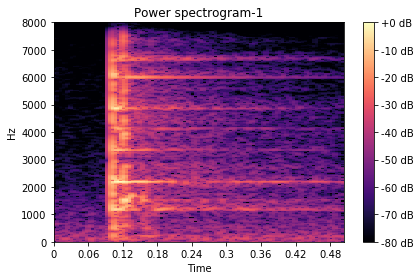

label
successfully loaded all model -  1804052147_epoch49_rnn.model
mean:  0.02632364059641763 ,var: 0.0036740292167854478 ,max: 0.9634490387216497 ,min: 4.81775704164189e-07
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


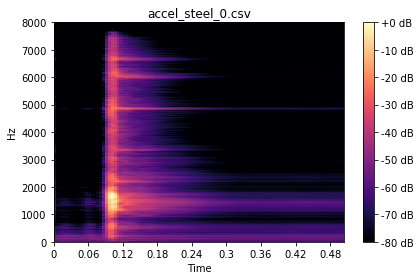

successfully loaded all model -  1804052146_epoch48_rnn.model
mean:  0.025653597010559116 ,var: 0.0037360638300234666 ,max: 0.9648327696886649 ,min: 5.199796012655966e-07
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


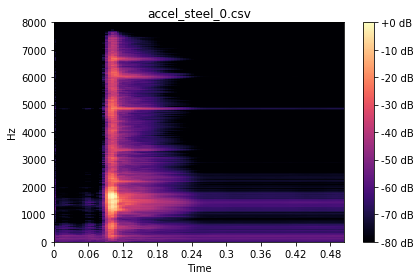

successfully loaded all model -  1804052146_epoch47_rnn.model
mean:  0.02630815805183984 ,var: 0.003700408463627136 ,max: 0.963429665089088 ,min: 5.741034484474383e-07
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


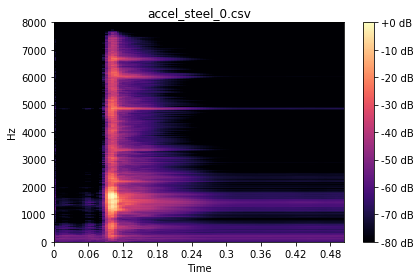

successfully loaded all model -  1804052145_epoch46_rnn.model
mean:  0.025768198291480283 ,var: 0.003731350655638424 ,max: 0.9638969988307424 ,min: 6.2257287025691e-07
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


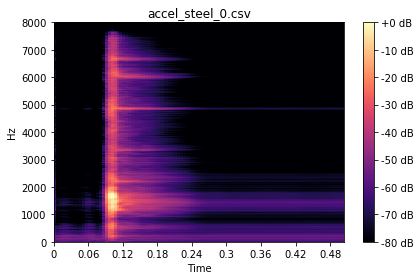

successfully loaded all model -  1804052144_epoch45_rnn.model
mean:  0.026029821292625988 ,var: 0.0037285803609965282 ,max: 0.9629838222164062 ,min: 6.873958688924375e-07
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


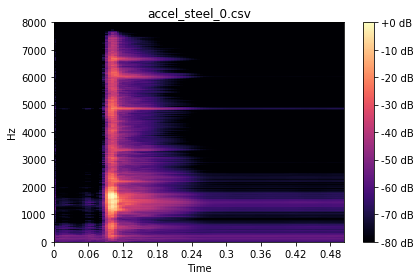

successfully loaded all model -  1804052143_epoch44_rnn.model
mean:  0.025812819938165713 ,var: 0.003752282194291773 ,max: 0.9629414242077623 ,min: 7.479027963608331e-07
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


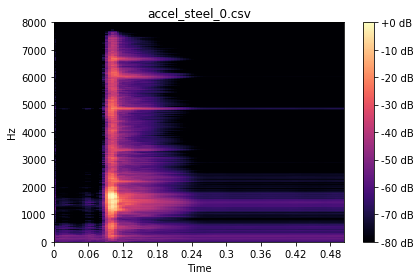

successfully loaded all model -  1804052142_epoch43_rnn.model
mean:  0.026351958950907587 ,var: 0.0037169047522600173 ,max: 0.9614003259744343 ,min: 8.17540261488503e-07
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


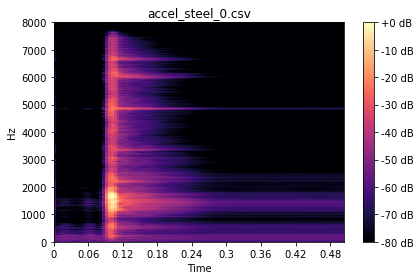

successfully loaded all model -  1804052141_epoch42_rnn.model
mean:  0.026692633469869043 ,var: 0.003688290469446553 ,max: 0.9600298660861513 ,min: 8.985501566138865e-07
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


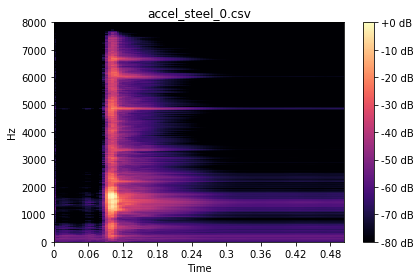

successfully loaded all model -  1804052140_epoch41_rnn.model
mean:  0.025823416266544025 ,var: 0.0037577391837211763 ,max: 0.9613330427657832 ,min: 9.813521383850166e-07
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


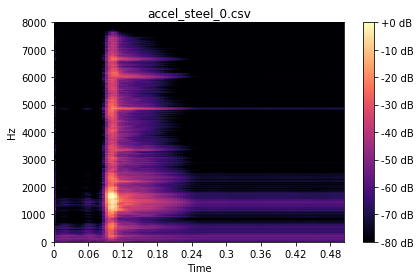

successfully loaded all model -  1804052140_epoch40_rnn.model
mean:  0.026490337599970513 ,var: 0.0037300137629438434 ,max: 0.959855669999701 ,min: 1.073010386654083e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


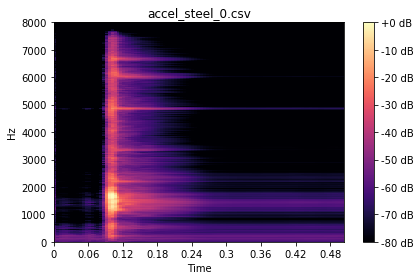

successfully loaded all model -  1804052139_epoch39_rnn.model
mean:  0.025989942734965563 ,var: 0.003772365915348155 ,max: 0.961503335150983 ,min: 1.170618240564636e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


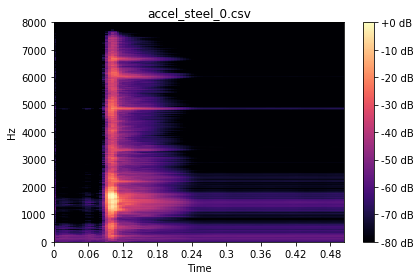

successfully loaded all model -  1804052138_epoch38_rnn.model
mean:  0.02648406804423873 ,var: 0.00376300793429577 ,max: 0.9600835300915859 ,min: 1.2728990380628247e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


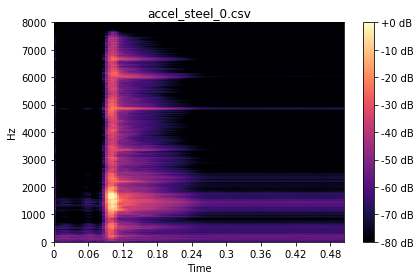

successfully loaded all model -  1804052137_epoch37_rnn.model
mean:  0.026748005450810856 ,var: 0.0037569311372471466 ,max: 0.9596729012310792 ,min: 1.38743349914483e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


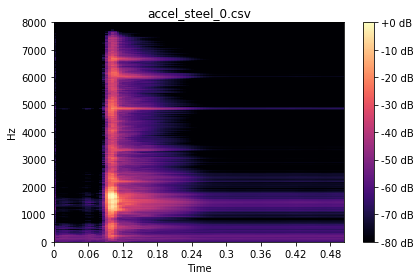

successfully loaded all model -  1804052136_epoch36_rnn.model
mean:  0.027016042948601764 ,var: 0.0037427721129622868 ,max: 0.9590746399511676 ,min: 1.5148488136107474e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


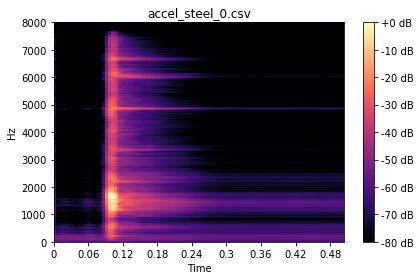

successfully loaded all model -  1804052135_epoch35_rnn.model
mean:  0.027526360485554395 ,var: 0.0037036783096447414 ,max: 0.9580372863731822 ,min: 1.6568214361578626e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


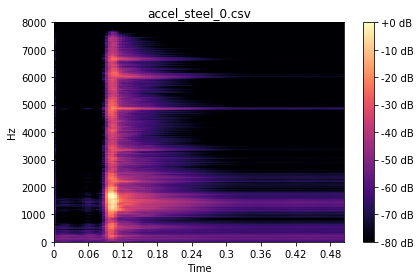

successfully loaded all model -  1804052134_epoch34_rnn.model
mean:  0.027077156699665764 ,var: 0.003687253562435454 ,max: 0.956453274579166 ,min: 1.8150035496766748e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


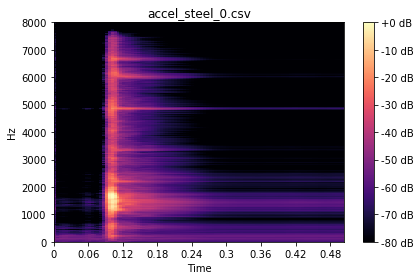

successfully loaded all model -  1804052134_epoch33_rnn.model
mean:  0.028420007036646423 ,var: 0.0035394828477798438 ,max: 0.9514227306960008 ,min: 2.074215527392287e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


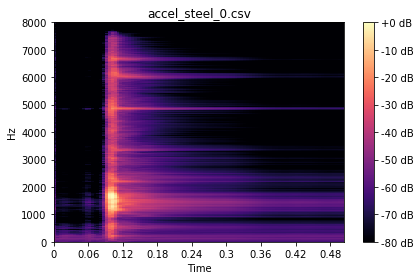

successfully loaded all model -  1804052133_epoch32_rnn.model
mean:  0.02839602699185541 ,var: 0.0036093791404050108 ,max: 0.9524596618367009 ,min: 2.2894012998153634e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


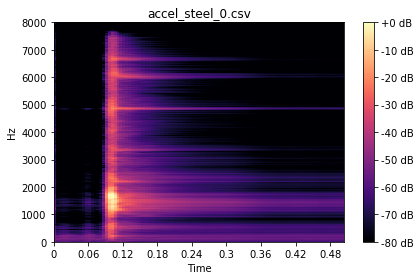

successfully loaded all model -  1804052132_epoch31_rnn.model
mean:  0.028178383850248533 ,var: 0.0036731935418801106 ,max: 0.9555339141913592 ,min: 2.4856576992804413e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


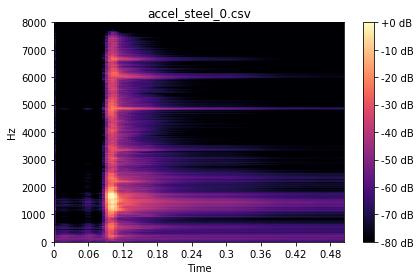

successfully loaded all model -  1804052131_epoch30_rnn.model
mean:  0.028534460781275573 ,var: 0.0036826558258344247 ,max: 0.9566364578391755 ,min: 2.7034735097797302e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


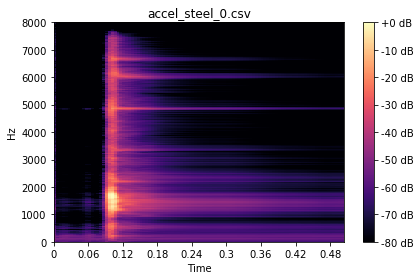

successfully loaded all model -  1804052130_epoch29_rnn.model
mean:  0.028213351196153123 ,var: 0.0034066491196620336 ,max: 0.9467769658605834 ,min: 3.014975299753253e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


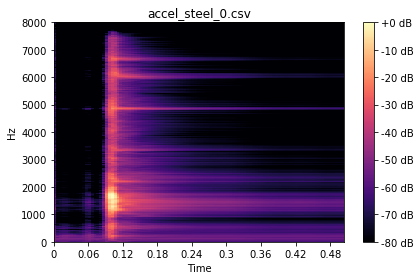

successfully loaded all model -  1804052129_epoch28_rnn.model
mean:  0.029031909318509793 ,var: 0.0036293478998935366 ,max: 0.9522113260977803 ,min: 3.2957208284112305e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


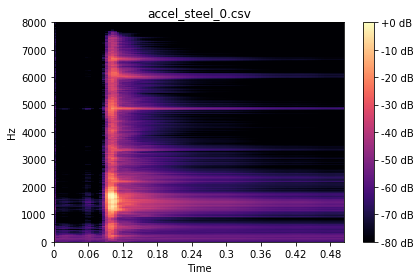

successfully loaded all model -  1804052128_epoch27_rnn.model
mean:  0.0287167000954093 ,var: 0.003536736957124242 ,max: 0.9501999185990008 ,min: 3.654726755841775e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


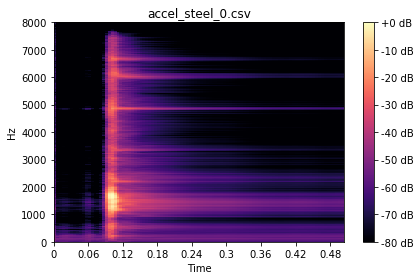

successfully loaded all model -  1804052128_epoch26_rnn.model
mean:  0.028645765637778445 ,var: 0.0035284900944784043 ,max: 0.9497056828050058 ,min: 4.042638736101445e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


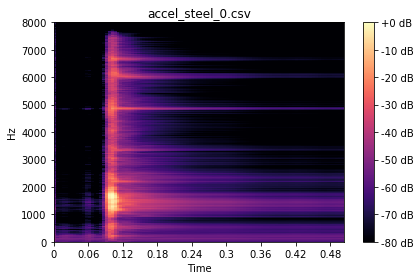

successfully loaded all model -  1804052127_epoch25_rnn.model
mean:  0.028619357211194348 ,var: 0.003515516882198831 ,max: 0.9488206457256265 ,min: 4.456745039960186e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


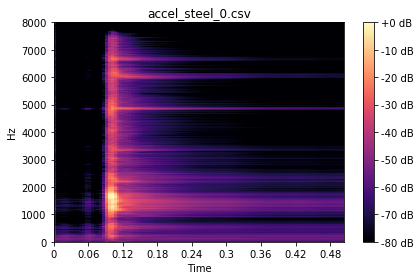

successfully loaded all model -  1804052126_epoch24_rnn.model
mean:  0.028620720995694383 ,var: 0.003497382512733637 ,max: 0.9476849306047441 ,min: 4.9145093072300305e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


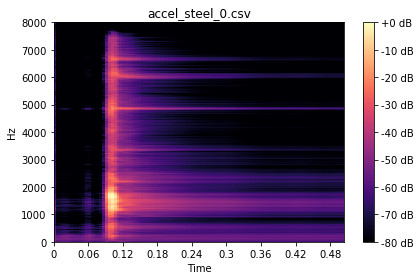

successfully loaded all model -  1804052125_epoch23_rnn.model
mean:  0.02860612361748411 ,var: 0.003479410336718063 ,max: 0.9463964810076559 ,min: 5.419508628479175e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


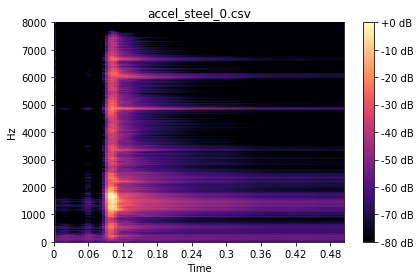

successfully loaded all model -  1804052124_epoch22_rnn.model
mean:  0.02863905774562067 ,var: 0.00346998288196757 ,max: 0.9452171831457741 ,min: 5.963647103424119e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


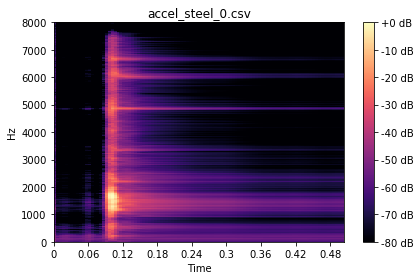

successfully loaded all model -  1804052123_epoch21_rnn.model
mean:  0.02854919427939574 ,var: 0.0034137221259621276 ,max: 0.9422786745644669 ,min: 6.572240656144146e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


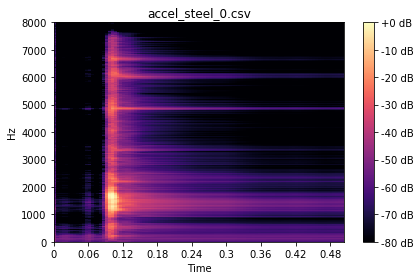

successfully loaded all model -  1804052122_epoch20_rnn.model
mean:  0.028561090438803453 ,var: 0.0034064965415771587 ,max: 0.9409253576536336 ,min: 7.24383330386047e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


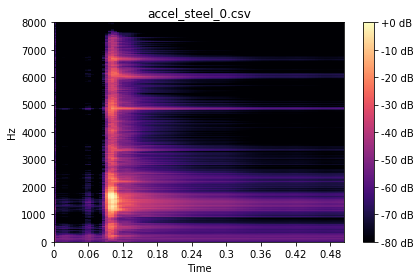

successfully loaded all model -  1804052122_epoch19_rnn.model
mean:  0.02879960724190225 ,var: 0.003335937695502731 ,max: 0.9368159246336806 ,min: 8.019801494063561e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


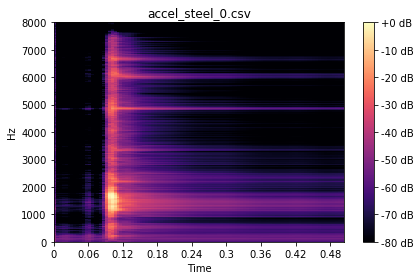

successfully loaded all model -  1804052121_epoch18_rnn.model
mean:  0.02893167948962705 ,var: 0.0033508859796216707 ,max: 0.9357467175734224 ,min: 8.864062760127744e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


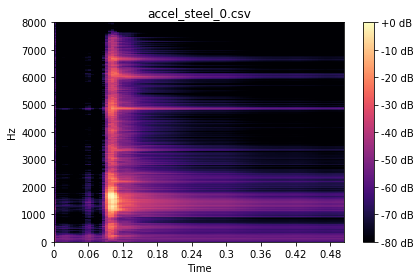

successfully loaded all model -  1804052120_epoch17_rnn.model
mean:  0.02926581304515613 ,var: 0.003363950204627359 ,max: 0.9333900644648051 ,min: 9.815652539324482e-06
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


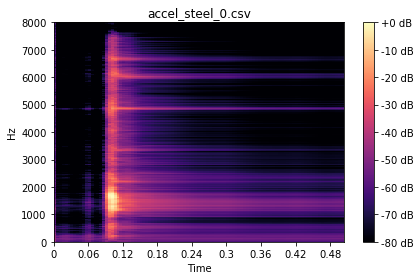

successfully loaded all model -  1804052119_epoch16_rnn.model
mean:  0.02938183980151182 ,var: 0.0033312476823289224 ,max: 0.9295594522633941 ,min: 1.087983733688569e-05
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


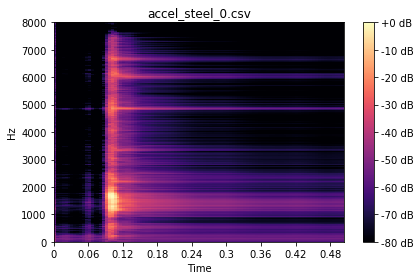

successfully loaded all model -  1804052118_epoch15_rnn.model
mean:  0.029450606728826007 ,var: 0.003301669478713276 ,max: 0.9248681499219916 ,min: 1.2062347604535617e-05
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


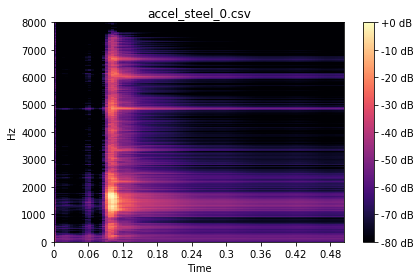

successfully loaded all model -  1804052117_epoch14_rnn.model
mean:  0.028990464123654795 ,var: 0.003262604377182704 ,max: 0.9182203206862101 ,min: 1.3334622372018767e-05
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


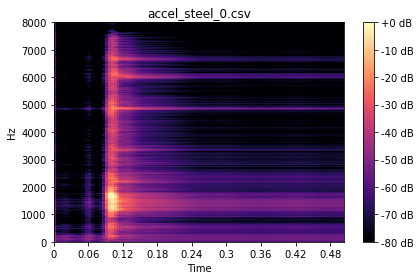

successfully loaded all model -  1804052116_epoch13_rnn.model
mean:  0.0284459034238666 ,var: 0.0032252373917150126 ,max: 0.9123278141791065 ,min: 1.4705600692666021e-05
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


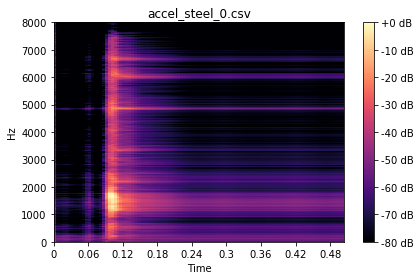

successfully loaded all model -  1804052116_epoch12_rnn.model
mean:  0.029507673273989857 ,var: 0.0033801392816352224 ,max: 0.9044977982349012 ,min: 1.619944653669103e-05
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


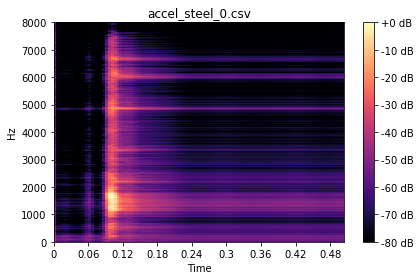

successfully loaded all model -  1804052115_epoch11_rnn.model
mean:  0.027870230048918573 ,var: 0.0032767763978093644 ,max: 0.8955500724710004 ,min: 1.8120421337974868e-05
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


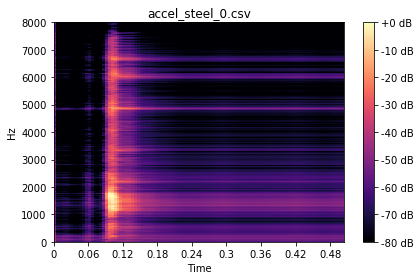

successfully loaded all model -  1804052114_epoch10_rnn.model
mean:  0.02491196635306774 ,var: 0.0028480106699166363 ,max: 0.9058849018887288 ,min: 2.3468963777972807e-05
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


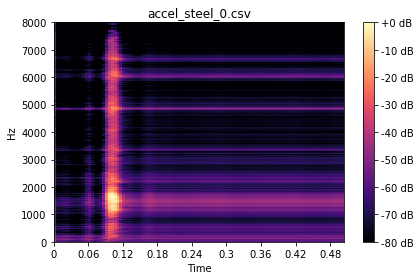

successfully loaded all model -  1804052113_epoch9_rnn.model
mean:  0.02630775999093562 ,var: 0.0027576106576239065 ,max: 0.858878559952198 ,min: 2.6273472428339772e-05
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


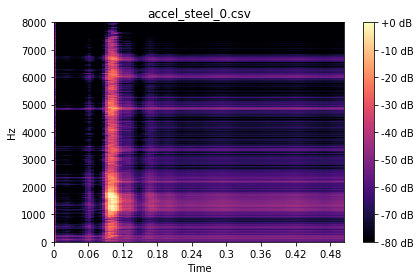

successfully loaded all model -  1804052112_epoch8_rnn.model
mean:  0.019132679839431784 ,var: 0.0006150344861764337 ,max: 0.5802730826023682 ,min: 4.9567312436438193e-05
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


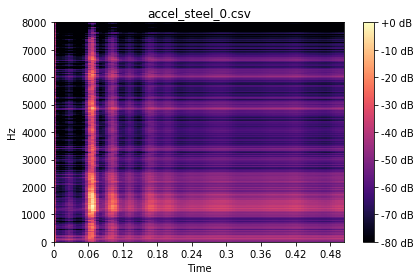

successfully loaded all model -  1804052111_epoch7_rnn.model
mean:  0.03508834218113629 ,var: 0.0011274587718108282 ,max: 0.41118139183955293 ,min: 9.091615612971671e-05
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


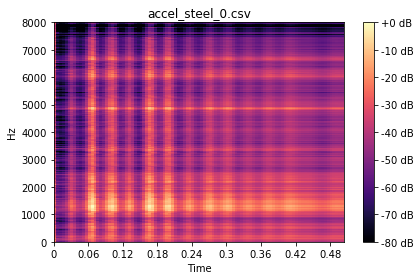

successfully loaded all model -  1804052110_epoch6_rnn.model
mean:  0.03177944892296439 ,var: 0.0006041597412860676 ,max: 0.19323297451902471 ,min: 0.0001307001187970669
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


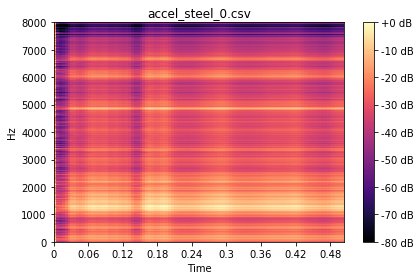

successfully loaded all model -  1804052109_epoch5_rnn.model
mean:  0.034308146902321826 ,var: 0.000702718884411708 ,max: 0.21773027693910885 ,min: 0.00017966648425582488
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


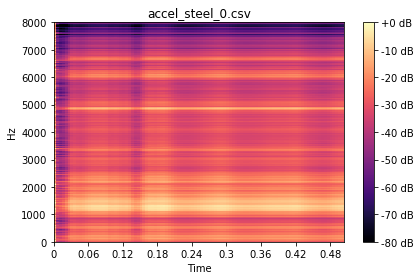

successfully loaded all model -  1804052109_epoch4_rnn.model
mean:  0.03478833450648029 ,var: 0.0007209886129778565 ,max: 0.27288256105503456 ,min: 0.0001987116021829327
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


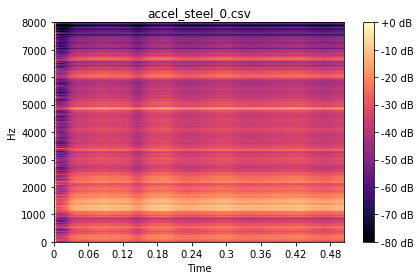

successfully loaded all model -  1804052108_epoch3_rnn.model
mean:  0.03288399287796534 ,var: 0.0007329596340052032 ,max: 0.34942631951261105 ,min: 0.0002919394159730526
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


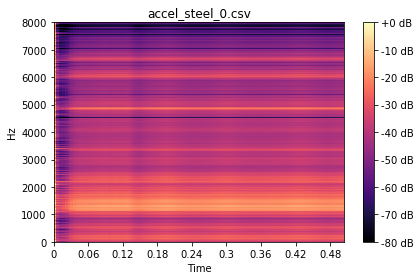

successfully loaded all model -  1804052107_epoch2_rnn.model
mean:  0.03013066382436746 ,var: 0.0008472018507899305 ,max: 0.42170644170720123 ,min: 0.000673730511948134
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


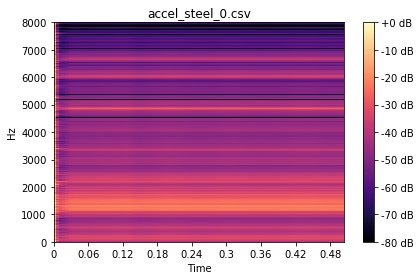

successfully loaded all model -  1804052106_epoch1_rnn.model
mean:  0.02951564762629124 ,var: 0.001267145606414002 ,max: 0.4639646161250485 ,min: 0.0008309300676181963
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


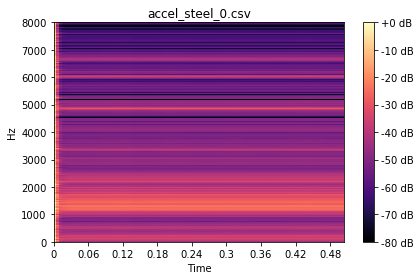

successfully loaded all model -  1804052105_epoch0_rnn.model
mean:  0.03306029988520975 ,var: 0.0020714561548783126 ,max: 0.5220760654311497 ,min: 0.0014527283283687353
mean:  0.03504149489420455 ,var: 0.007152733498182582 ,max: 1.1197950839996338 ,min: 1.2023056115140207e-06


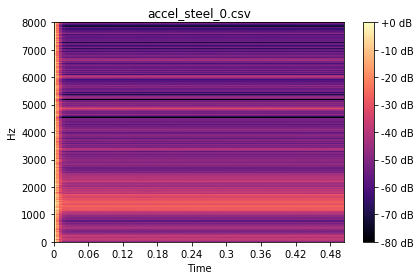

In [71]:


print ('Test Strat...')
inPath = "./dataset/input_accel"
outPath = "./output_model"

y,sr = librosa.load("./dataset/audio/audio_steel_0.wav",sr= 16000)
stft_y = librosa.stft(y,n_fft= 512, hop_length = 80, win_length=400)
D = librosa.amplitude_to_db(stft_y,ref=np.max)
CQT = librosa.amplitude_to_db(librosa.cqt(y, sr=sr), ref=np.max)
librosa.display.specshow(D,y_axis='linear', x_axis='time',sr=16000,hop_length=80)
plt.title('Power spectrogram-1')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()
print("label")

timeText = util.getTime()
num = 50
for epoch in range(1,+num+1,1):
    load(outPath, num = epoch)
    for path, dirs, files in os.walk(inPath):

        for f in files:

            if os.path.splitext(f)[-1] == '.csv':

                with open(os.path.join(path,f), 'r') as csvfile:

                    rdr = csv.reader(csvfile)
                    data_accel = [line for line in rdr]

                    for idx2,each_line in enumerate(data_accel) :

                        each_line = [float(i) for i in each_line]

                        #x,y,z 3 axis -> sum(x,y,z) 1 axis and material property
                        sum_3axis = np.sum(each_line[0:2])
                        sum_3axis = (sum_3axis - 9) / 4.
                        each_line = sum_3axis#[sum_3axis, each_line[-1]]

                        data_accel[idx2] = each_line

                    output_data = list()
                    result = list()

                    pointer = 0
                    pointer_bool = True
                    for i in range(0,sequence_len):

                        if pointer < 9:#input_size-1
                            output_data = data_accel[:pointer+1]
                            output_data = np.pad(output_data, (input_size-pointer-1,0),'constant',constant_values=(0))
                        else:
                            output_data = data_accel[pointer-9:pointer+1]

                        if pointer_bool :
                            pointer += 2
                        else:
                            pointer +=3

                        pointer_bool =  not pointer_bool

                        if i == sequence_len-1:
                            result.append(result[-1])
                        else:
                            result.append(output_data)

                    result = np.array(result)
                    result = torch.from_numpy(result)
                    result = Variable(result)
                    
                    hidden = model.init_hidden()
                    hidden, outputs = model.forward(result,hidden)
                    
                    outputs = denorm(outputs)
                    util.printInfo(outputs)
                    
                    stft_var = Variable(torch.from_numpy(np.log1p(np.abs(stft_y.T))).type(torch.FloatTensor))
                    stft_var /= 2.2
                    util.printInfo(stft_var)
                    
                    
                    
                    outputs = outputs * 2.2
                    outputs = outputs.data.numpy()
                    outputs = np.expm1(outputs)
                    outputs = outputs.T
                    
 #                   outputs = np.array(outputs)
                    
                    plt.title(f)
                    outputs = np.power (outputs,1.5)
                    librosa.display.specshow( librosa.amplitude_to_db(outputs,ref=np.max),y_axis='linear', x_axis='time',sr=16000,hop_length=80)
   #                 librosa.display.specshow(outputs,y_axis='linear', x_axis='time',sr=16000,hop_length=80)
                    
                    plt.colorbar(format='%+2.0f dB')
                    plt.tight_layout()
                    plt.show()

                   # print(np.mean((stft_y -  outputs)**2))
                    
                    #util.printInfo(outputs)
#                    if i == 1:
#                        librosa.output.write_wav("./output_test/"+timeText+str(i)+"_"+os.path.splitext(f)[0]+".wav", outputs, sr = 16000)
#                    sf.write(self.inPath2+"/"+timeText+str(i)+"_"+os.path.splitext(f)[0]+".wav", outputs, 16000)
                    #power for noise
                    #outputs = np.power(outputs,1.5)
                    audio = griffinLim(outputs,1.3)
                    filename='converted_'+os.path.basename(path)+os.path.splitext(f)[0]+'.wav'
                    librosa.output.write_wav("./output_test/"+timeText+str(epoch)+"_"+os.path.splitext(f)[0]+".wav", audio, sr = 16000)


#print(np.mean(np.abs(stft_y) - outputs)**2)

